# Ditributed Lag Plots

Overall not too much usefull -> mainly showing that autoregressive models would not be good in our case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_df = pd.read_csv("../dataset/team_A_dataset.csv", index_col=["month", "year", "kraj"])
orig_df.sample(n=10)

general_thefts  break_in_thefts  avg_monthly_salary  celkem  \
month year kraj                                                                
7     2014 ULK            281.0            125.0             22828.0     NaN   
2     2018 JHM            399.0            154.0             29279.0     NaN   
4     2010 VYS            232.0            176.0             20931.0     NaN   
2     2021 JHM            138.0            165.0             34989.0     NaN   
7     2023 ZLK             95.0             48.0             38596.0   314.0   
12    2015 ULK            142.0             76.0             25611.0     NaN   
2     2016 OLK            261.0            123.0             23436.0     NaN   
12    2021 PLK            129.0            144.0             39421.0     NaN   
7     2022 PAK             72.0             35.0             35722.0   813.0   
6     2010 HKK           1423.0            625.0             21552.0     NaN   

                 m_do_65  z_do_65  celkem_w2  celkem_w3  celkem_w4  celkem_w5  \
month year kraj                                                                 
7     2014 ULK       NaN      NaN        NaN        NaN        NaN        NaN   
2     2018 JHM       NaN      NaN        NaN        NaN        NaN        NaN   
4     2010 VYS       NaN      NaN        NaN        NaN        NaN        NaN   
2     2021 JHM       NaN      NaN        NaN        NaN        NaN        NaN   
7     2023 ZLK     100.0    156.0      581.0      726.0    -2409.0    -2180.0   
12    2015 ULK       NaN      NaN        NaN        NaN        NaN        NaN   
2     2016 OLK       NaN      NaN        NaN        NaN        NaN        NaN   
12    2021 PLK       NaN      NaN        NaN        NaN        NaN        NaN   
7     2022 PAK     256.0    364.0     1889.0     3952.0     7272.0    17516.0   
6     2010 HKK       NaN      NaN        NaN        NaN        NaN        NaN   

                 ...  avg_natural_gas_price  uchazeciOZamestnaniUoZ  \
month year kraj  ...                                                  
7     2014 ULK   ...                 4.0408                   61681   
2     2018 JHM   ...                 2.6640                   37744   
4     2010 VYS   ...                 4.0907                   27030   
2     2021 JHM   ...                 2.9100                   38530   
7     2023 ZLK   ...                 2.6531                   10545   
12    2015 ULK   ...                 2.0481                   50778   
2     2016 OLK   ...                 1.9314                   31860   
12    2021 PLK   ...                 3.8459                   11558   
7     2022 PAK   ...                 7.0963                    8233   
6     2010 HKK   ...                 4.7808                   20937   

                 uchazeciOZamestnaniUoZZeny  uchazeciOZamestnaniUoZMuzi  \
month year kraj                                                           
7     2014 ULK                        31571                       30110   
2     2018 JHM                        18351                       19393   
4     2010 VYS                        12845                       14185   
2     2021 JHM                        18929                       19601   
7     2023 ZLK                         5765                        4780   
12    2015 ULK                        25854                       24924   
2     2016 OLK                        14920                       16940   
12    2021 PLK                         6104                        5454   
7     2022 PAK                         4708                        3525   
6     2010 HKK                        10667                       10270   

                 noveHlaseniUchazeci  noveHlasenaAUvolnenaVPM  \
month year kraj                                                 
7     2014 ULK                  5103                     1281   
2     2018 JHM                  3825                     4704   
4     2010 VYS                  2324                      509   
2   

In [3]:
avg_cols =  ['avg_monthly_salary', 'monthly_min_wage', 'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance', 'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price']

avg_df = orig_df.groupby(['month', 'year'])[avg_cols].mean()

#sum_cols = ['general_thefts', 'break_in_thefts', 'uchazeciOZamestnaniUoZ', 'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM', 'absolventiSkolAMladistvi', 'z_do_65_w19', 'm_do_65_w19', 'celkem_w19']
sum_cols = list(set(orig_df.columns) - set(avg_cols))
sum_df = orig_df.groupby(['month', 'year'])[sum_cols].sum()

df = pd.concat([avg_df, sum_df], axis=1)

df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
df.set_index(keys=["date"], inplace=True)

df = df.sort_index()

#df = df.drop(columns=['month', 'year'])

display(df)

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2009-01-01      1  2009        20517.428571            8000.0   
2009-02-01      2  2009        20517.428571            8000.0   
2009-03-01      3  2009        20517.428571            8000.0   
2009-04-01      4  2009        21267.000000            8000.0   
2009-05-01      5  2009        21267.000000            8000.0   
...           ...   ...                 ...               ...   
2023-05-01      5  2023        40930.142857           17300.0   
2023-06-01      6  2023        40930.142857           17300.0   
2023-07-01      7  2023        40473.285714           17300.0   
2023-08-01      8  2023        40473.285714           17300.0   
2023-09-01      9  2023        40473.285714           17300.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2009-01-01                                   2.2   89.45   -2.730   
2009-02-01                                   2.0   89.45  -74.000   
2009-03-01                                   2.3   89.45    9.819   
2009-04-01                                   1.8   91.81    2.739   
2009-05-01                                   1.3   91.81    2.499   
...                                          ...     ...      ...   
2023-05-01                                  11.1  117.36    9.370   
2023-06-01                                   9.7  117.36   19.236   
2023-07-01                                   8.8  115.41   -6.421   
2023-08-01                                   8.5  115.41   -5.628   
2023-09-01                                   6.9  115.41   11.874   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2009-01-01            70.209              1.1317                 5.0707  ...   
2009-02-01            58.751              1.1088                 4.3675  ...   
2009-03-01            59.799              1.2130                 4.0125  ...   
2009-04-01            66.909              1.2754                 3.5603  ...   
2009-05-01            71.239              1.3651                 3.9148  ...   
...                      ...                 ...                    ...  ...   
2023-05-01           150.590              1.6911                 2.3395  ...   
2023-06-01           150.190              1.6982                 2.4959  ...   
2023-07-01           156.260              1.7325                 2.6531  ...   
2023-08-01           152.260              1.7791                 2.6613  ...   
2023-09-01           138.980              1.7623                 2.7372  ...   

            celkem_w5  celkem_w19  celkem_w6  celkem_w16  z_do_65_ratio  \
date                                                                      
2009-01-01        0.0         0.0        0.0         0.0       0.000000   
2009-02-01        0.0         0.0        0.0         0.0       0.000000   
2009-03-01        0.0         0.0        0.0         0.0       0.000000   
2009-04-01        0.0         0.0        0.0         0.0       0.000000   
2009-05-01        0.0         0.0        0.0         0.0       0.000000   
...               ...         ...        ...         ...            ...   
2023-05-01   -90871.0    338797.0   -86188.0    338797.0       6.486388   
2023-06-01   -73079.0    347221.0   -82447.0    347221.0       6.864381   
2023-07-01   -88178.0    357205.0   -63095.0    115100.0       6.216720   
2023-08-01   -87288.0    363900.0   -81483.0     54116.0       6.057406   
2023-09-01    39380.0    371024.0   -80164.0     22153.0       6.773811   

            m_do_65_w10_ratio  celkem_w17  z_do_65_w17_ratio  \
date                                                           
2009-01-01           0.000000         0.0           0.000000   
2009-02-01           0.000000         0.0           0.00000

## Refugees Data

drop rows before refugees

In [4]:
df_refugees = df.iloc[-19:, :]
df_refugees

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   
2022-08-01      8  2022        37790.571429           16200.0   
2022-09-01      9  2022        37790.571429           16200.0   
2022-10-01     10  2022        41179.142857           16200.0   
2022-11-01     11  2022        41179.142857           16200.0   
2022-12-01     12  2022        41179.142857           16200.0   
2023-01-01      1  2023        38696.928571           17300.0   
2023-02-01      2  2023        38696.928571           17300.0   
2023-03-01      3  2023        38696.928571           17300.0   
2023-04-01      4  2023        40930.142857           17300.0   
2023-05-01      5  2023        40930.142857           17300.0   
2023-06-01      6  2023        40930.142857           17300.0   
2023-07-01      7  2023        40473.285714           17300.0   
2023-08-01      8  2023        40473.285714           17300.0   
2023-09-01      9  2023        40473.285714           17300.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   
2022-08-01                                  17.2  110.11  -29.259   
2022-09-01                                  18.0  110.11  -12.571   
2022-10-01                                  15.1  112.41  -25.785   
2022-11-01                                  16.2  112.41  -26.426   
2022-12-01                                  15.8  112.41   -2.428   
2023-01-01                                  17.5  116.30    7.888   
2023-02-01                                  16.7  116.30   14.275   
2023-03-01                                  15.0  116.30   16.831   
2023-04-01                                  12.7  117.36    8.744   
2023-05-01                                  11.1  117.36    9.370   
2023-06-01                                   9.7  117.36   19.236   
2023-07-01                                   8.8  115.41   -6.421   
2023-08-01                                   8.5  115.41   -5.628   
2023-09-01                                   6.9  115.41   11.874   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   
2022-08-01            541.39              1.7149                 8.7705  ...   
2022-09-01            487.53              1.5767                 7.8527  ...   
2022-10-01            392.53              1.6652                 6.1939  ...   
2022-11-01            346.67              1.7302                 6.5922  ...   
2022-12-01            331.30              1.6169                 5.7334  ...   
2023-01-01            197.35              1.6441                 3.4429  ...   
2023-02-01            175.35              1.7003                 2.4691  ...   
2023-03-01            149.29              1.6786                 2.4463  ...

### Plots of lags of celkem

In [5]:
display(df_refugees.celkem)
display(df_refugees.celkem_w19)

date
2022-03-01    242105.0
2022-04-01     67679.0
2022-05-01     39087.0
2022-06-01     21517.0
2022-07-01     15435.0
2022-08-01     10766.0
2022-09-01     10594.0
2022-10-01     11204.0
2022-11-01      6598.0
2022-12-01      4683.0
2023-01-01     -9368.0
2023-02-01     25083.0
2023-03-01      5805.0
2023-04-01   -119544.0
2023-05-01      7153.0
2023-06-01      8424.0
2023-07-01      9984.0
2023-08-01      6695.0
2023-09-01      7124.0
Name: celkem, dtype: float64

date
2022-03-01    242105.0
2022-04-01    309784.0
2022-05-01    348871.0
2022-06-01    370388.0
2022-07-01    385823.0
2022-08-01    396589.0
2022-09-01    407183.0
2022-10-01    418387.0
2022-11-01    424985.0
2022-12-01    429668.0
2023-01-01    420300.0
2023-02-01    445383.0
2023-03-01    451188.0
2023-04-01    331644.0
2023-05-01    338797.0
2023-06-01    347221.0
2023-07-01    357205.0
2023-08-01    363900.0
2023-09-01    371024.0
Name: celkem_w19, dtype: float64

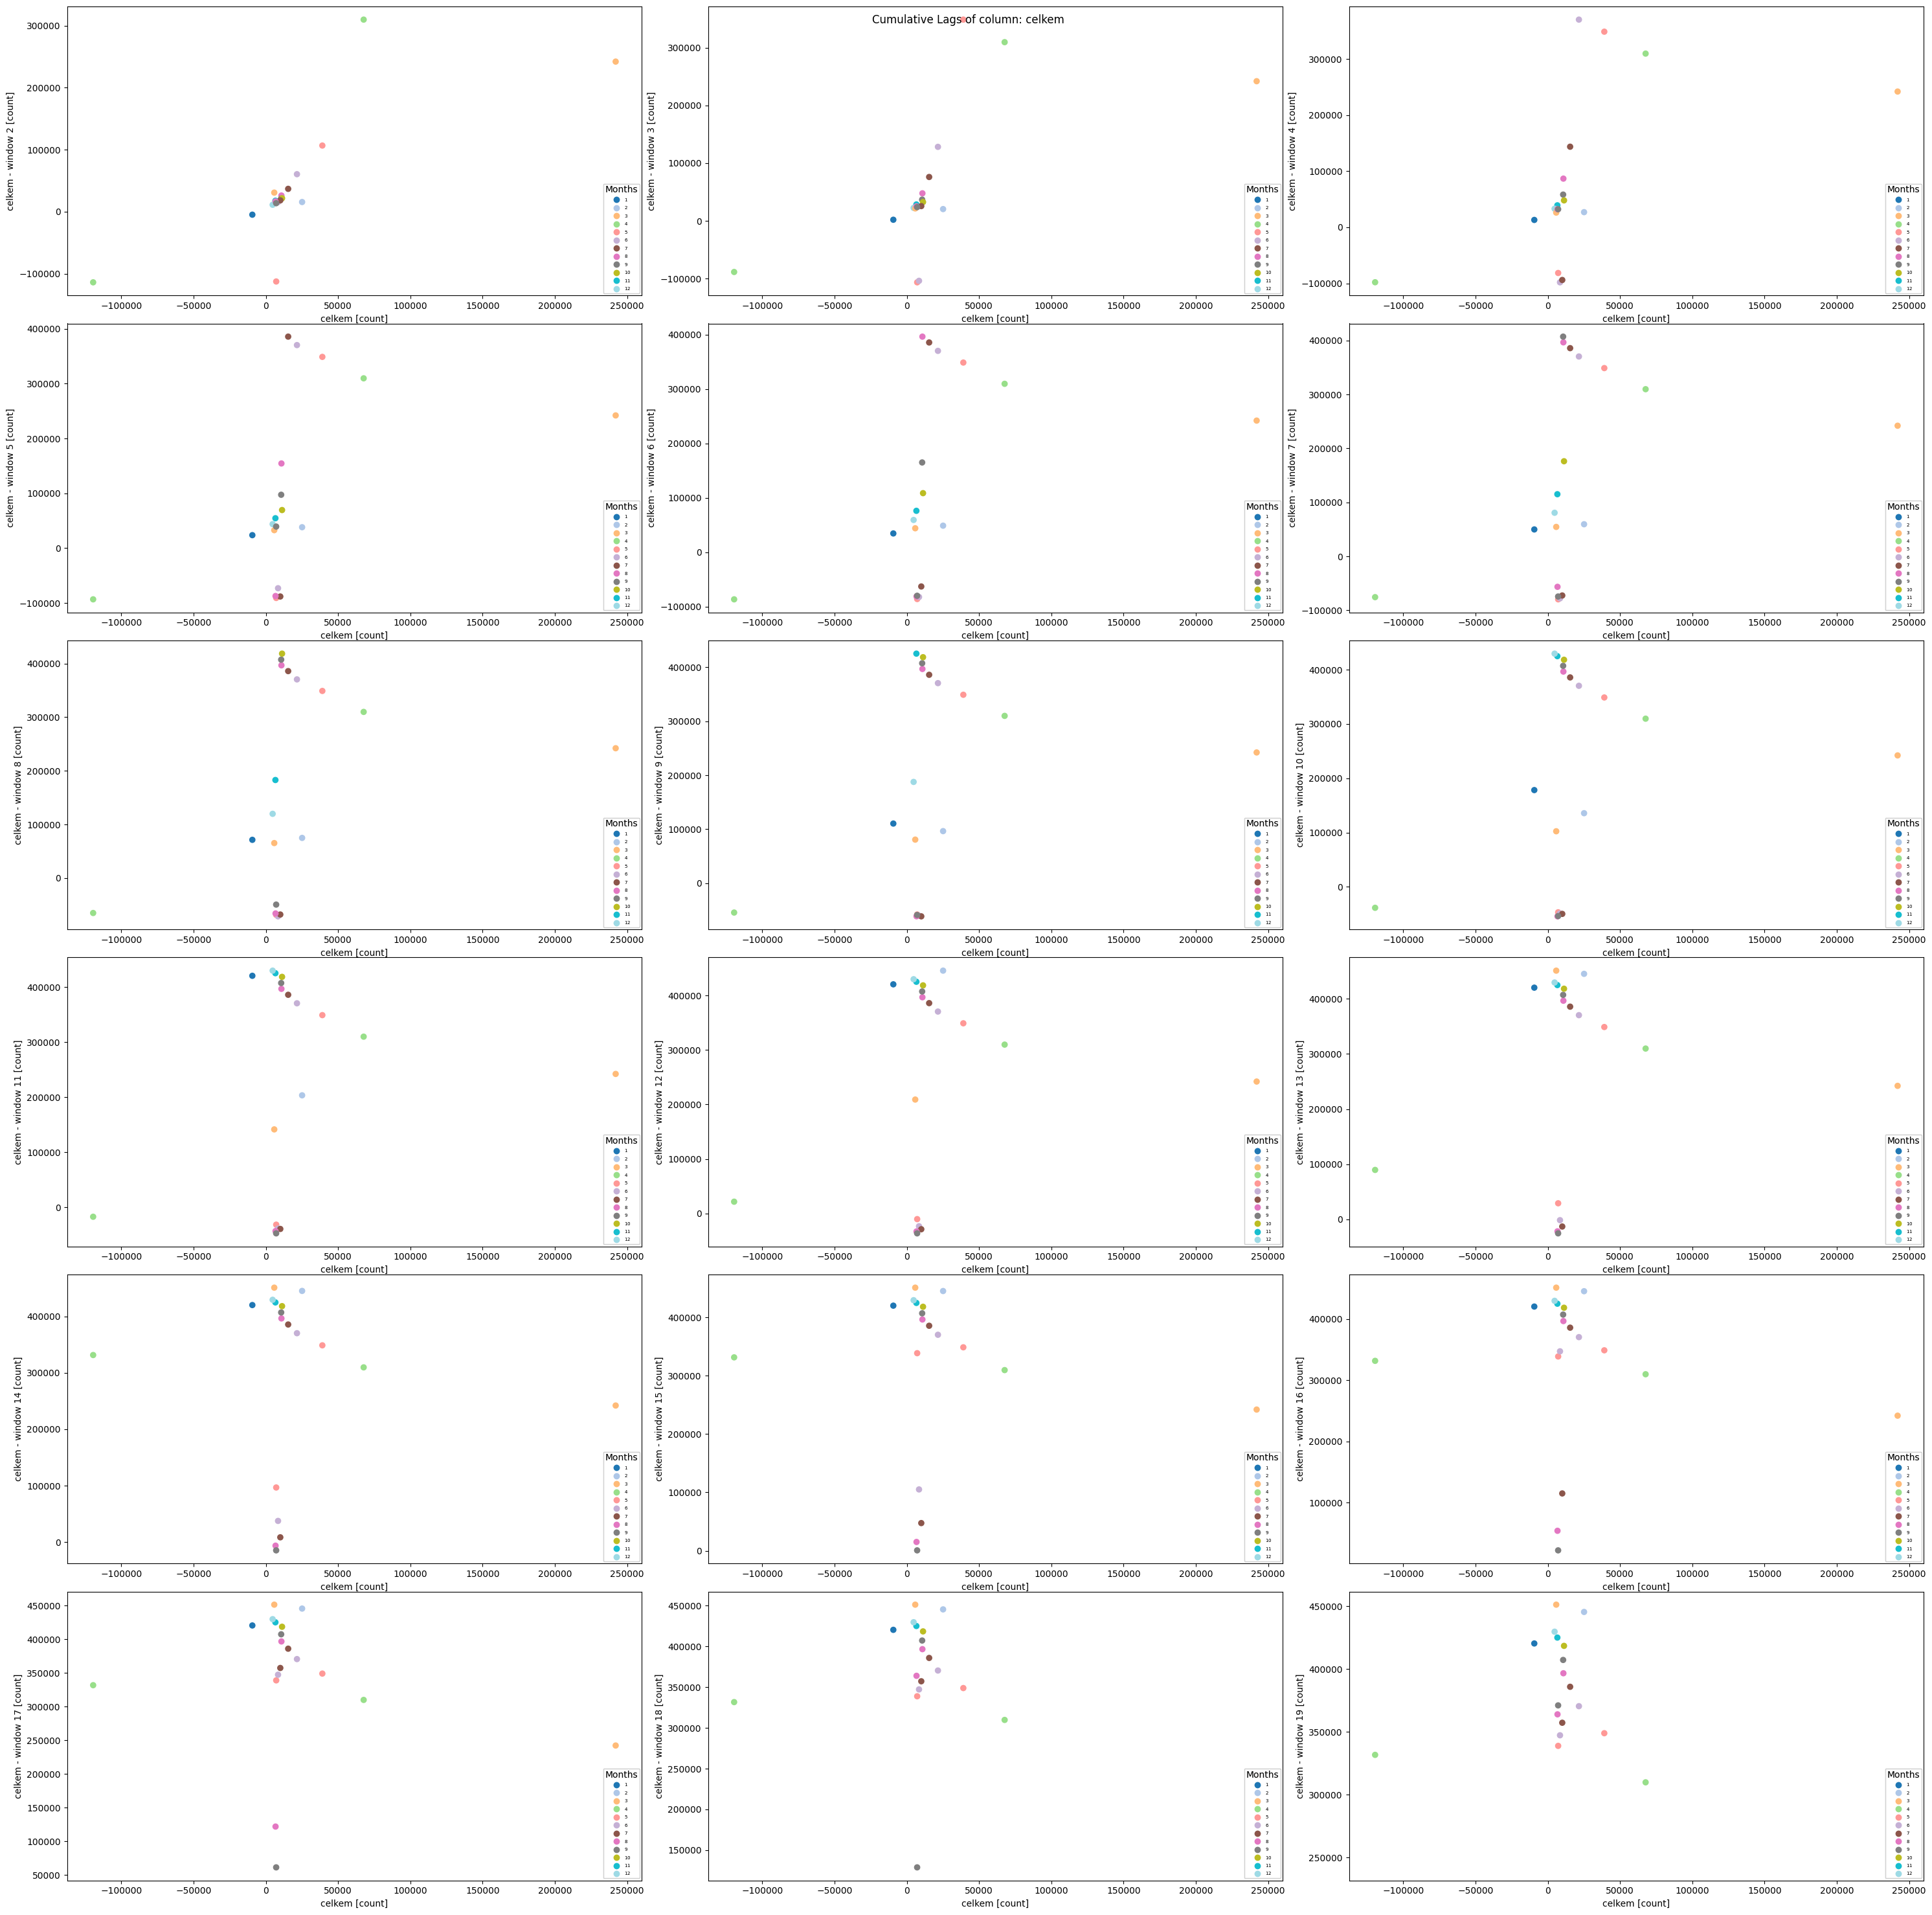

In [6]:
def plot_cumulative_lags(column: str, df: pd.DataFrame, unit: str, n_cols: int = 3, cmap="tab20", color_col: str = "month"):
    fig, axs = plt.subplots(6, n_cols, figsize=(30, 30))

    for window in range(2, 20, 1):
        xpos = (window-2)//n_cols
        ypos = (window-2) % n_cols
        scatter = axs[xpos, ypos].scatter(df[column],
                                          df[f"{column}_w{window}"], c=df[color_col], cmap=cmap)
        legend1 = axs[xpos, ypos].legend(*scatter.legend_elements(),
                                         loc="lower right", title="Months", fontsize="5")
        axs[xpos, ypos].add_artist(legend1)
        axs[xpos, ypos].set_xlabel(f"{column} [{unit}]")
        axs[xpos, ypos].set_ylabel(f"{column} - window {window} [{unit}]")
        #axs[xpos, ypos].axis("equal")

    fig.suptitle(f"Cumulative Lags of column: {column}")
    fig.tight_layout(w_pad=0, h_pad=0)

    return fig



fig = plot_cumulative_lags("celkem", df_refugees, unit="count")

- positive correlation - with window 2, 3 and lowering
- weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

<Figure size 2000x2000 with 0 Axes>

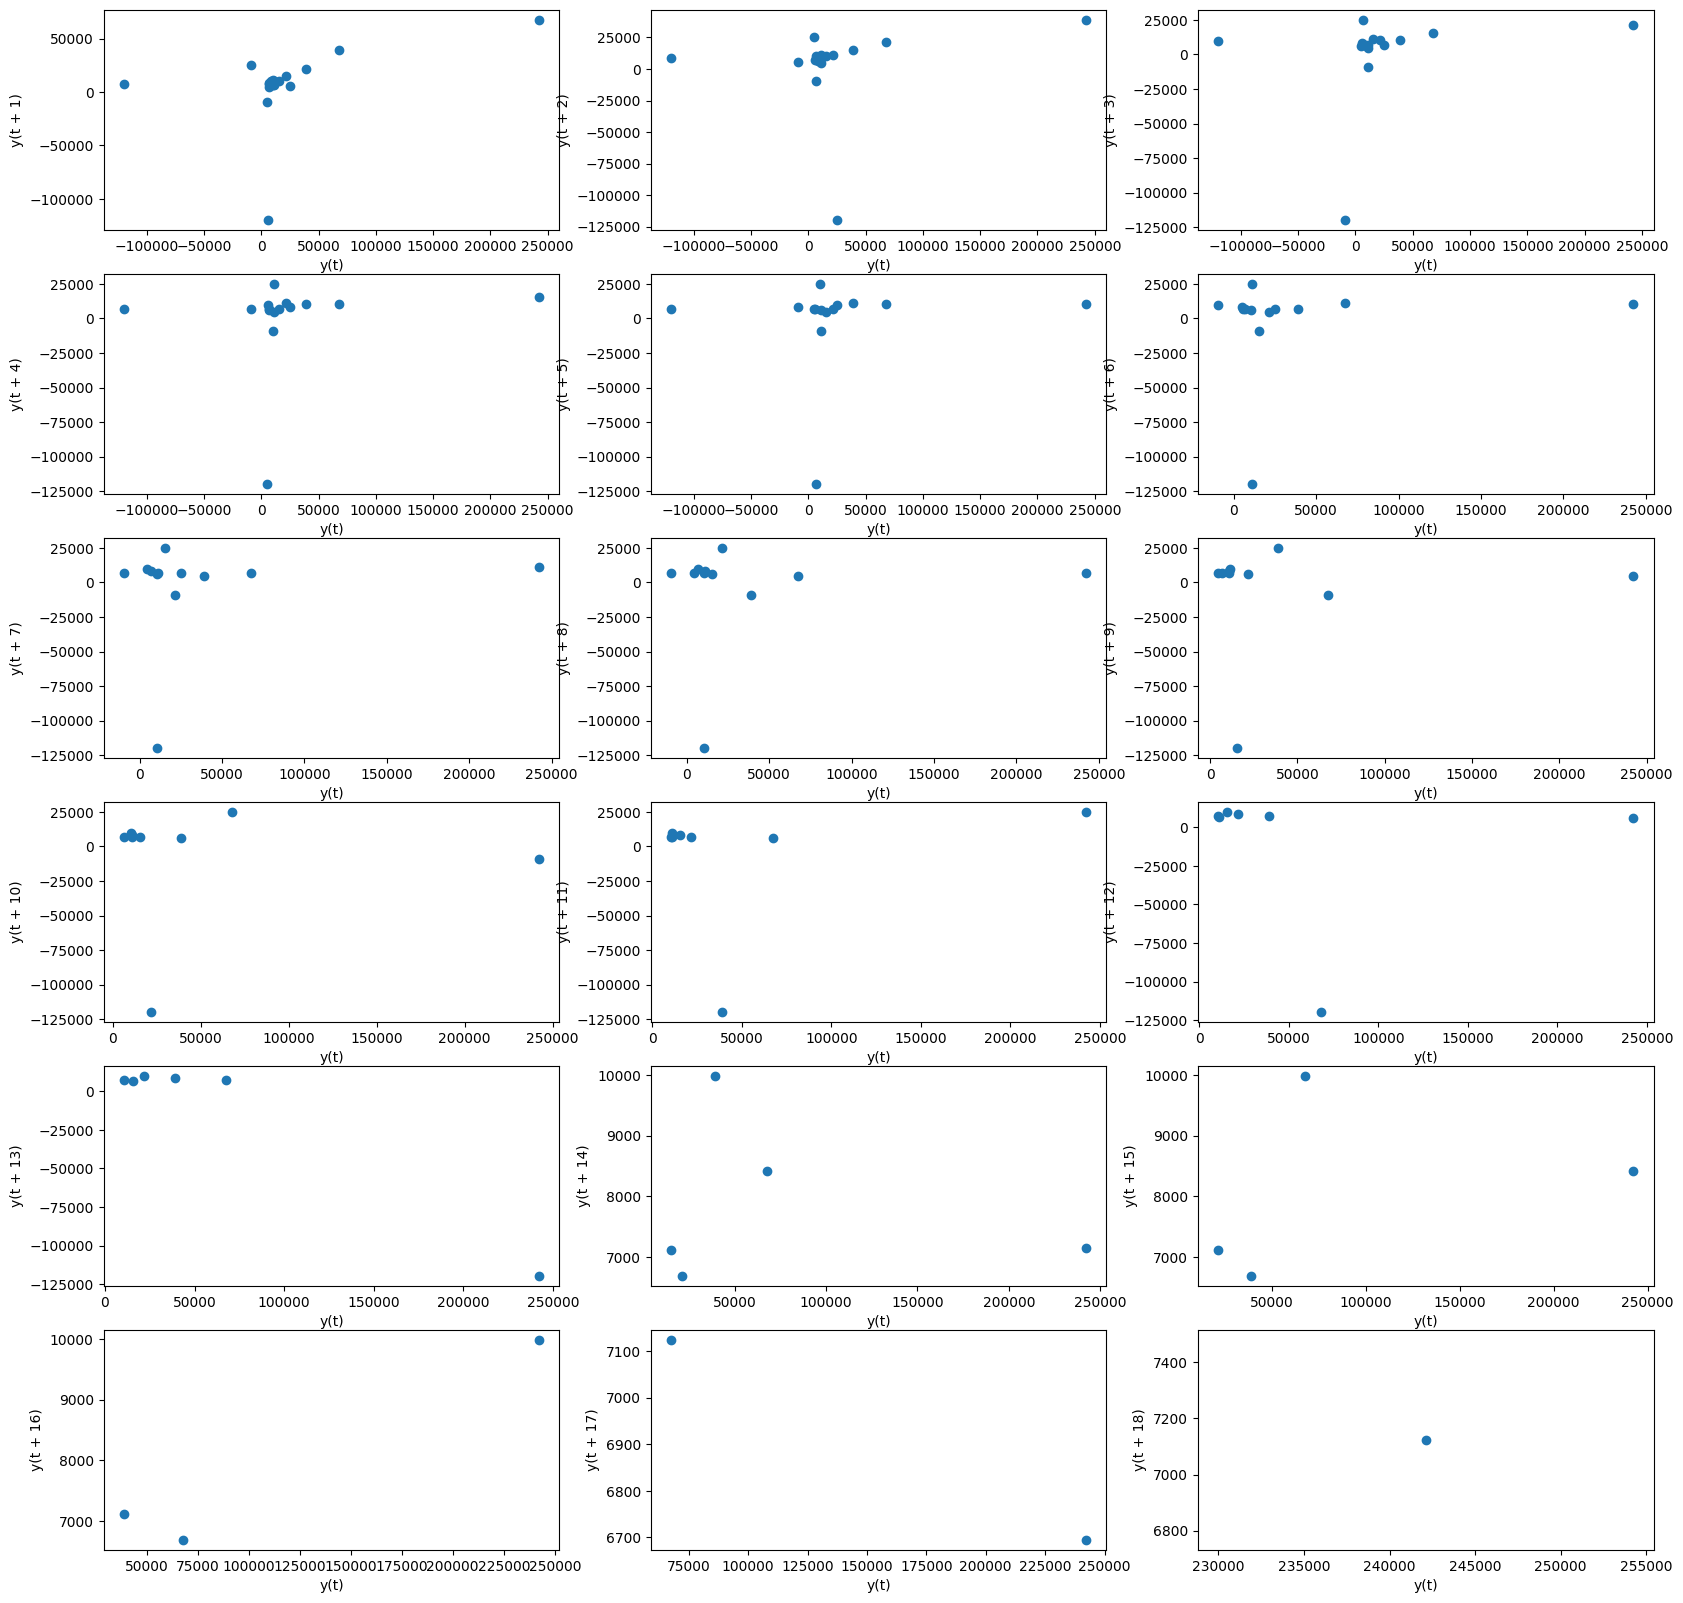

In [25]:
def plot_pd_lag_plots(df, column, max_lag:int = 19, n_cols:int = 3, lag_step:int = 1):
    plt.figure(figsize=(20,20), layout="tight")
    fig, axs = plt.subplots(int((max_lag/lag_step)/n_cols),n_cols, figsize=(20,20))

    idx_col = 0
    idx_row = -1
    for lag in range(1, max_lag, lag_step):
        if(idx_col % n_cols == 0):
            idx_col = 0
            idx_row += 1

        pd.plotting.lag_plot(df[column], lag=lag, ax=axs[idx_row,idx_col])
        #axs[idx_row,idx_col].axis("equal")
        idx_col += 1
        

        

    plt.show()

plot_pd_lag_plots(df_refugees, "celkem")

- another kind of plot (not cumulative) - better for seasonality, however, no strong seasonality is present(as expected)

## Plots of lags of m_do_65

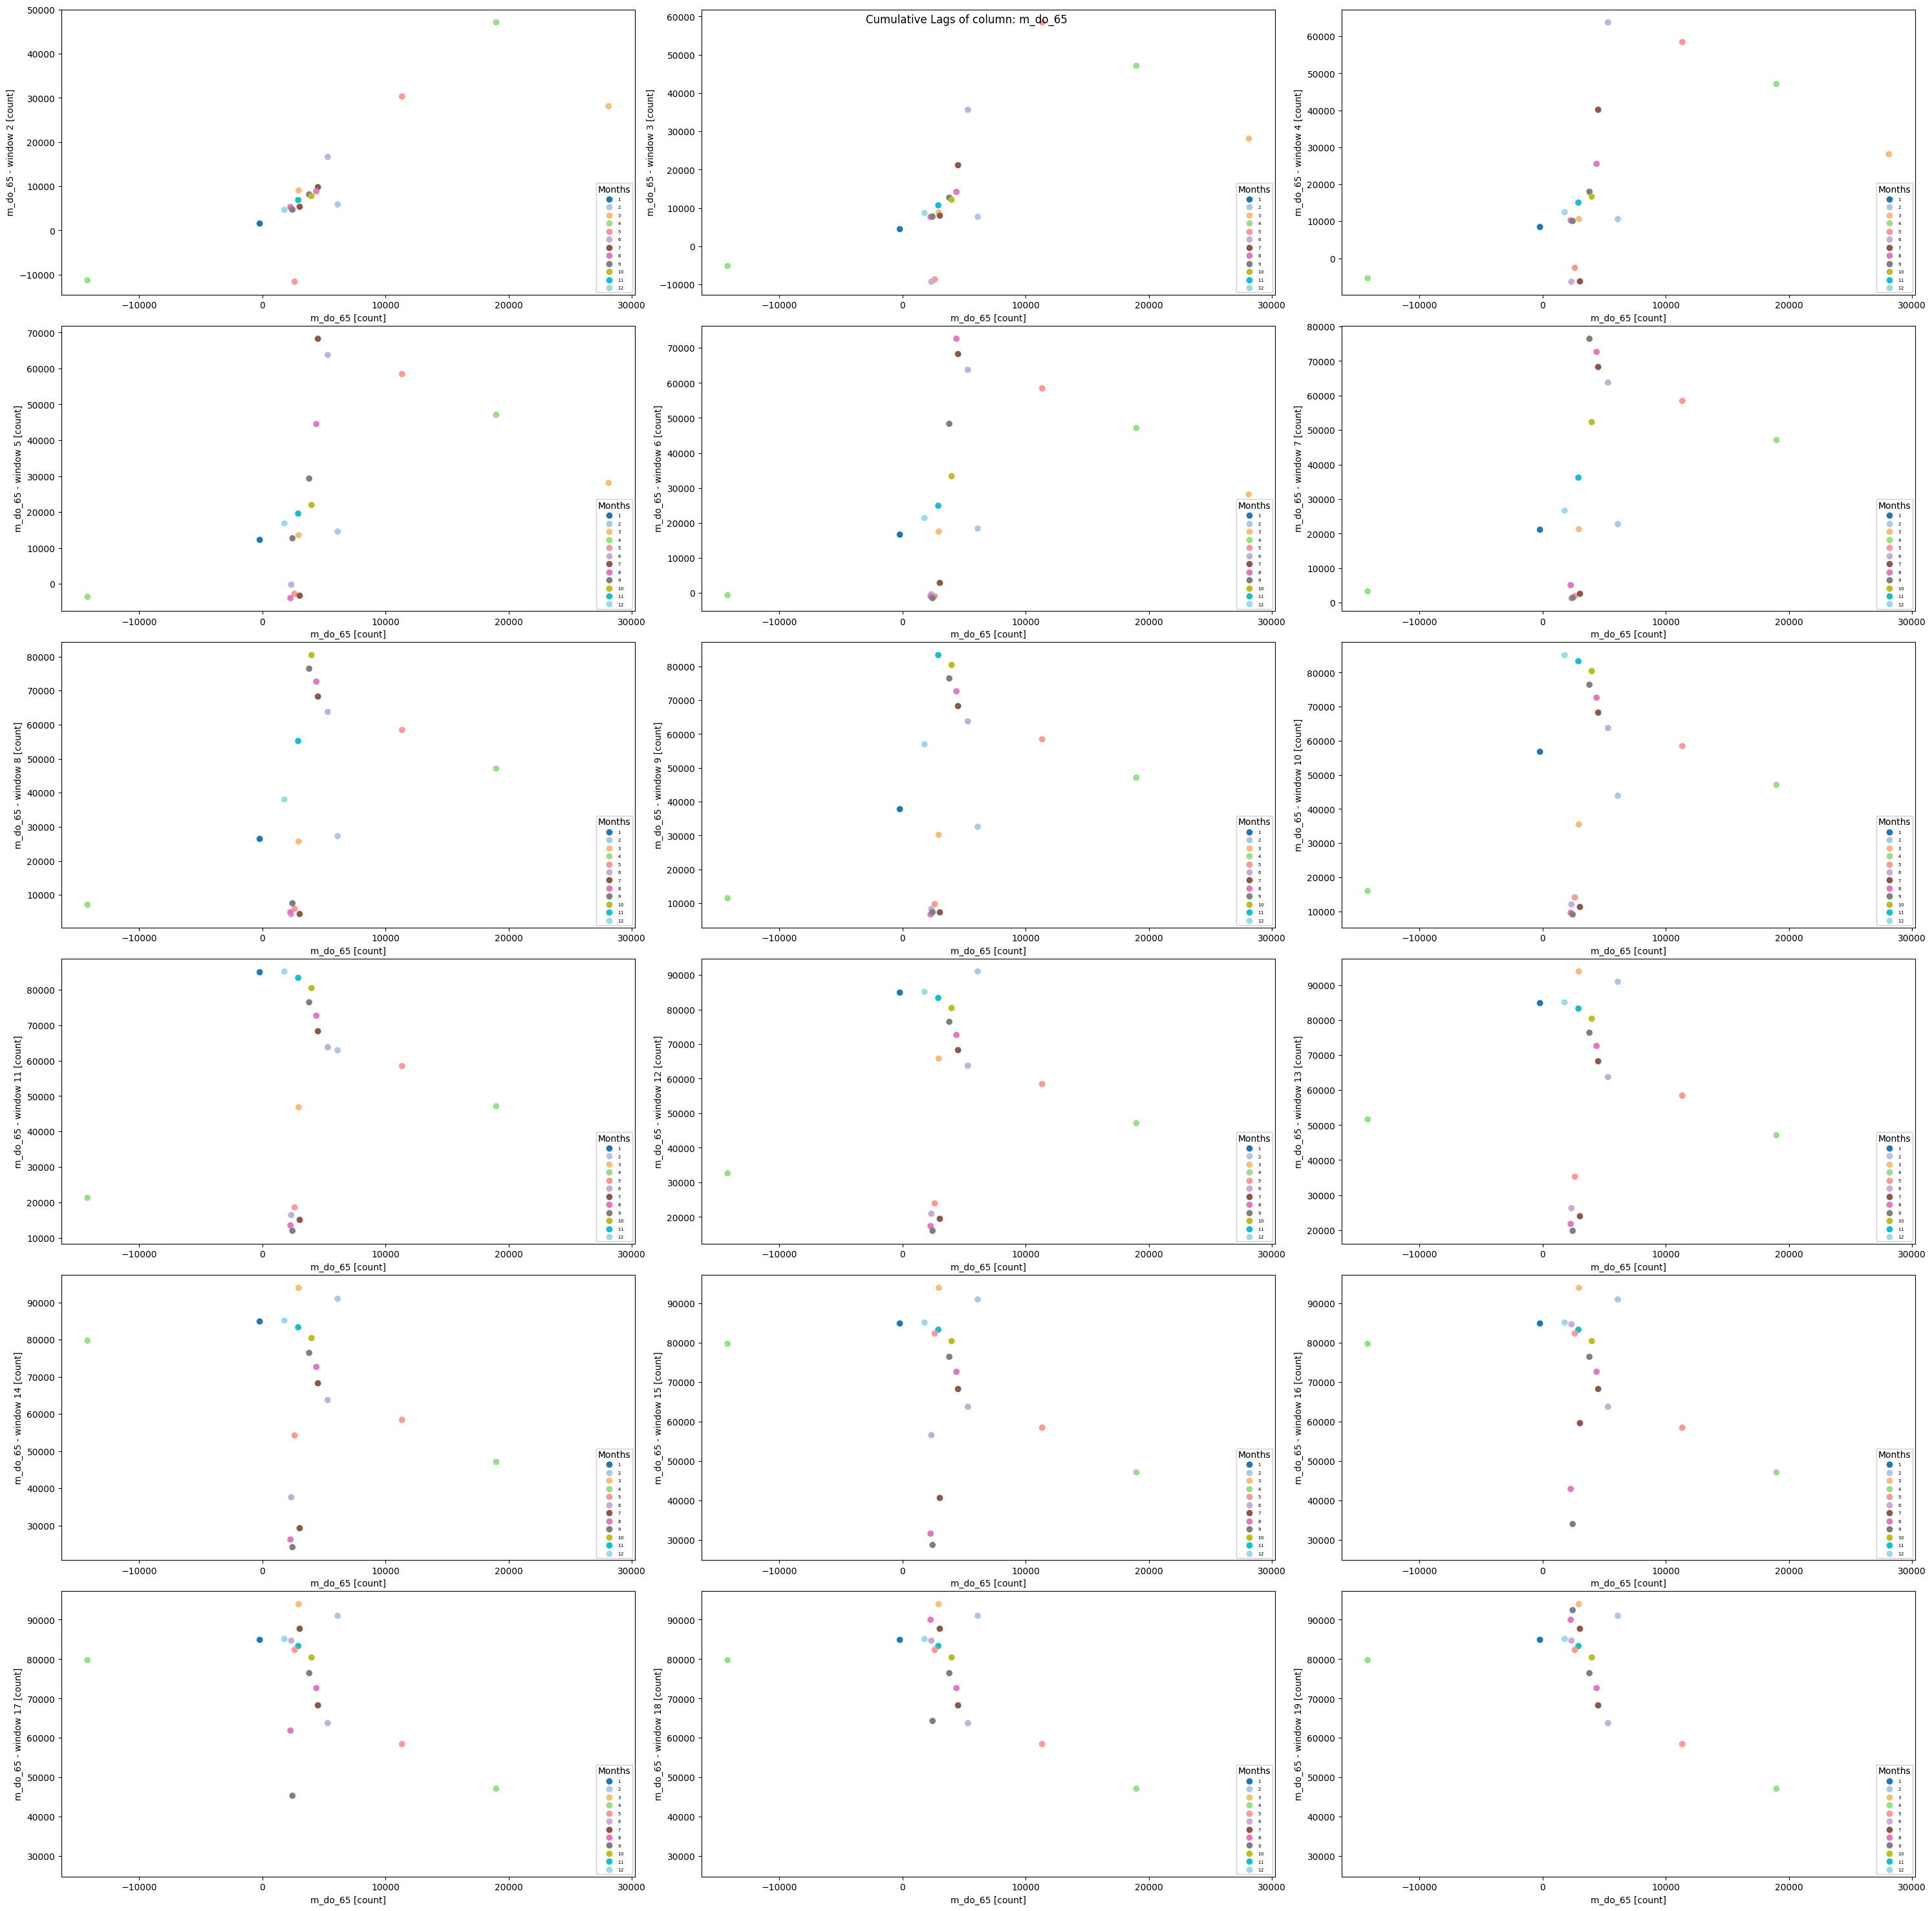

In [11]:
fig = plot_cumulative_lags("m_do_65", df_refugees, unit="count")

- stronger positive correlation (than in celkem) - with window 2, 3 and lowering
- strong weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

In [13]:
def plot_cumulative_lags_report(column: str, df: pd.DataFrame, unit: str, n_cols: int = 3, cmap="tab20", color_col: str = "month"):
    fig, axs = plt.subplots(2,2, figsize=(30, 20))

    for i, window in enumerate([2,6,12,19]):
        xpos = i % 2
        ypos = int(i / 2)
        scatter = axs[xpos, ypos].scatter(df[column],
                                          df[f"{column}_w{window}"], c=df[color_col], cmap=cmap, s=200)
        legend1 = axs[xpos, ypos].legend(*scatter.legend_elements(),
                                         loc="lower right", title="Months", fontsize="10")
        axs[xpos, ypos].add_artist(legend1)
        axs[xpos, ypos].set_xlabel(f"{column} [{unit}]")
        axs[xpos, ypos].set_ylabel(f"{column} - window {window} [{unit}]")
        #axs[xpos, ypos].axis("equal")

    #fig.suptitle(f"Cumulative Lags of column: {column}", y=1)
    fig.tight_layout(w_pad=0, h_pad=0)

    return fig

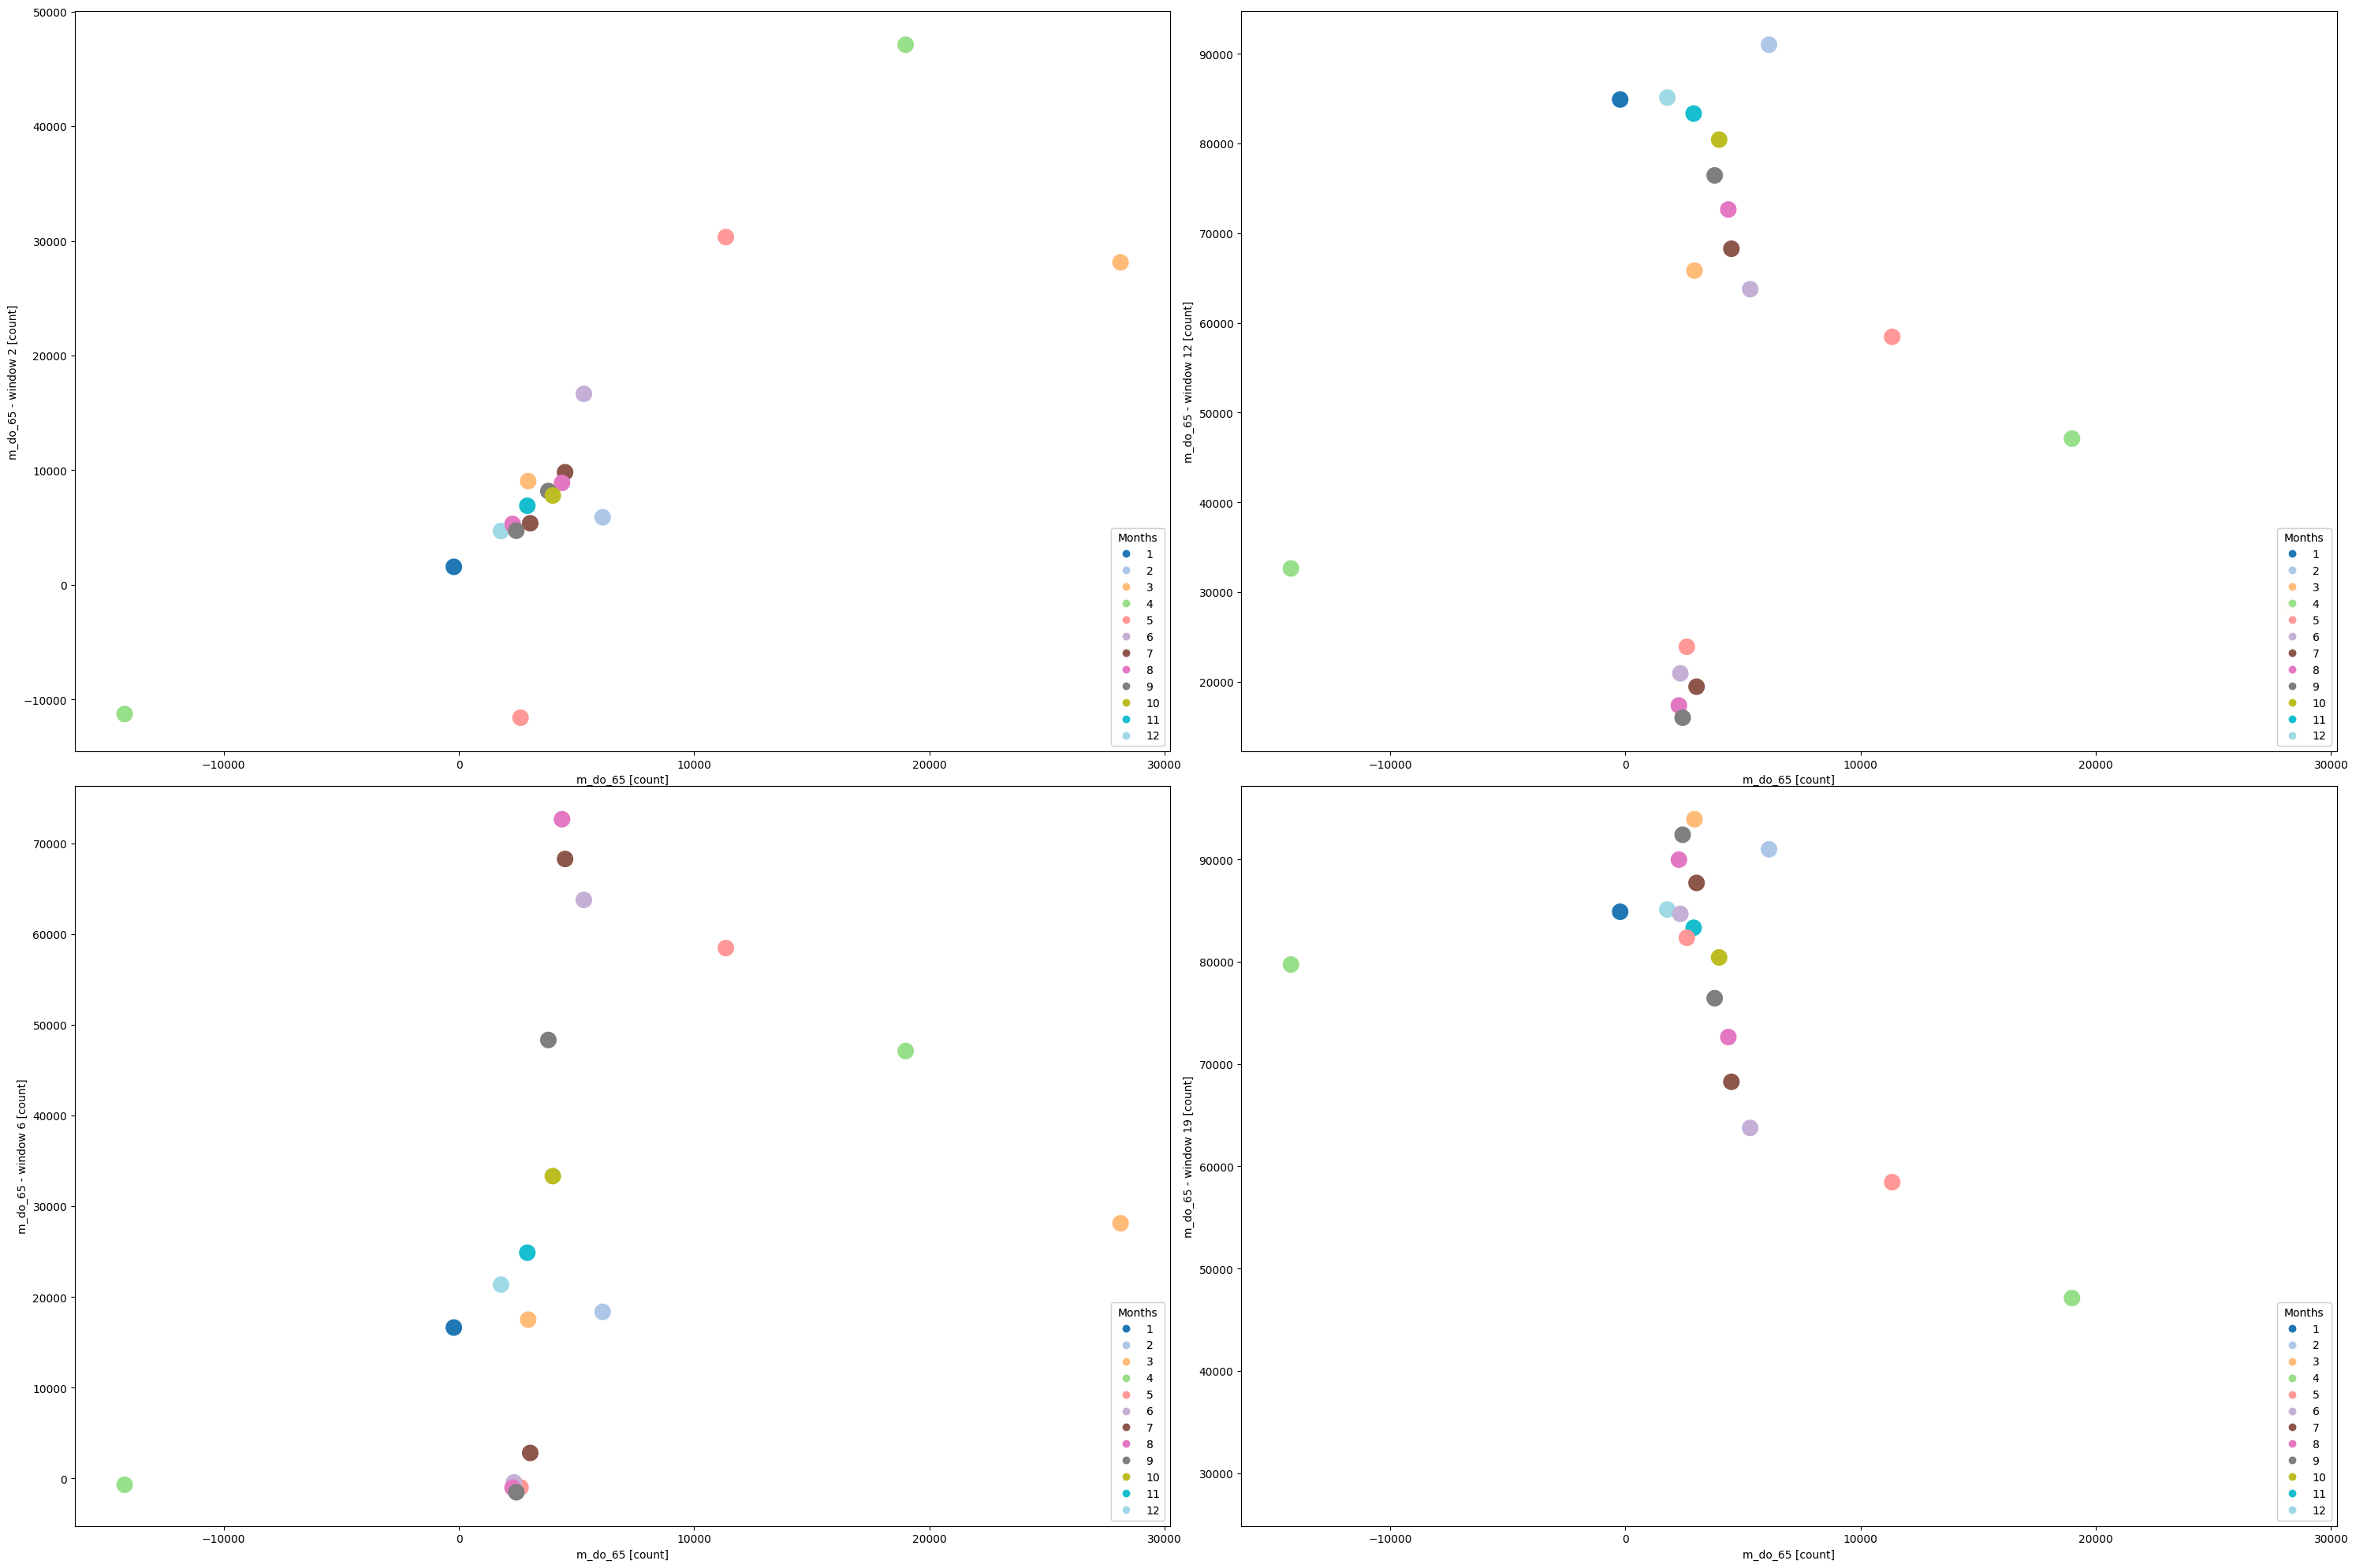

In [15]:
fig = plot_cumulative_lags_report("m_do_65", df_refugees, unit="count")

<Figure size 2000x2000 with 0 Axes>

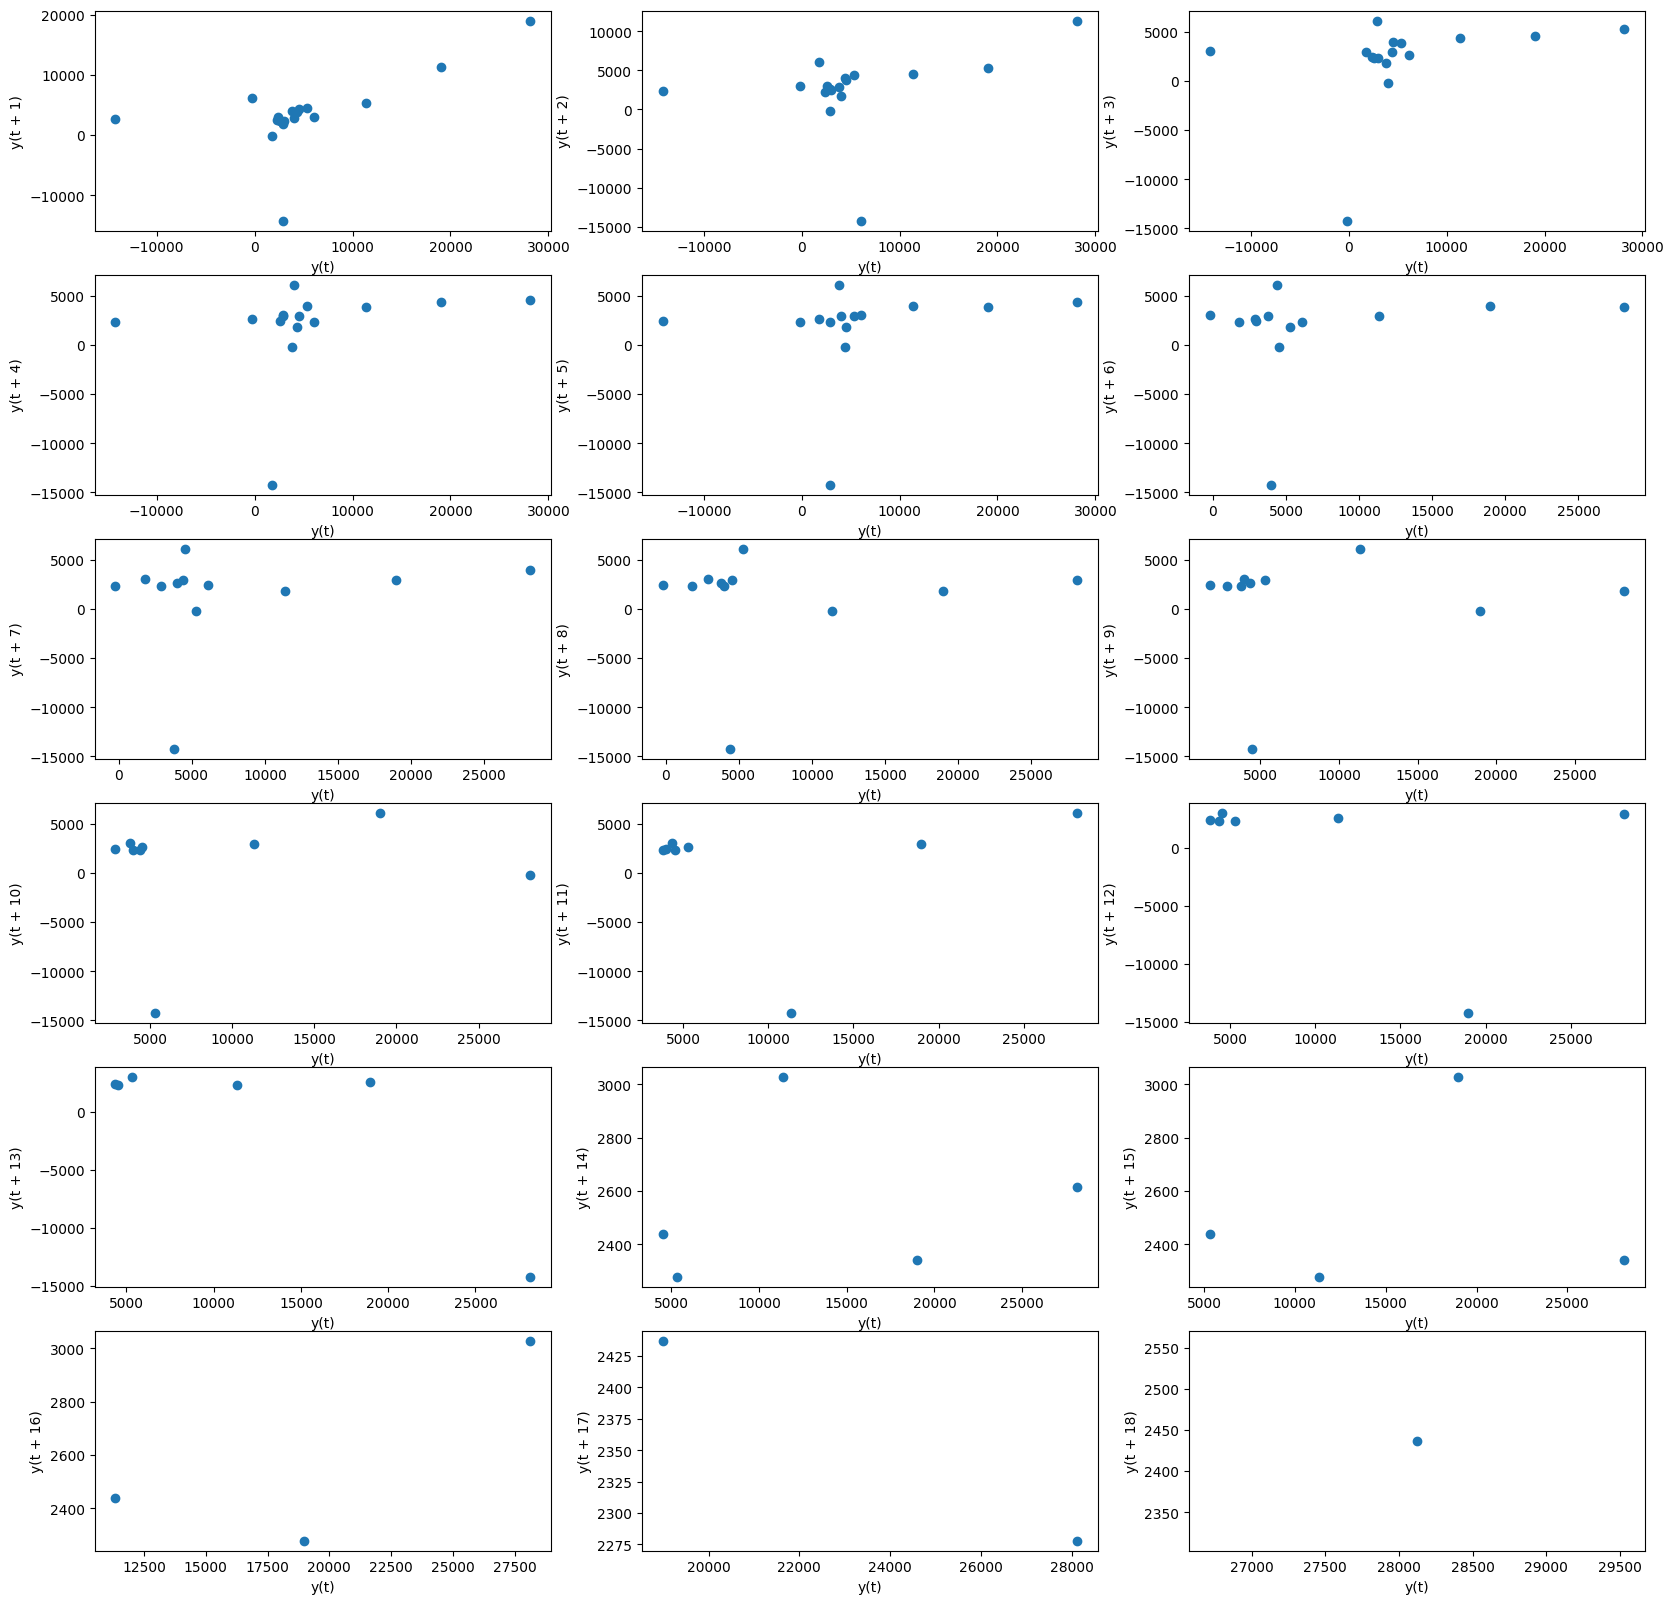

In [12]:
plot_pd_lag_plots(df_refugees, "m_do_65")

- no strong seasonality

### Plots of lags of z_do_65

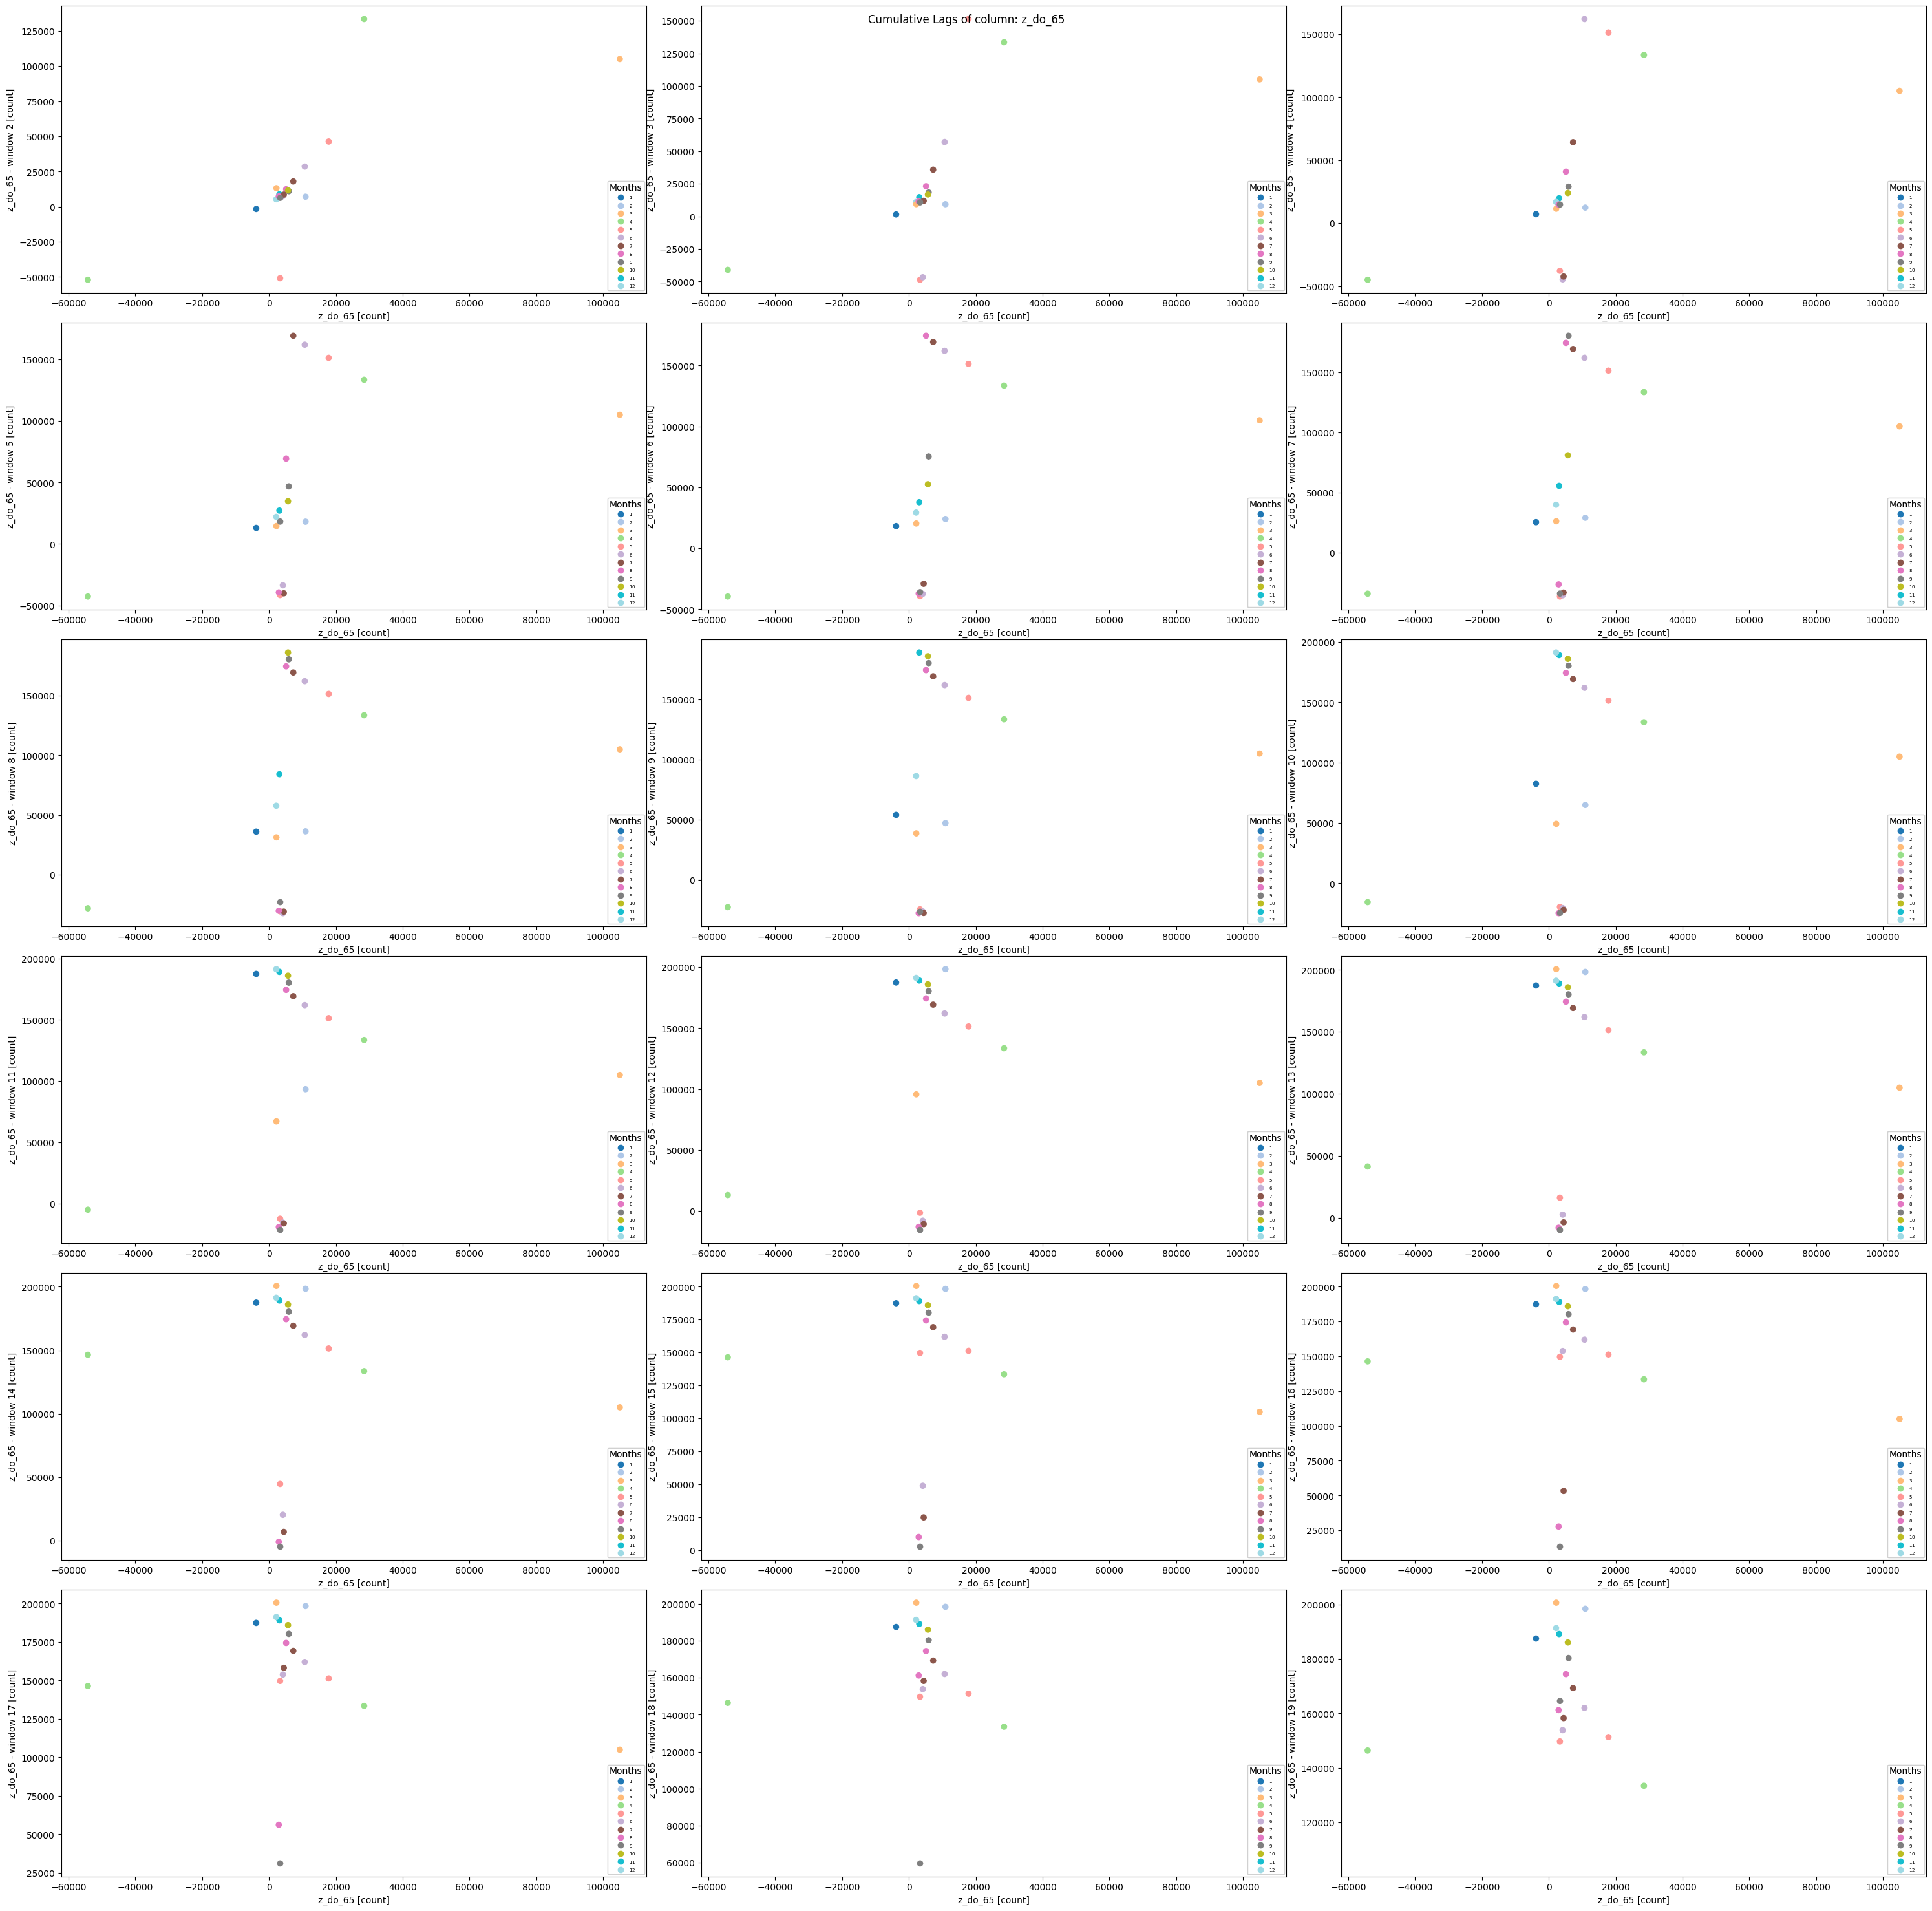

In [13]:
fig = plot_cumulative_lags("z_do_65", df_refugees, unit="count")

- approx same positive correlation as celkem - with window 2, 3 and lowering -> theory majority are women
- approx same weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

<Figure size 2000x2000 with 0 Axes>

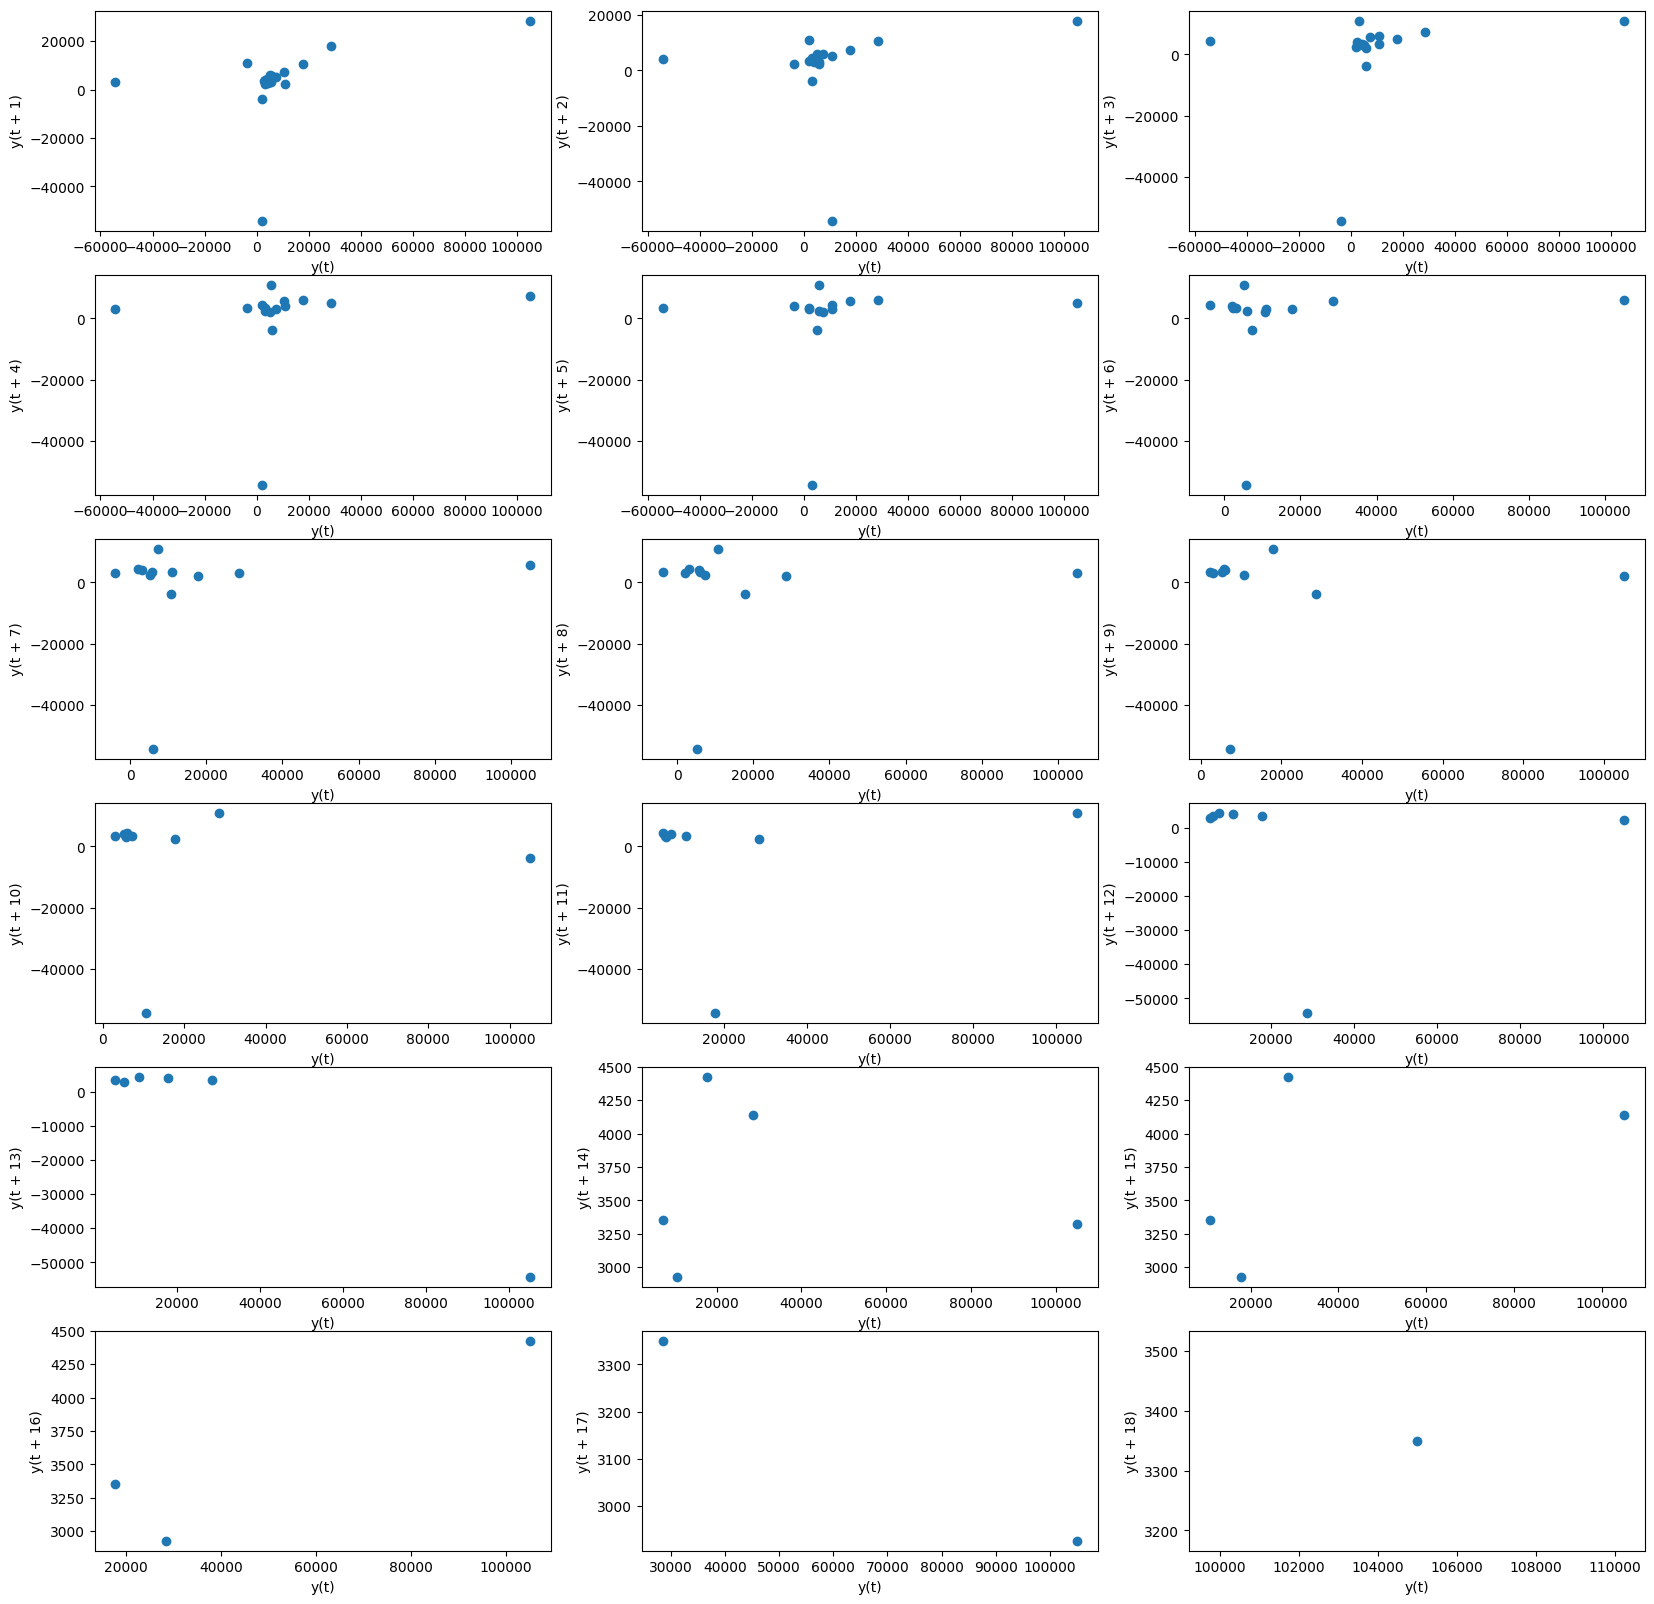

In [14]:
plot_pd_lag_plots(df_refugees, "z_do_65")

- no strong seasonality

### Plots of lags of m_do_65/celkem

In [15]:
def add_ratios(df, dividend_col, divisor_col) -> pd.DataFrame:
    res_df = df.copy()
    res_df[f"{dividend_col}_ratio"] = res_df[dividend_col] / \
        res_df[divisor_col]
    for window in range(2, 20, 1):
        res_df[f"{dividend_col}_ratio_w{window}"] = abs(res_df[f"{dividend_col}_w{window}"].to_numpy() / res_df[f"{divisor_col}_w{window}"].to_numpy())
    return res_df

In [16]:
df_refugees_ratio = add_ratios(df_refugees, "m_do_65", "celkem")
display(df_refugees_ratio.head())

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   

            m_do_65_ratio_w10  m_do_65_ratio_w11  m_do_65_ratio_w12  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w13  m_do_65_ratio_w14  m_do_65_ratio_w15  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w16  m_do_65_ratio_w17  m_do_65_ratio_w18  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w19  
date                           
2022-03-01           0.116152  
2022-04-01           0.152064  
2022-05-01           0.167543  
2022-06-01           0.172138  
2022-07-01           0.176939  

[5 rows x 134 columns]

In [17]:
df_refugees["m_do_65"]

date
2022-03-01    28121.0
2022-04-01    18986.0
2022-05-01    11344.0
2022-06-01     5307.0
2022-07-01     4509.0
2022-08-01     4378.0
2022-09-01     3798.0
2022-10-01     3988.0
2022-11-01     2904.0
2022-12-01     1786.0
2023-01-01     -219.0
2023-02-01     6107.0
2023-03-01     2940.0
2023-04-01   -14212.0
2023-05-01     2616.0
2023-06-01     2339.0
2023-07-01     3028.0
2023-08-01     2278.0
2023-09-01     2437.0
Name: m_do_65, dtype: float64

In [18]:
df_refugees["celkem"]

date
2022-03-01    242105.0
2022-04-01     67679.0
2022-05-01     39087.0
2022-06-01     21517.0
2022-07-01     15435.0
2022-08-01     10766.0
2022-09-01     10594.0
2022-10-01     11204.0
2022-11-01      6598.0
2022-12-01      4683.0
2023-01-01     -9368.0
2023-02-01     25083.0
2023-03-01      5805.0
2023-04-01   -119544.0
2023-05-01      7153.0
2023-06-01      8424.0
2023-07-01      9984.0
2023-08-01      6695.0
2023-09-01      7124.0
Name: celkem, dtype: float64

In [19]:
df_refugees_ratio["m_do_65_ratio_w3"]

date
2022-03-01    0.116152
2022-04-01    0.152064
2022-05-01    0.167543
2022-06-01    0.277800
2022-07-01    0.278278
2022-08-01    0.297456
2022-09-01    0.344748
2022-10-01    0.373541
2022-11-01    0.376461
2022-12-01    0.385946
2023-01-01    2.337167
2023-02-01    0.376213
2023-03-01    0.410223
2023-04-01    0.058259
2023-05-01    0.081211
2023-06-01    0.089038
2023-07-01    0.312312
2023-08-01    0.304545
2023-09-01    0.325295
Name: m_do_65_ratio_w3, dtype: float64

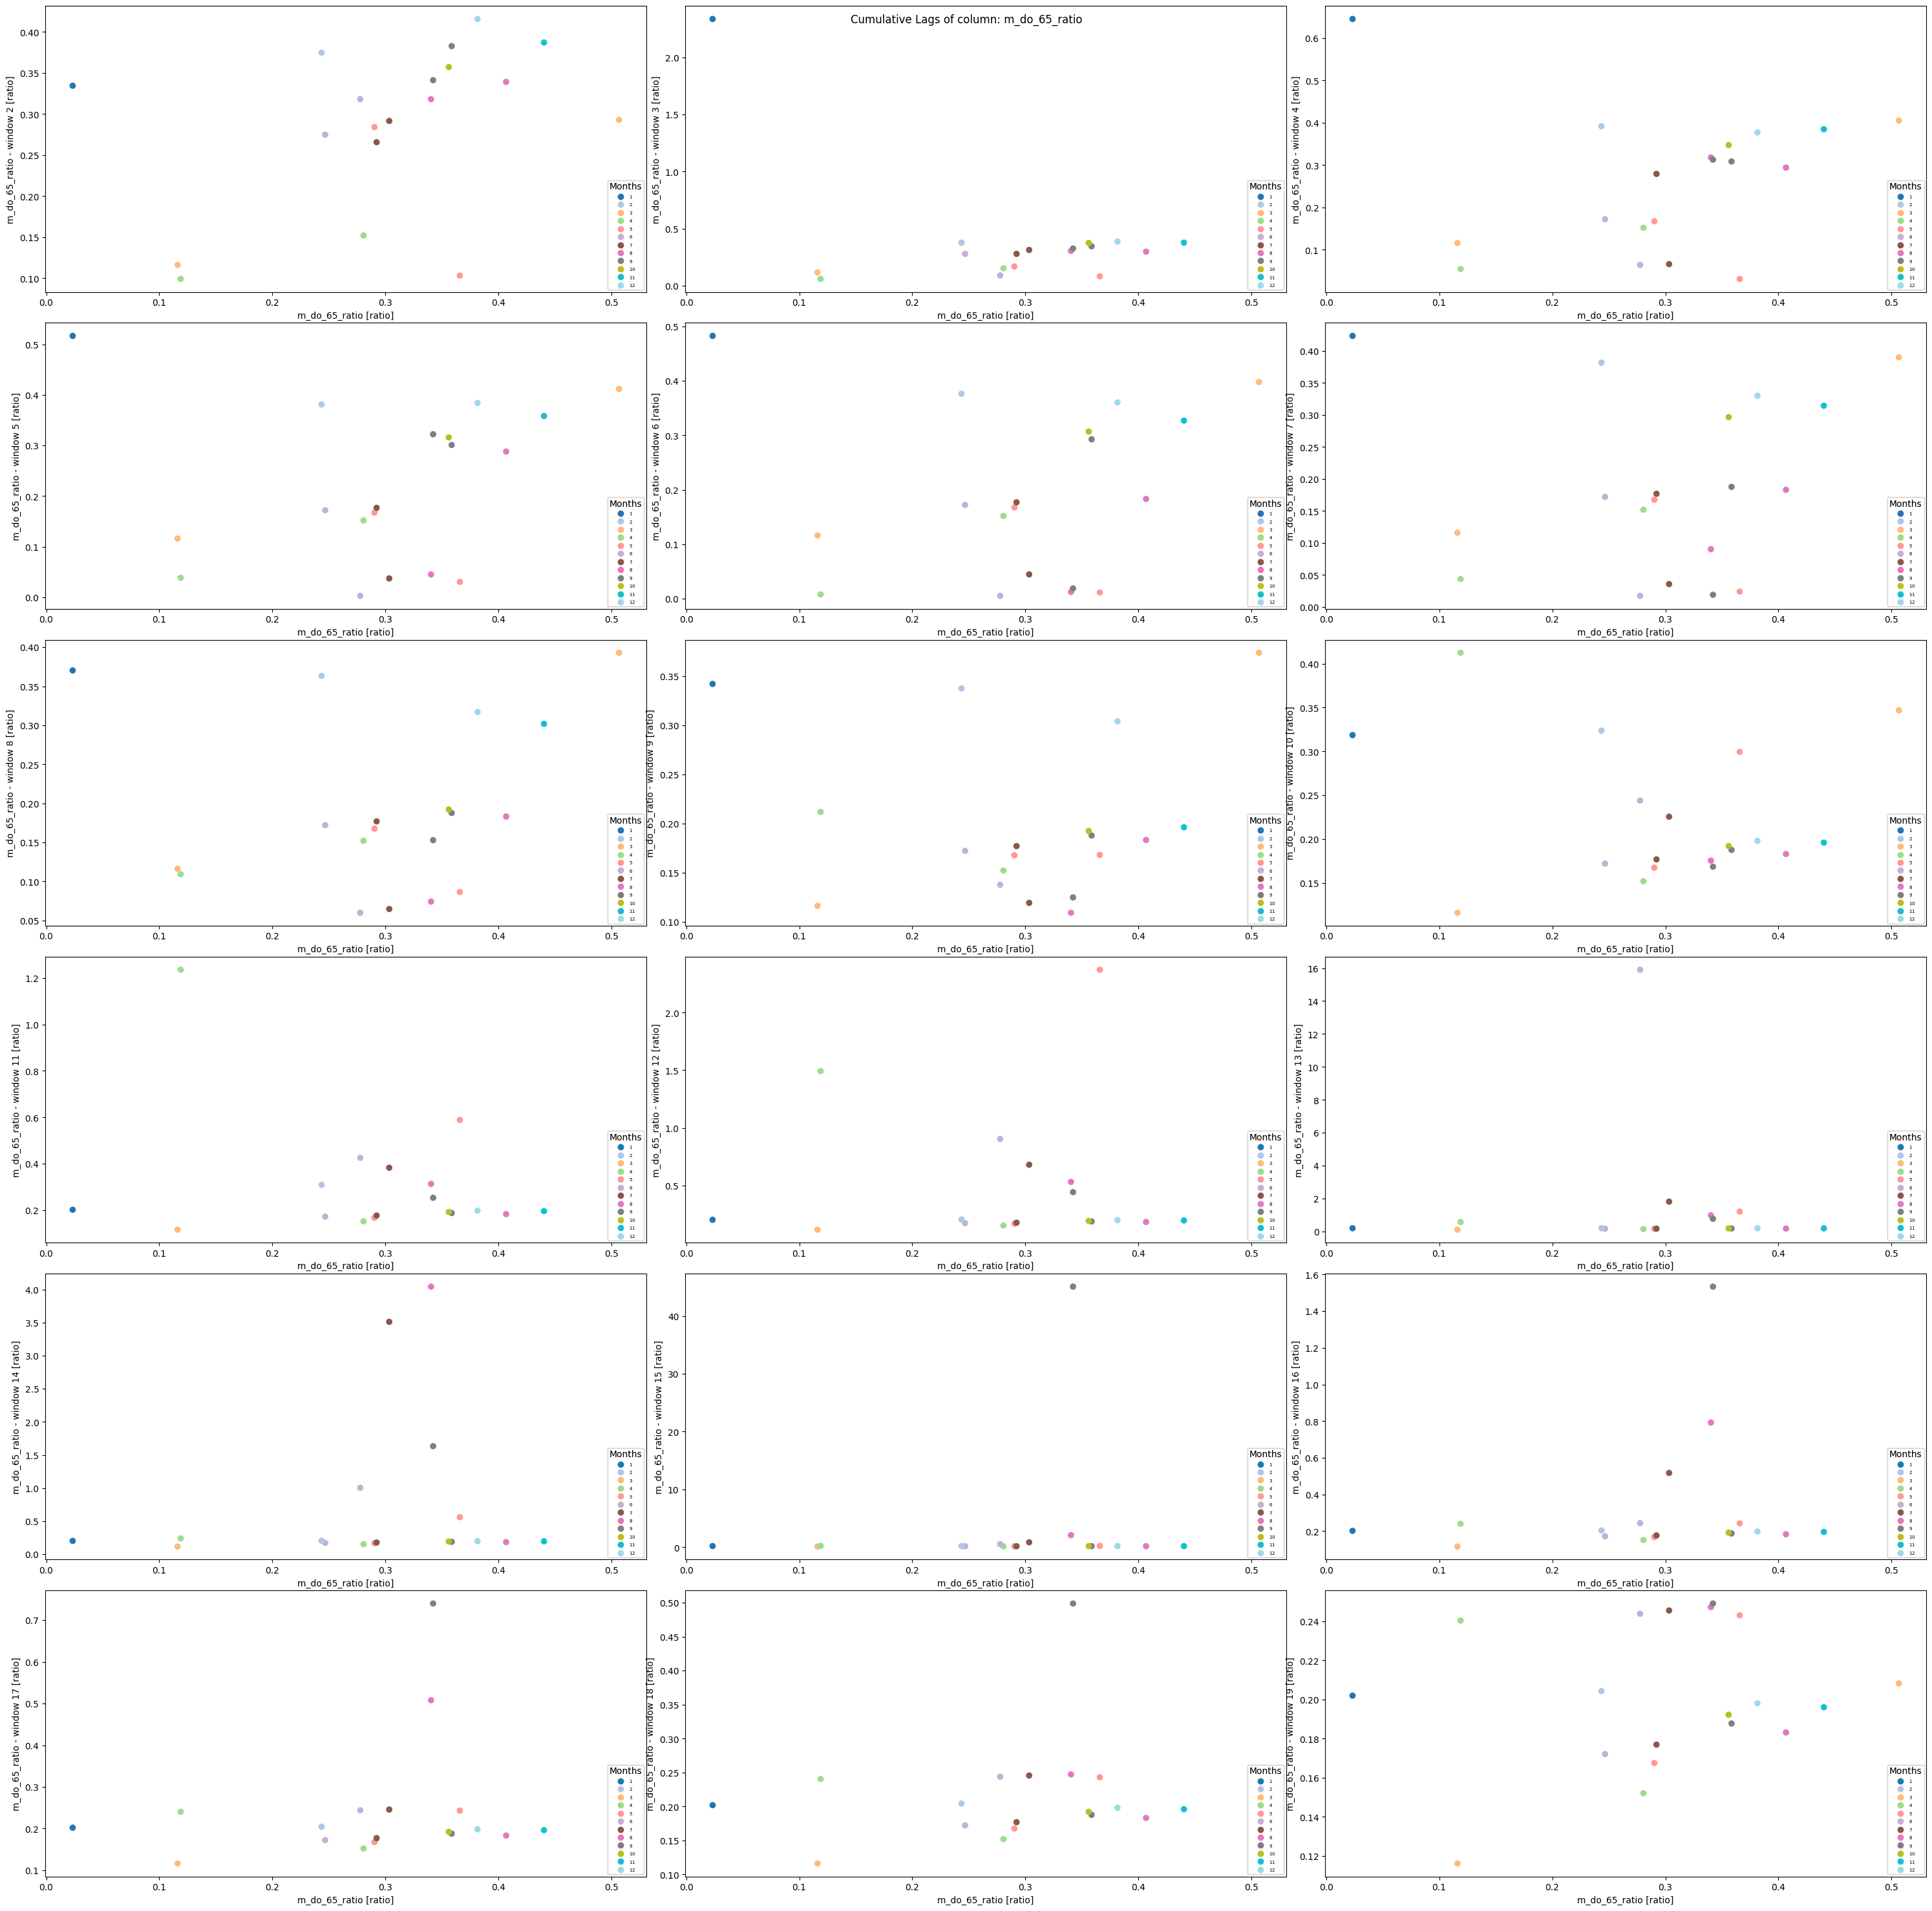

In [20]:
fig = plot_cumulative_lags("m_do_65_ratio", df_refugees_ratio, unit="ratio")

<Figure size 2000x2000 with 0 Axes>

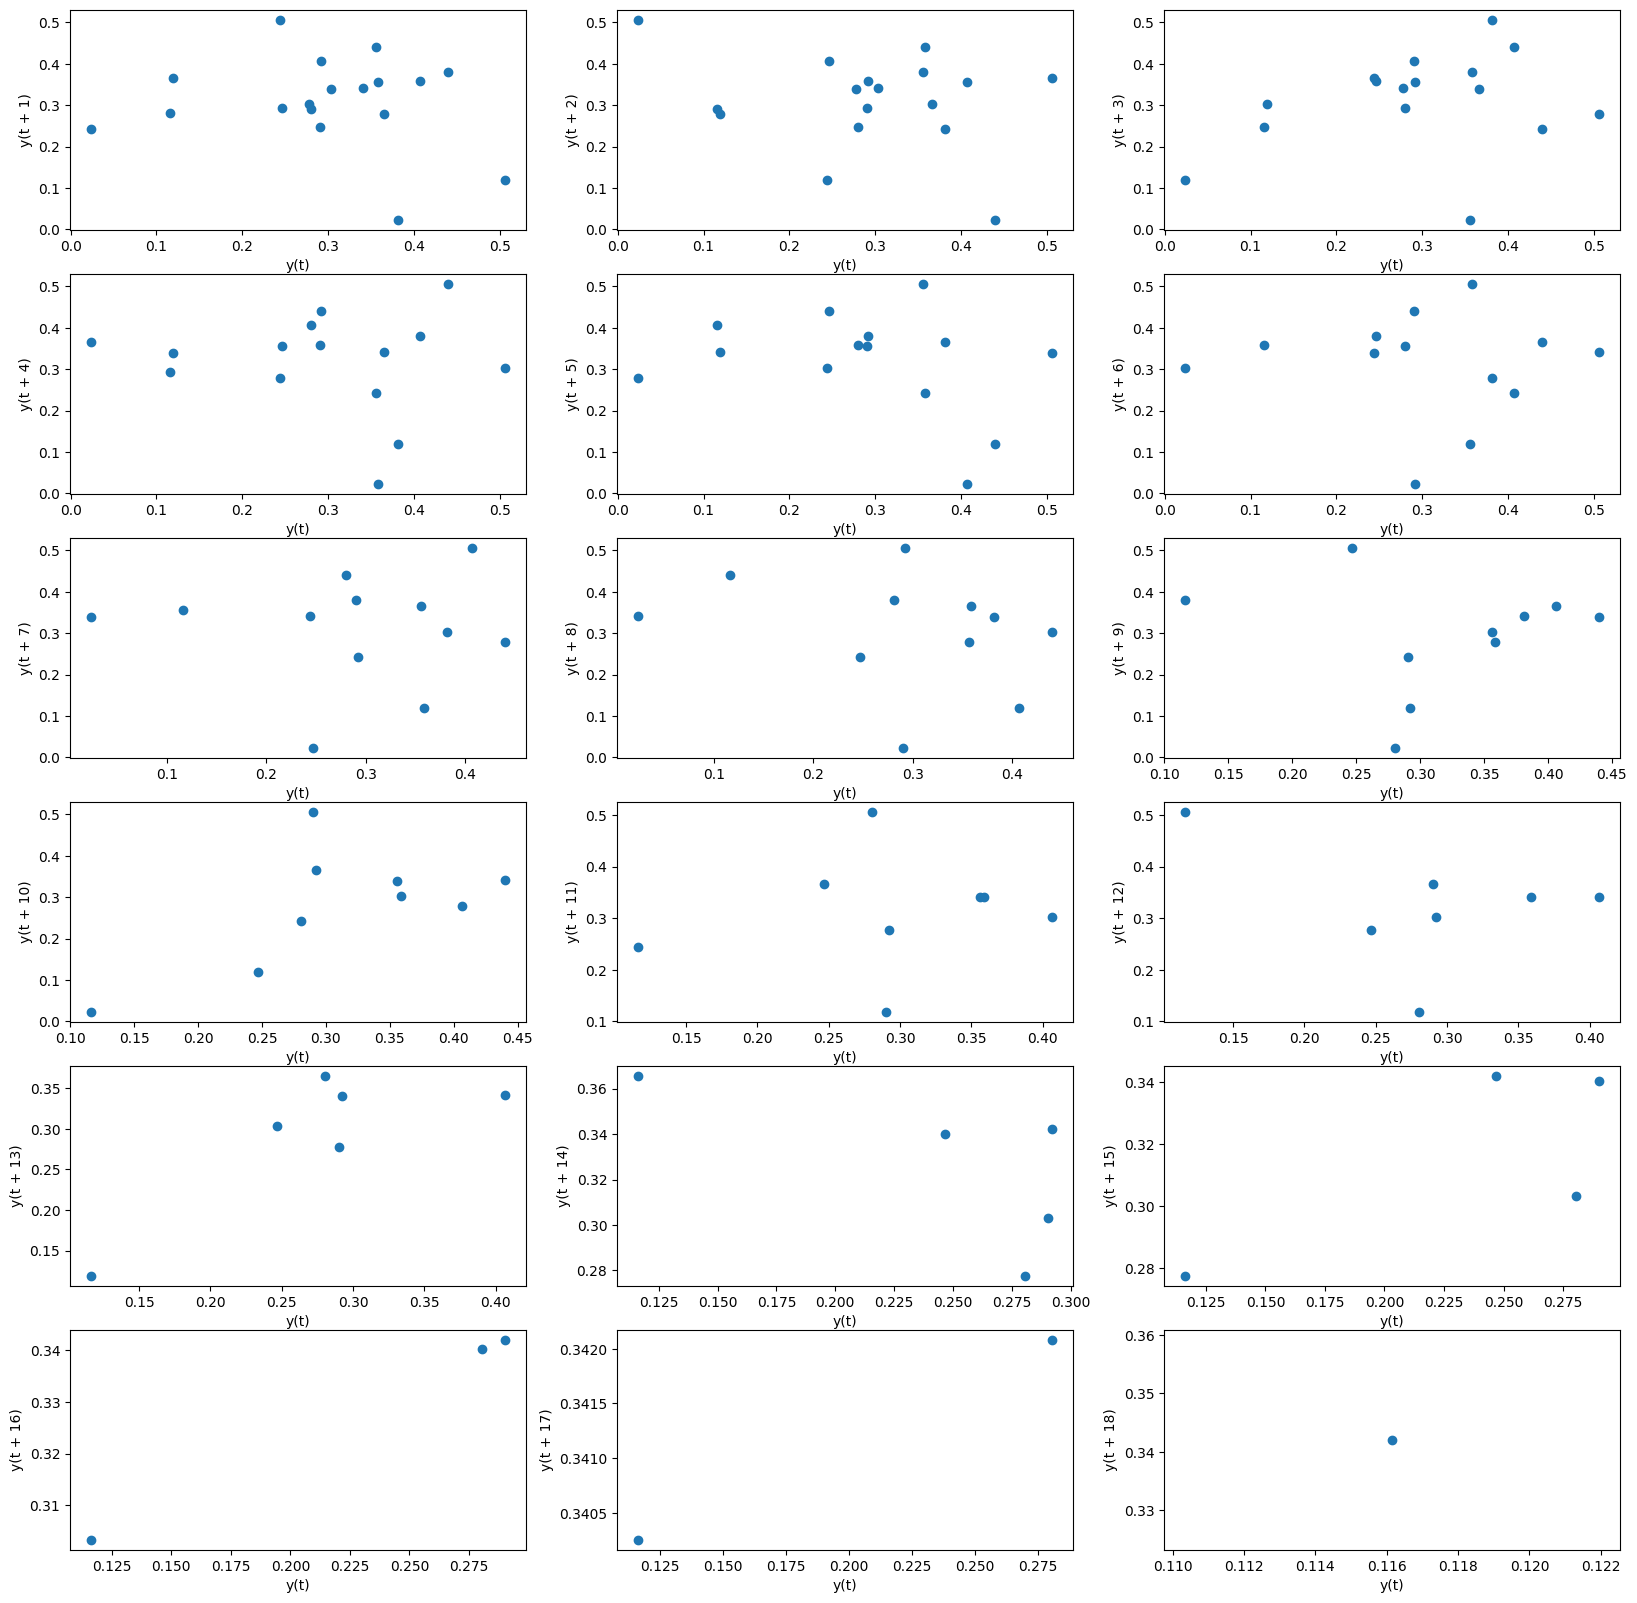

In [21]:
plot_pd_lag_plots(df_refugees_ratio, "m_do_65_ratio")

### Plots of lags of z_do_65/celkem

In [22]:
df_refugees_ratio = add_ratios(df_refugees, "z_do_65", "celkem")
display(df_refugees_ratio.head())

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   

            z_do_65_ratio_w10  z_do_65_ratio_w11  z_do_65_ratio_w12  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w13  z_do_65_ratio_w14  z_do_65_ratio_w15  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w16  z_do_65_ratio_w17  z_do_65_ratio_w18  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w19  
date                           
2022-03-01           0.433659  
2022-04-01           0.430842  
2022-05-01           0.433733  
2022-06-01           0.437379  
2022-07-01           0.438712  

[5 rows x 134 columns]

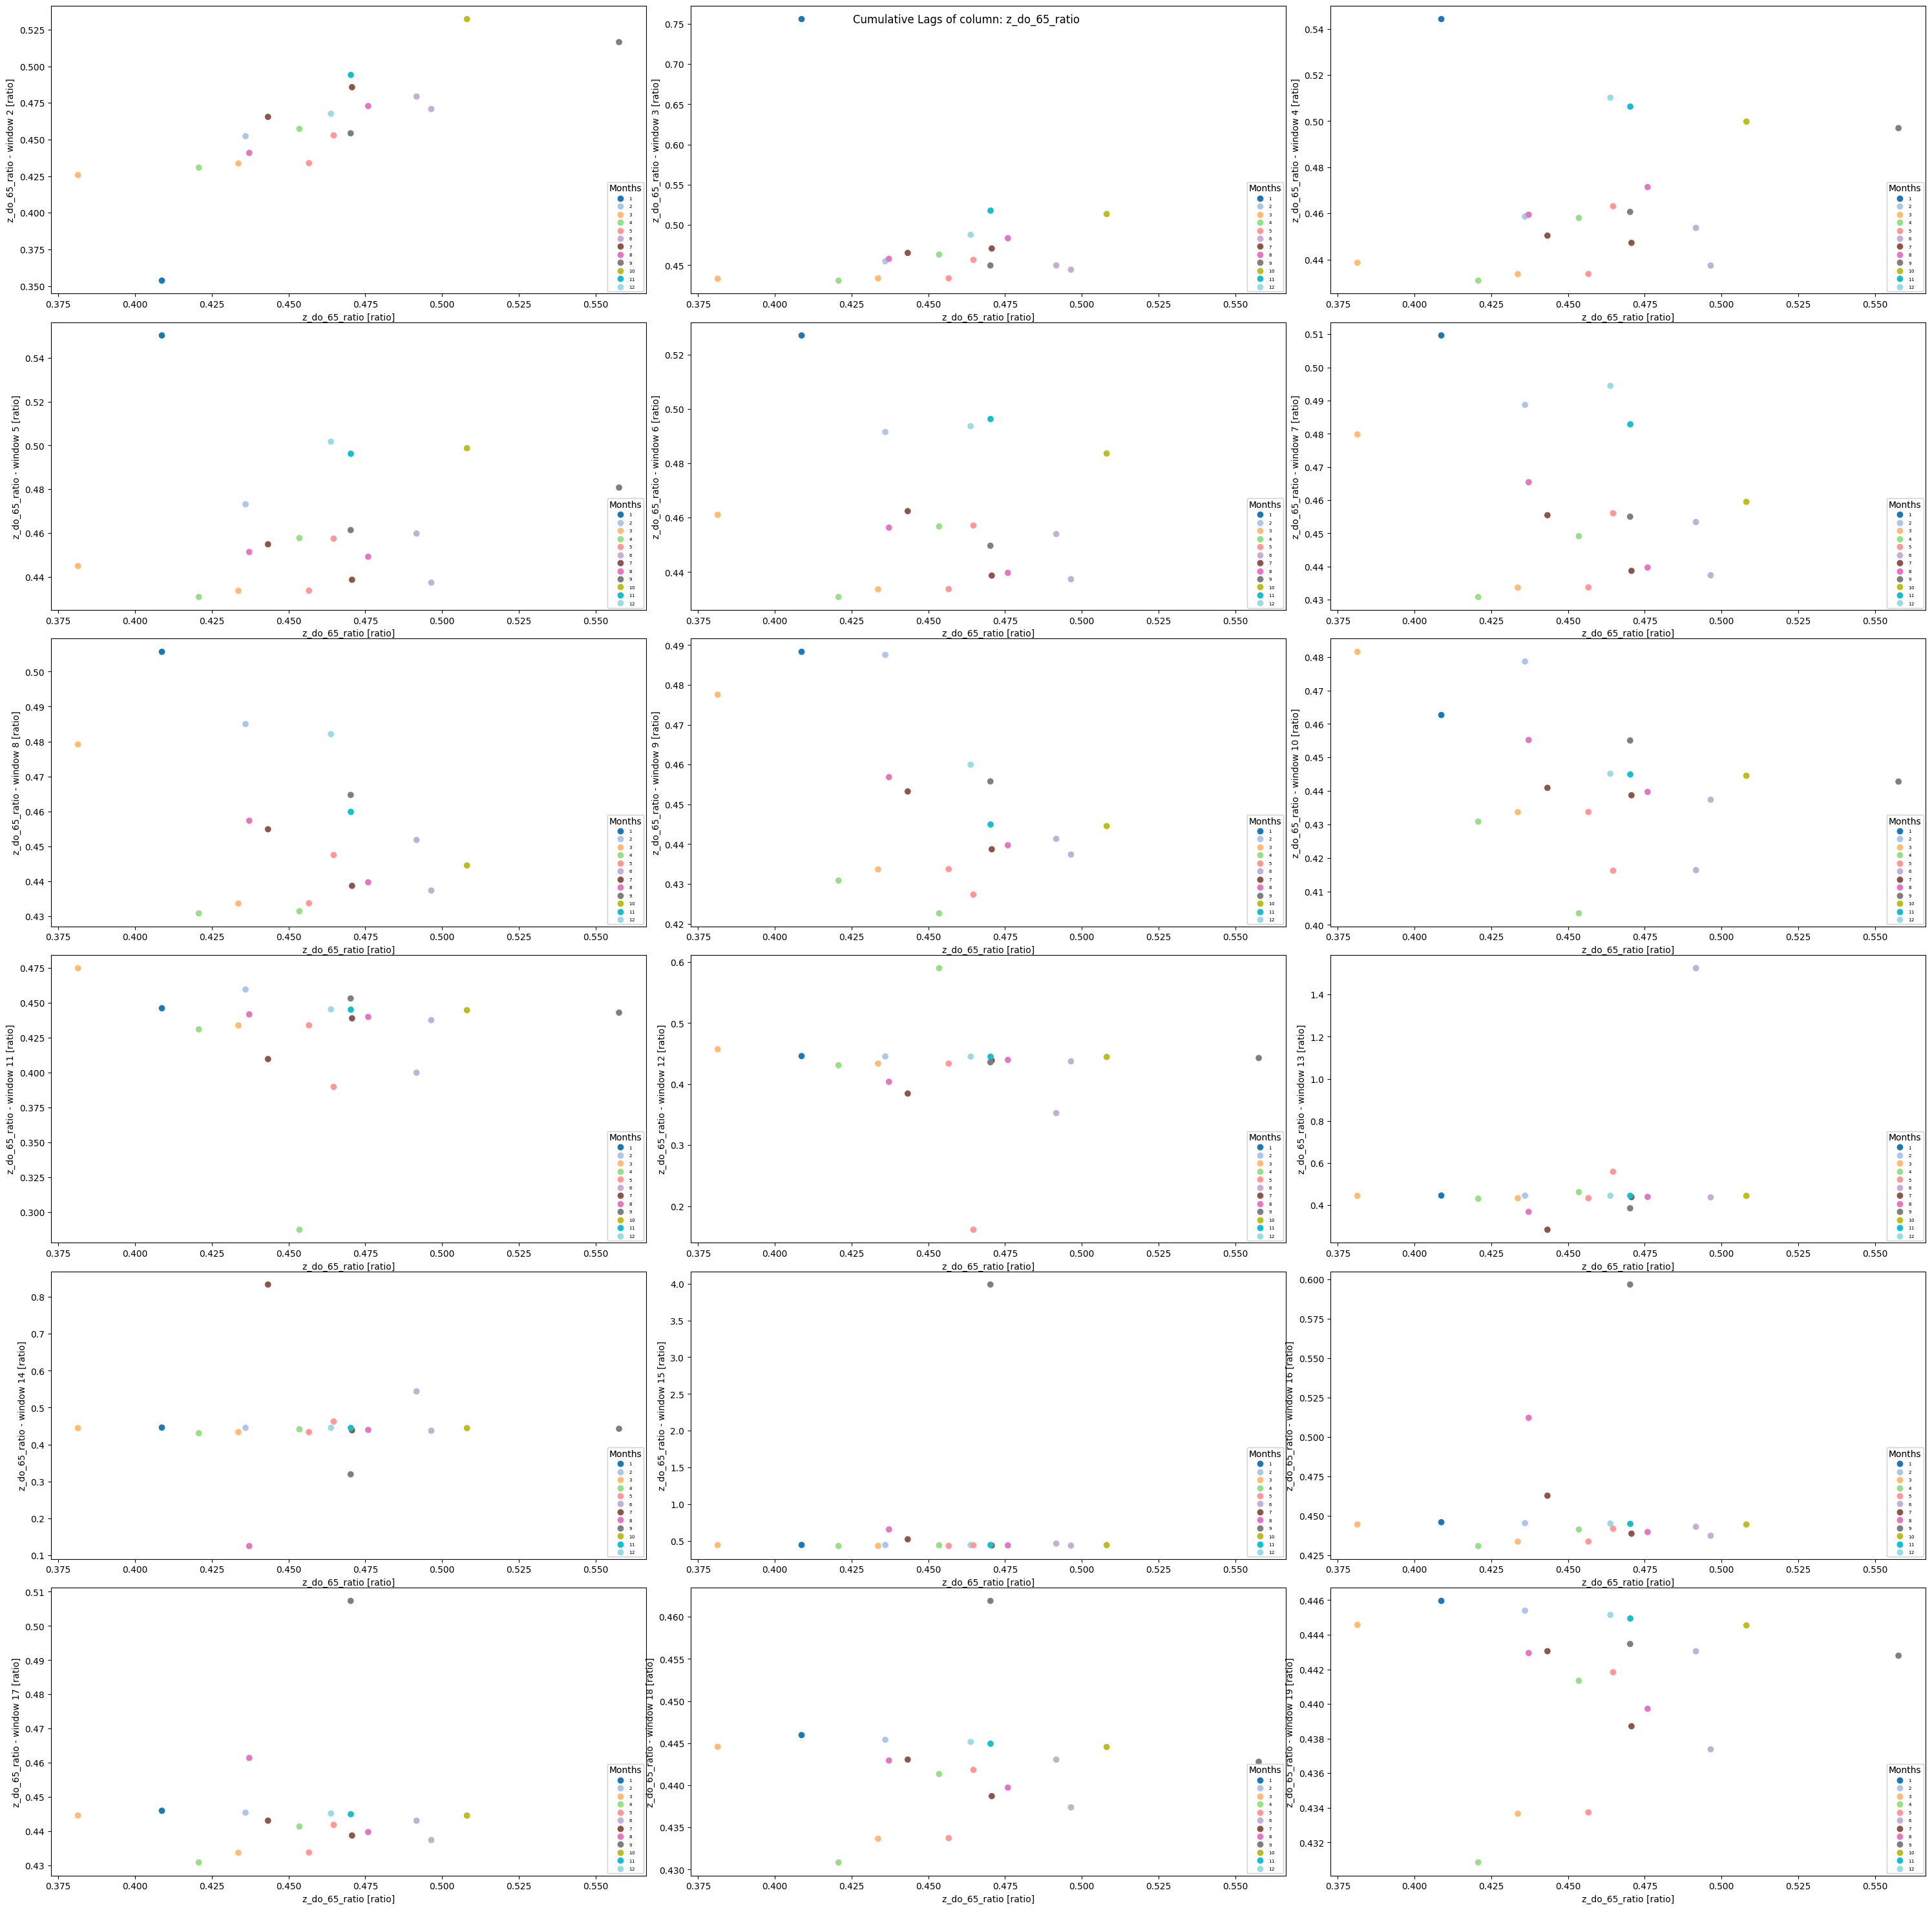

In [24]:
fig = plot_cumulative_lags("z_do_65_ratio", df_refugees_ratio, unit="ratio")

<Figure size 2000x2000 with 0 Axes>

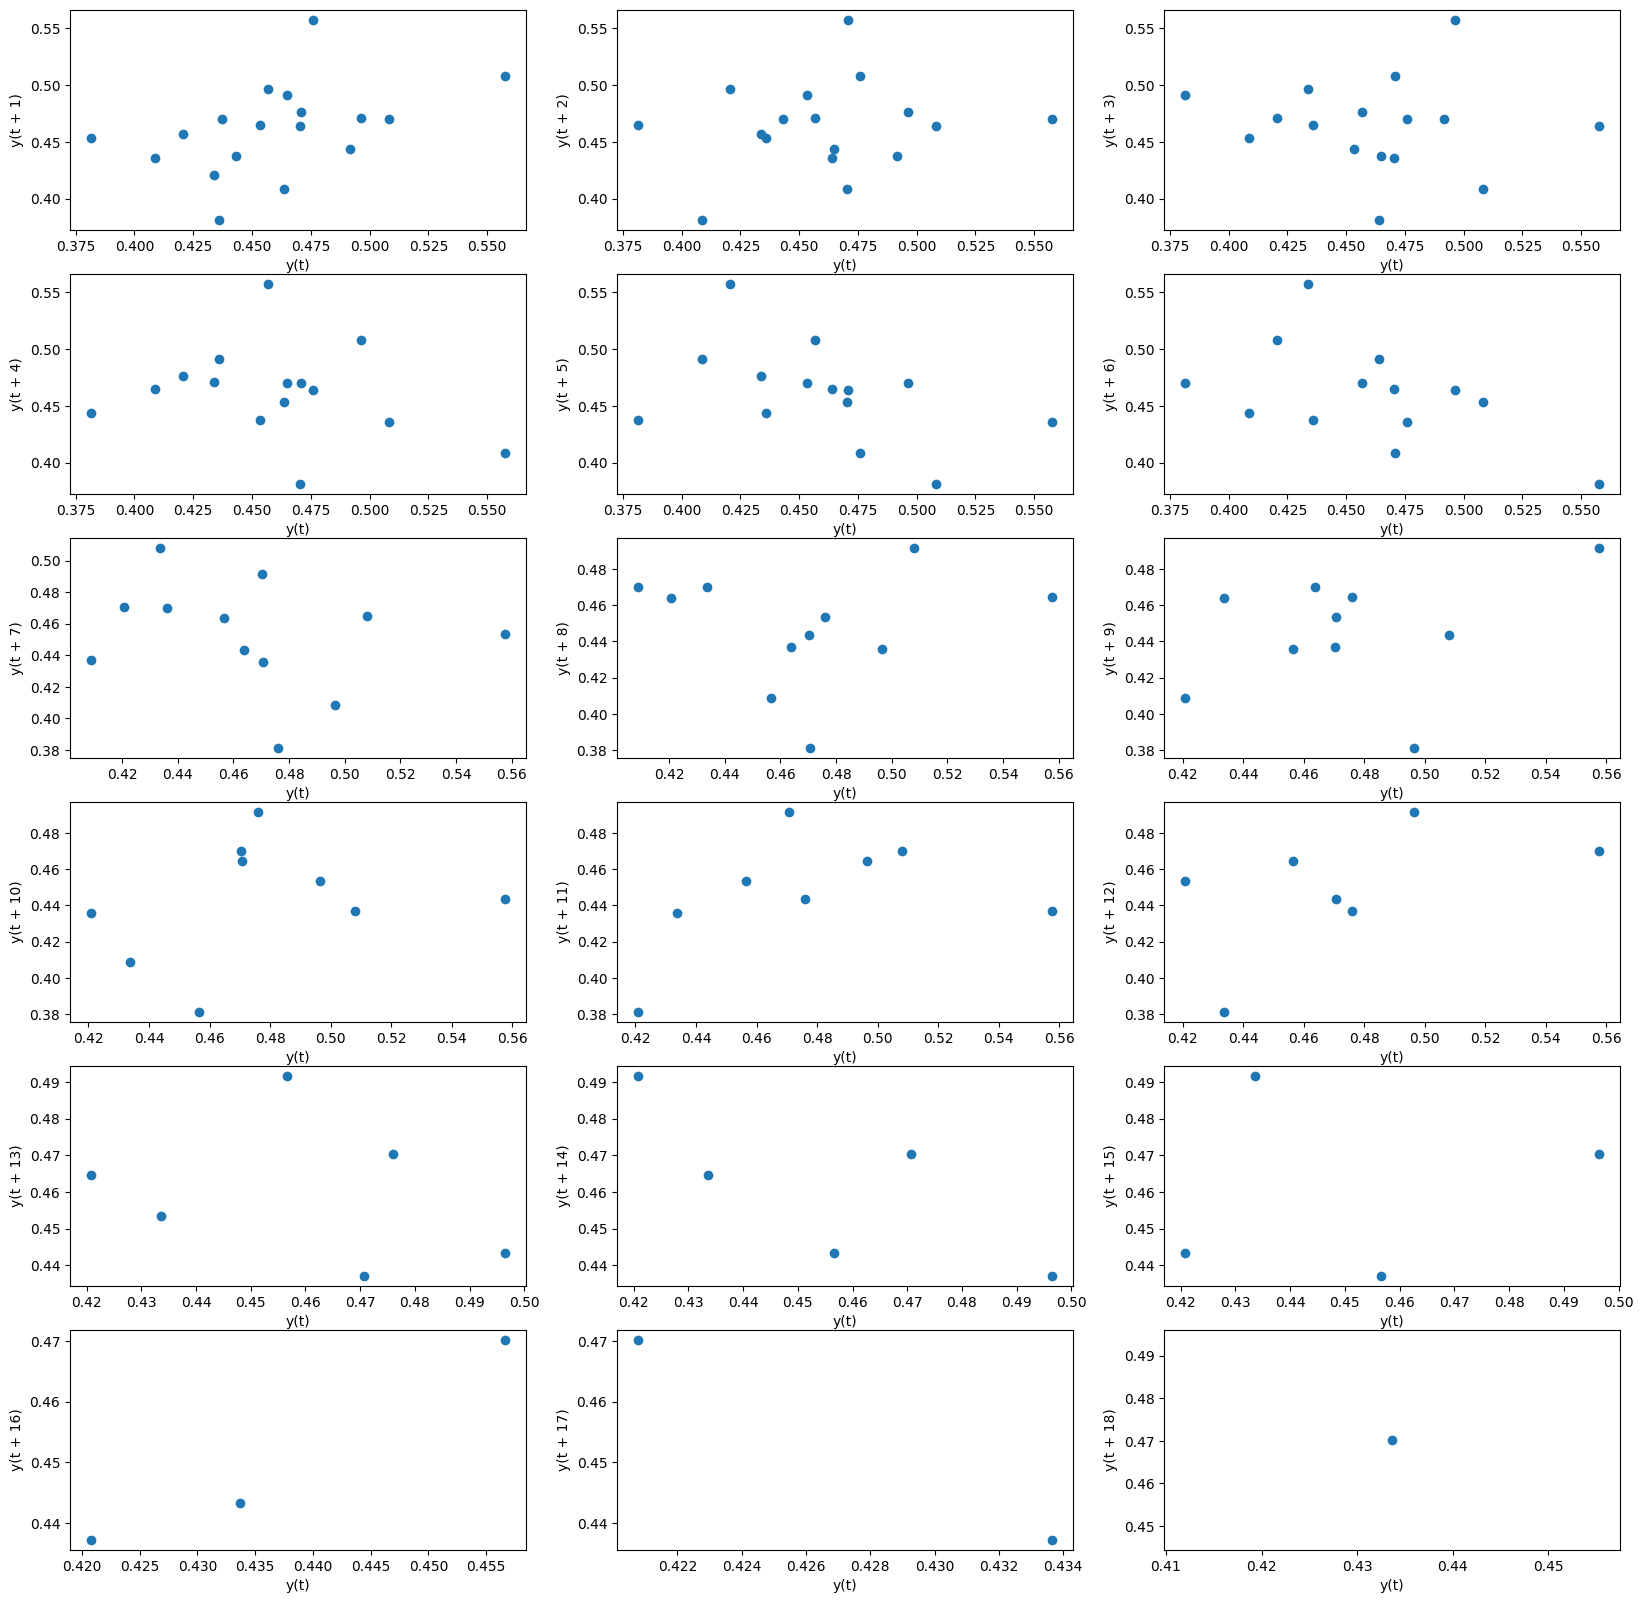

In [25]:
plot_pd_lag_plots(df_refugees_ratio, "z_do_65_ratio")

## Other lags

Try quarter (3 months lags) on all other columns

In [26]:
df.columns

Index(['month', 'year', 'avg_monthly_salary', 'monthly_min_wage',
       'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
       'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price',
       ...
       'z_do_65_w18_ratio', 'celkem_w18', 'm_do_65_w4_ratio', 'm_do_65_w17',
       'm_do_65_w18_ratio', 'm_do_65_w12', 'uchazeciOZamestnaniUoZMuzi',
       'm_do_65_w8_ratio', 'z_do_65_w19_ratio', 'z_do_65_w5'],
      dtype='object', length=116)

<Figure size 2000x2000 with 0 Axes>

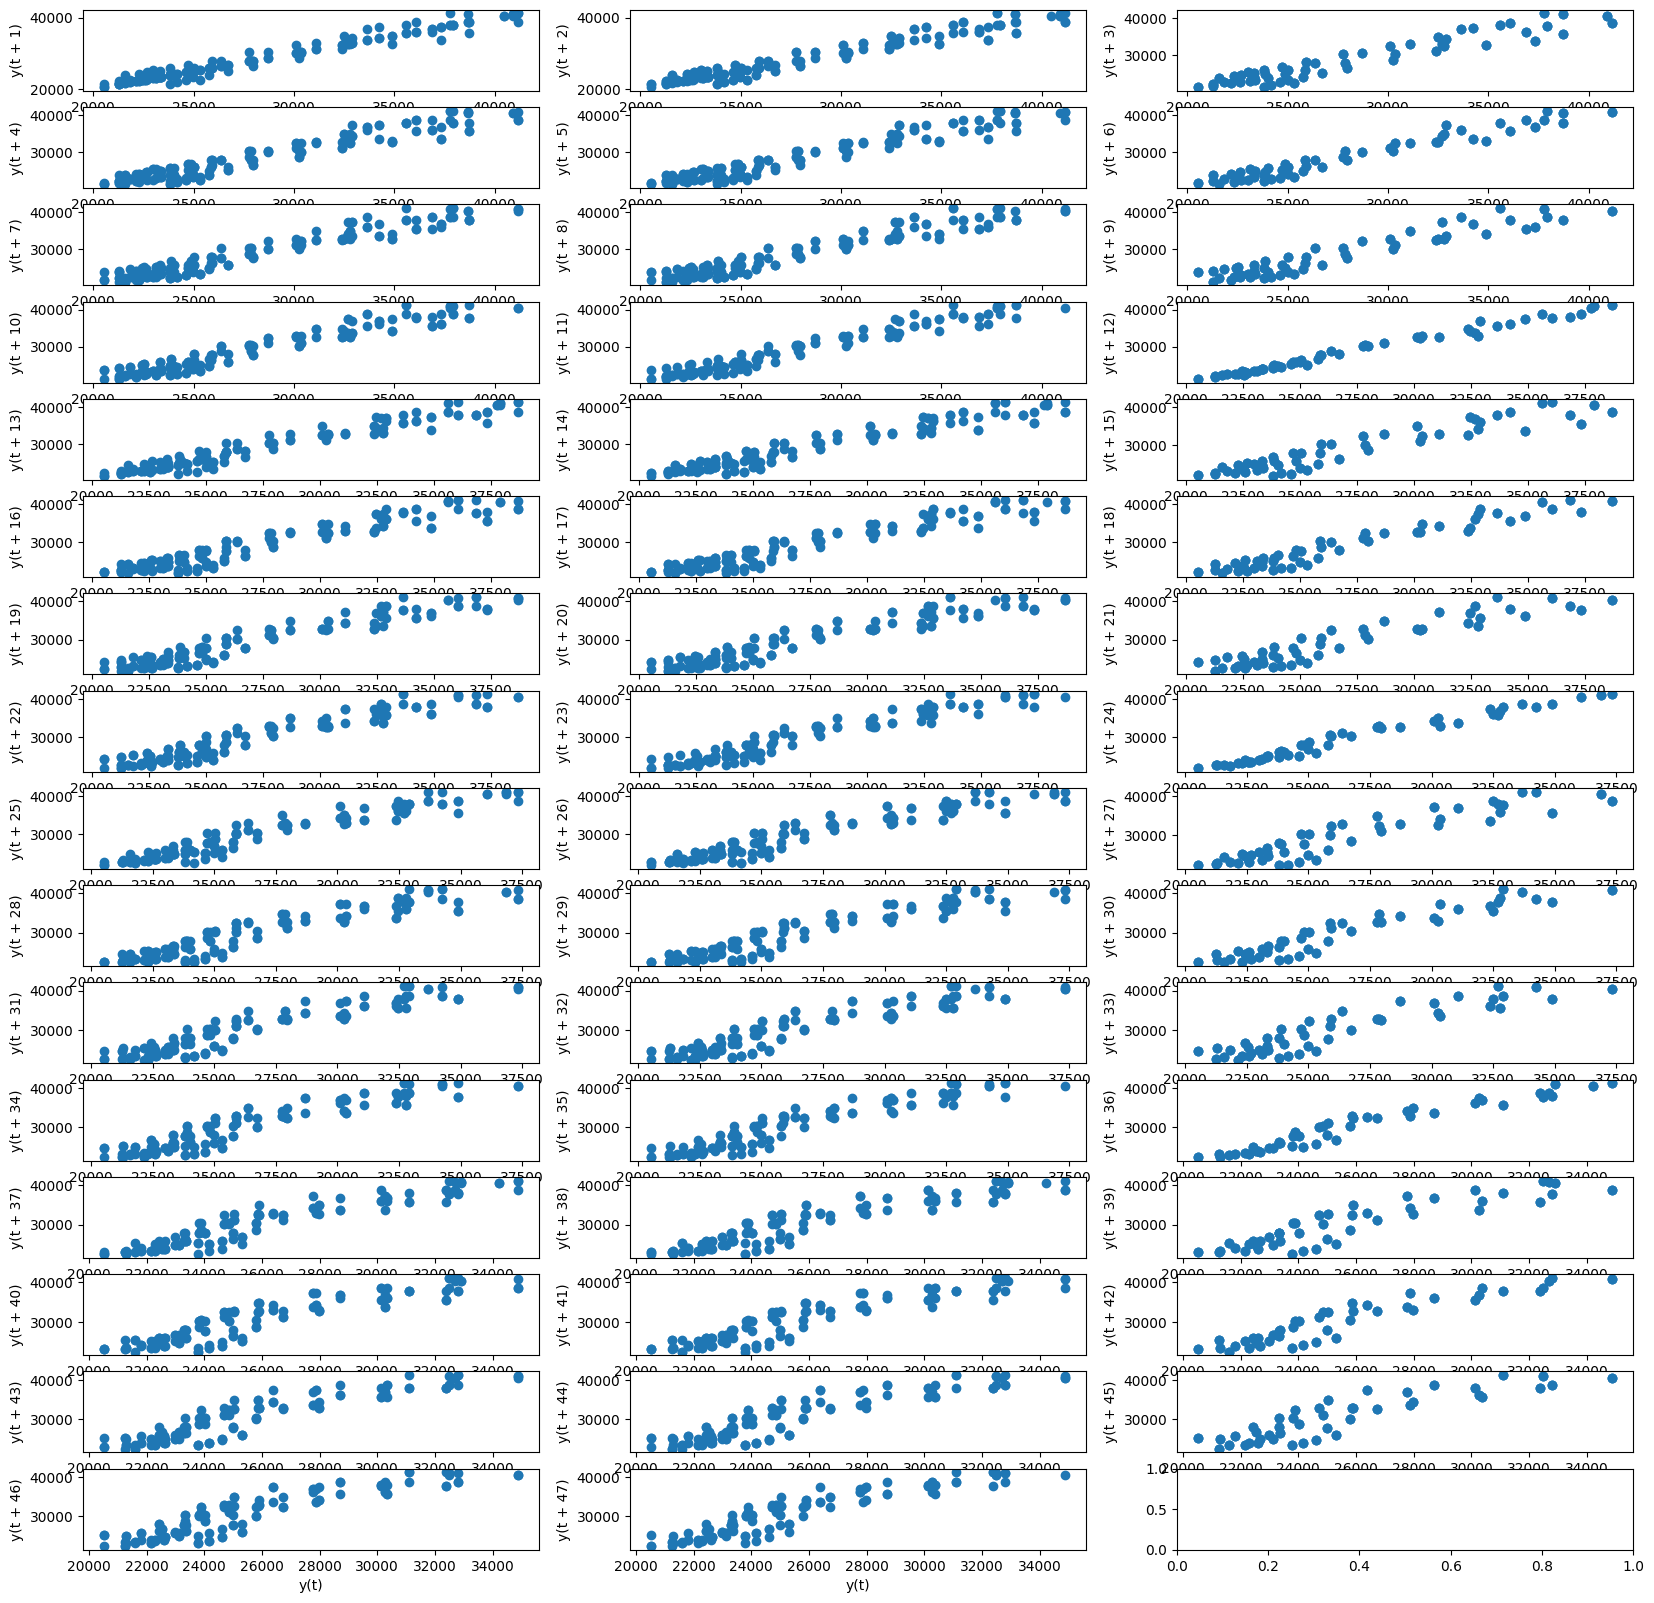

In [64]:
plot_pd_lag_plots(df, "avg_monthly_salary", max_lag=48)

- strong positive correlation in sallaries (they are probably rising all the time) (in the end nonlinear trend)

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 2000x2000 with 0 Axes>

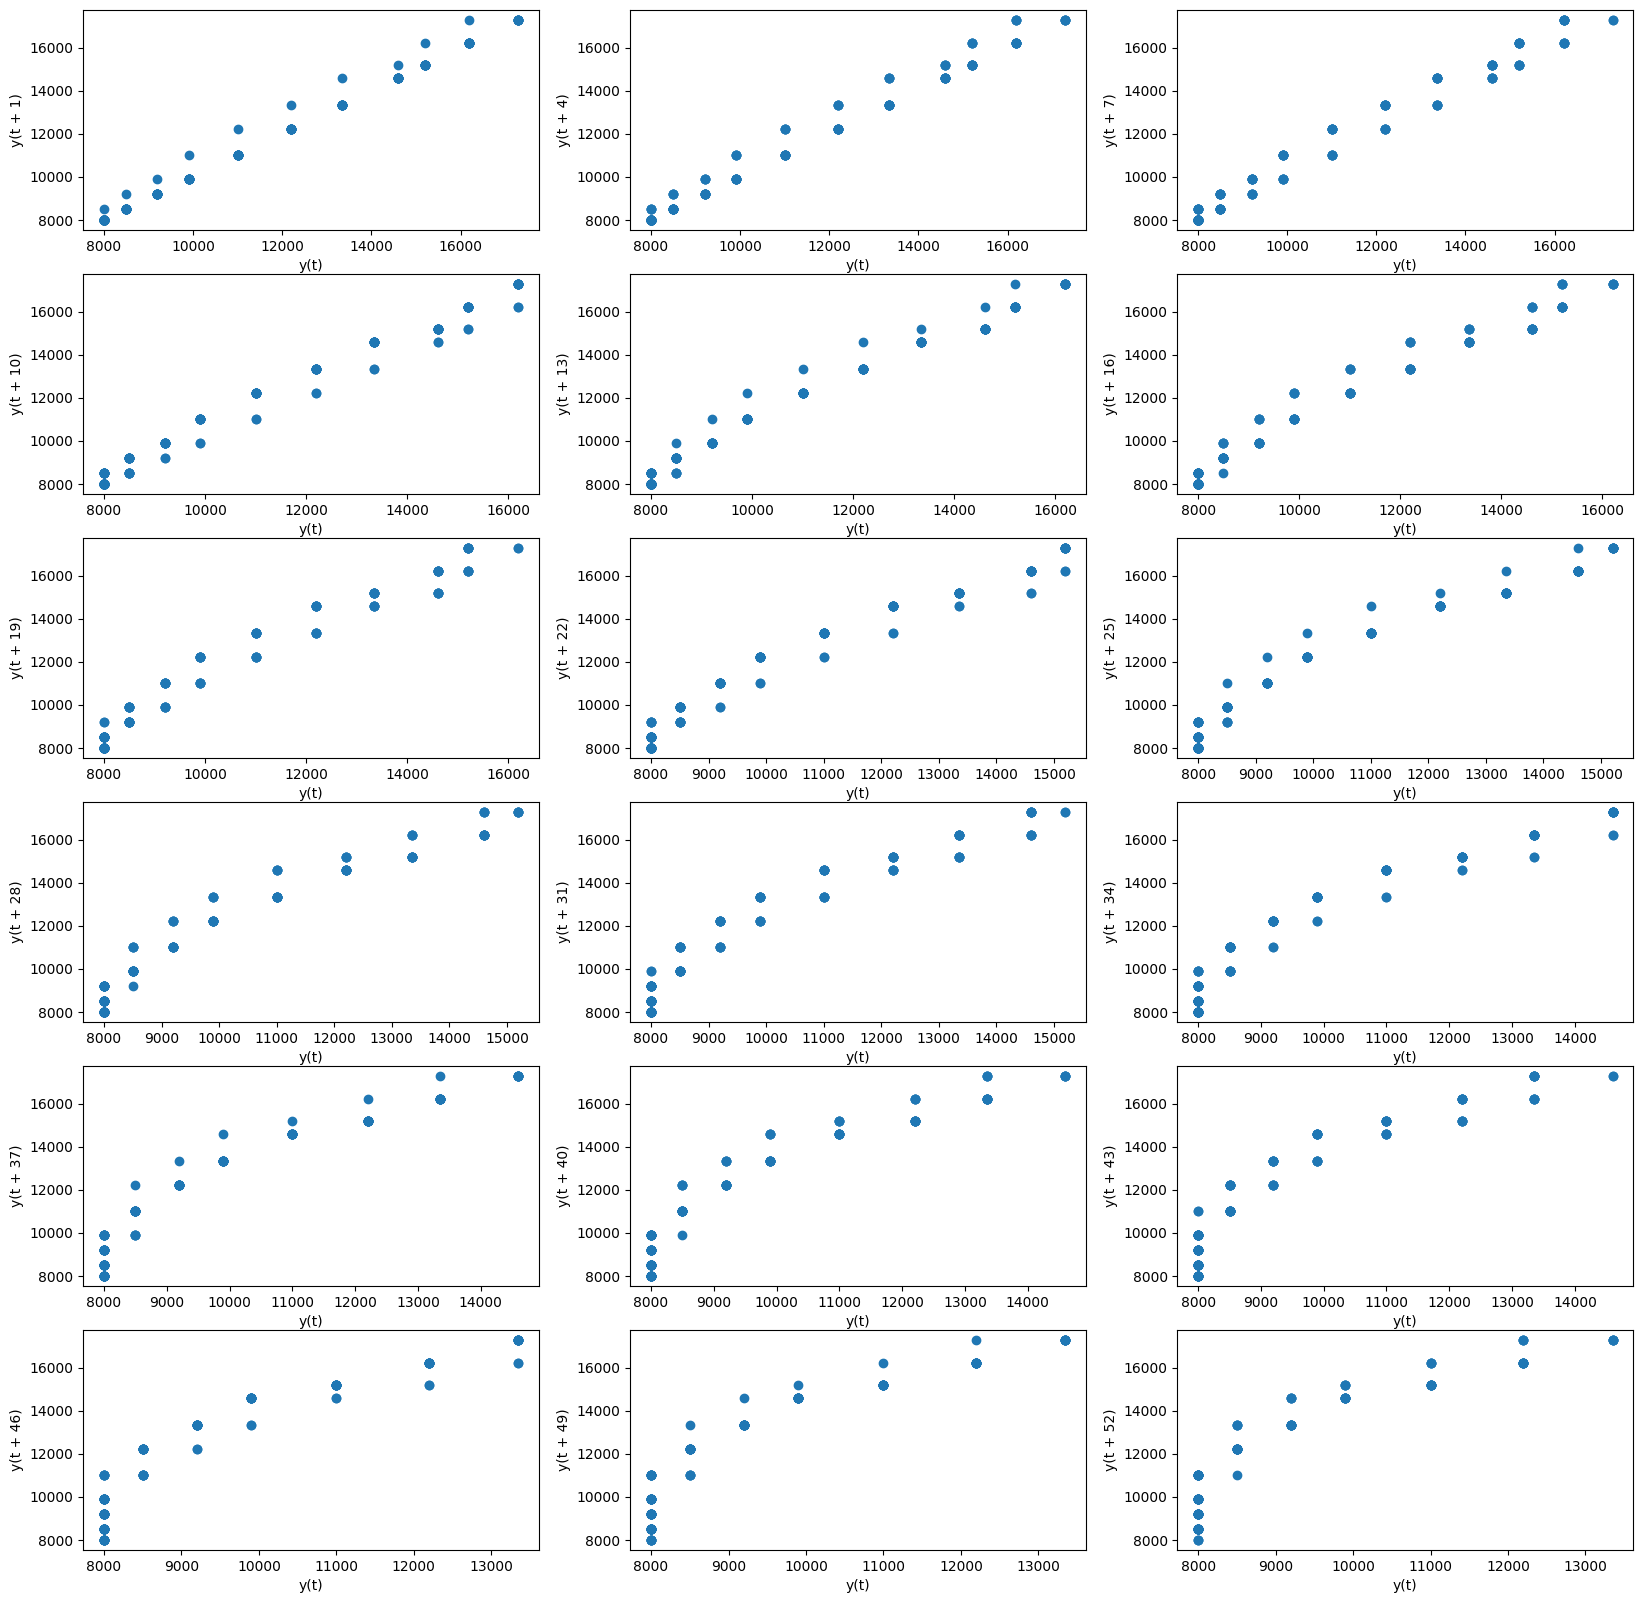

In [66]:
plot_pd_lag_plots(df, "monthly_min_wage", max_lag=60, lag_step=3)

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 2000x2000 with 0 Axes>

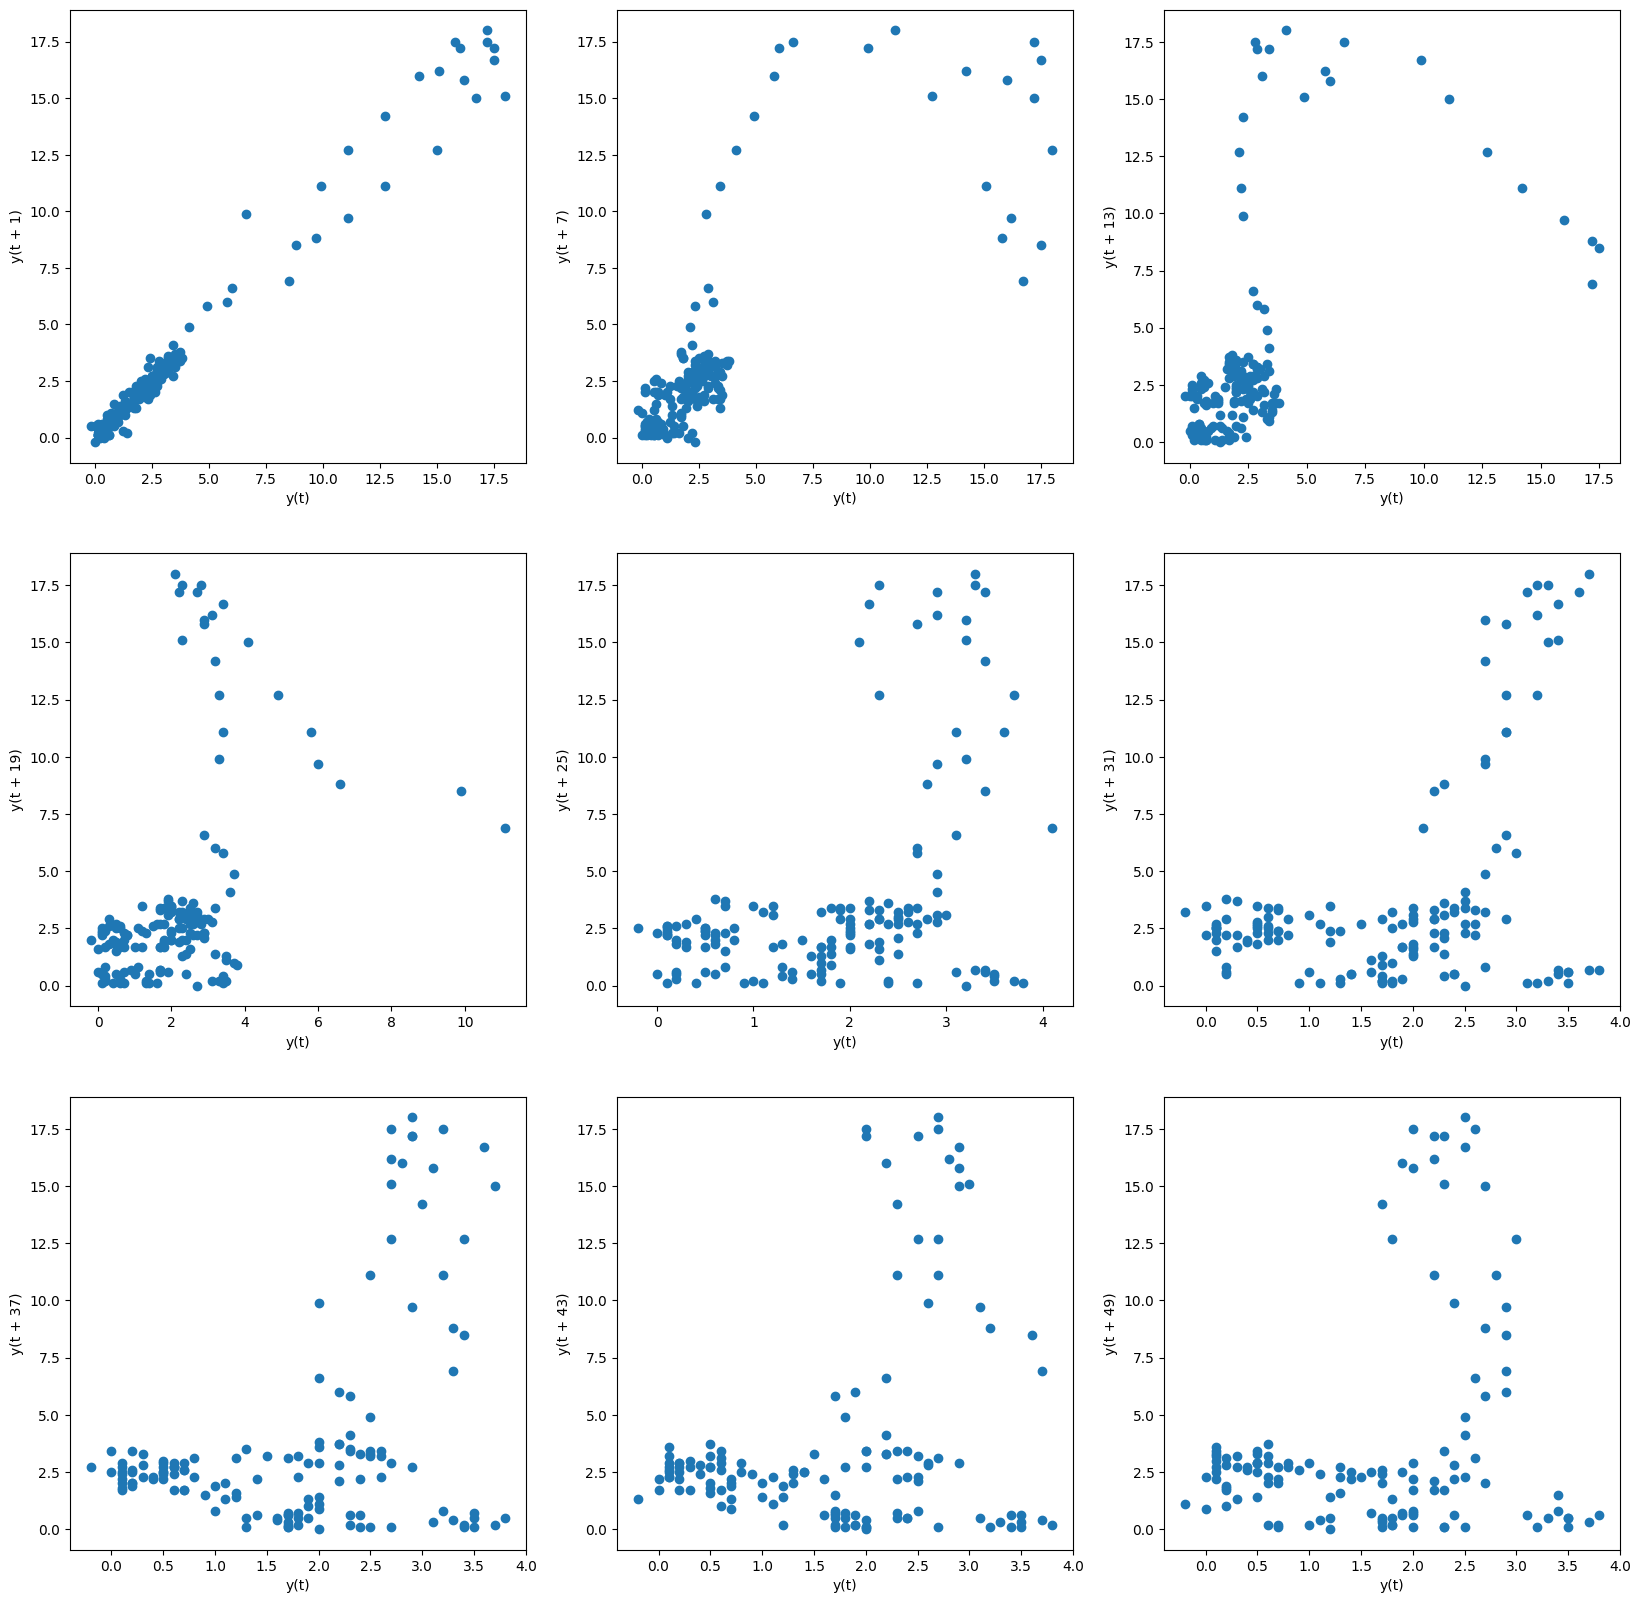

In [67]:
plot_pd_lag_plots(df, "monthly_inflation_rate_wrt_last_year", max_lag=60, lag_step=6)

-  random with some strange pattern -> maybe good to add as predictor?

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 2000x2000 with 0 Axes>

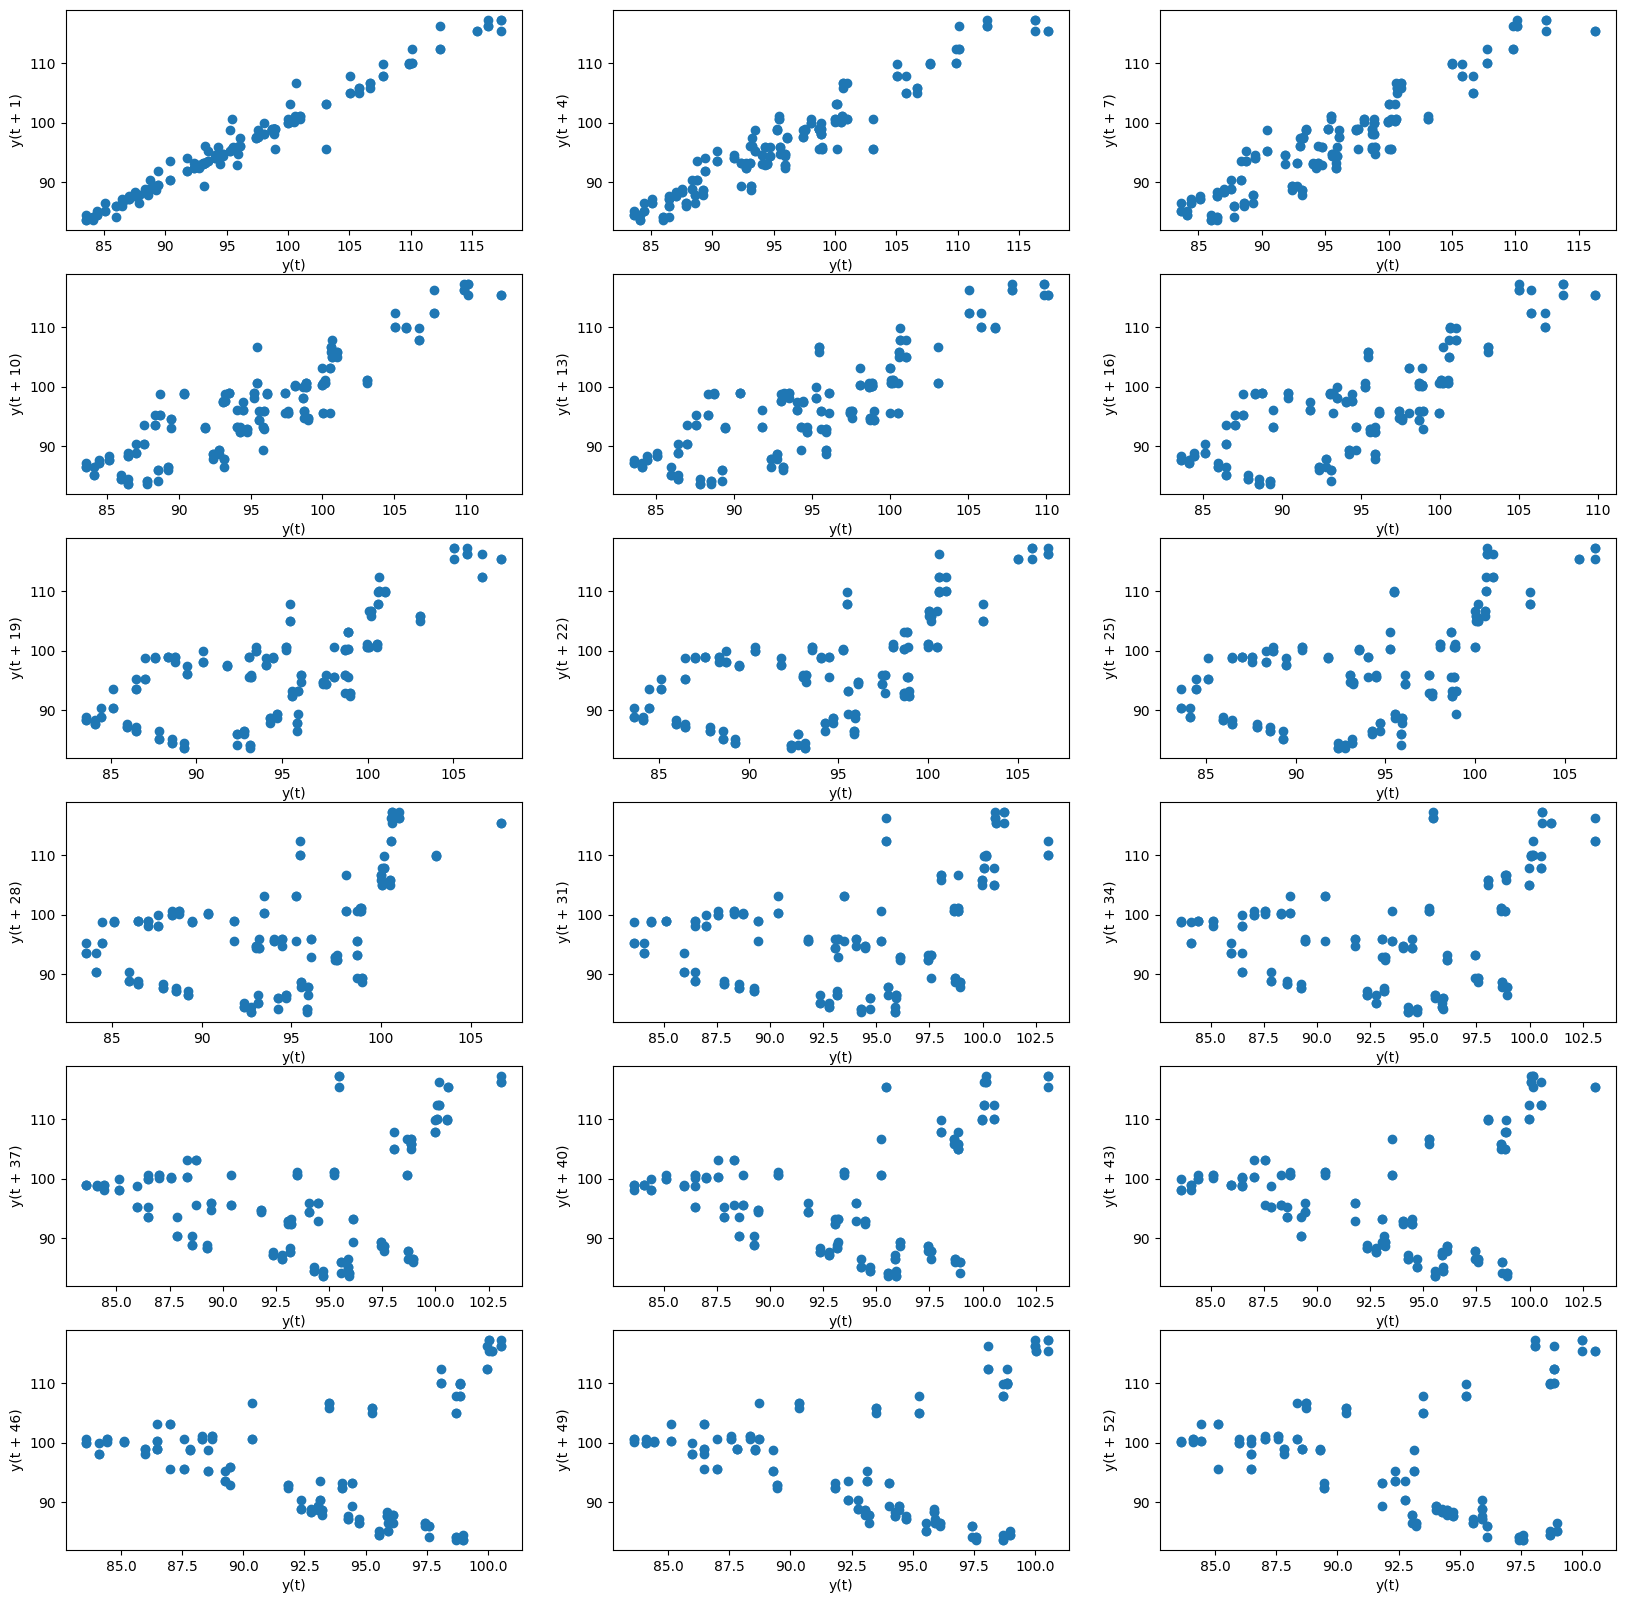

In [68]:
plot_pd_lag_plots(df, "reer", max_lag=60, lag_step=3)

- no seasonality, randomness

In [69]:
df.bilance

date
2009-01-01    -2.730
2009-02-01   -74.000
2009-03-01     9.819
2009-04-01     2.739
2009-05-01     2.499
               ...  
2023-05-01     9.370
2023-06-01    19.236
2023-07-01    -6.421
2023-08-01    -5.628
2023-09-01    11.874
Name: bilance, Length: 177, dtype: float64

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 2000x2000 with 0 Axes>

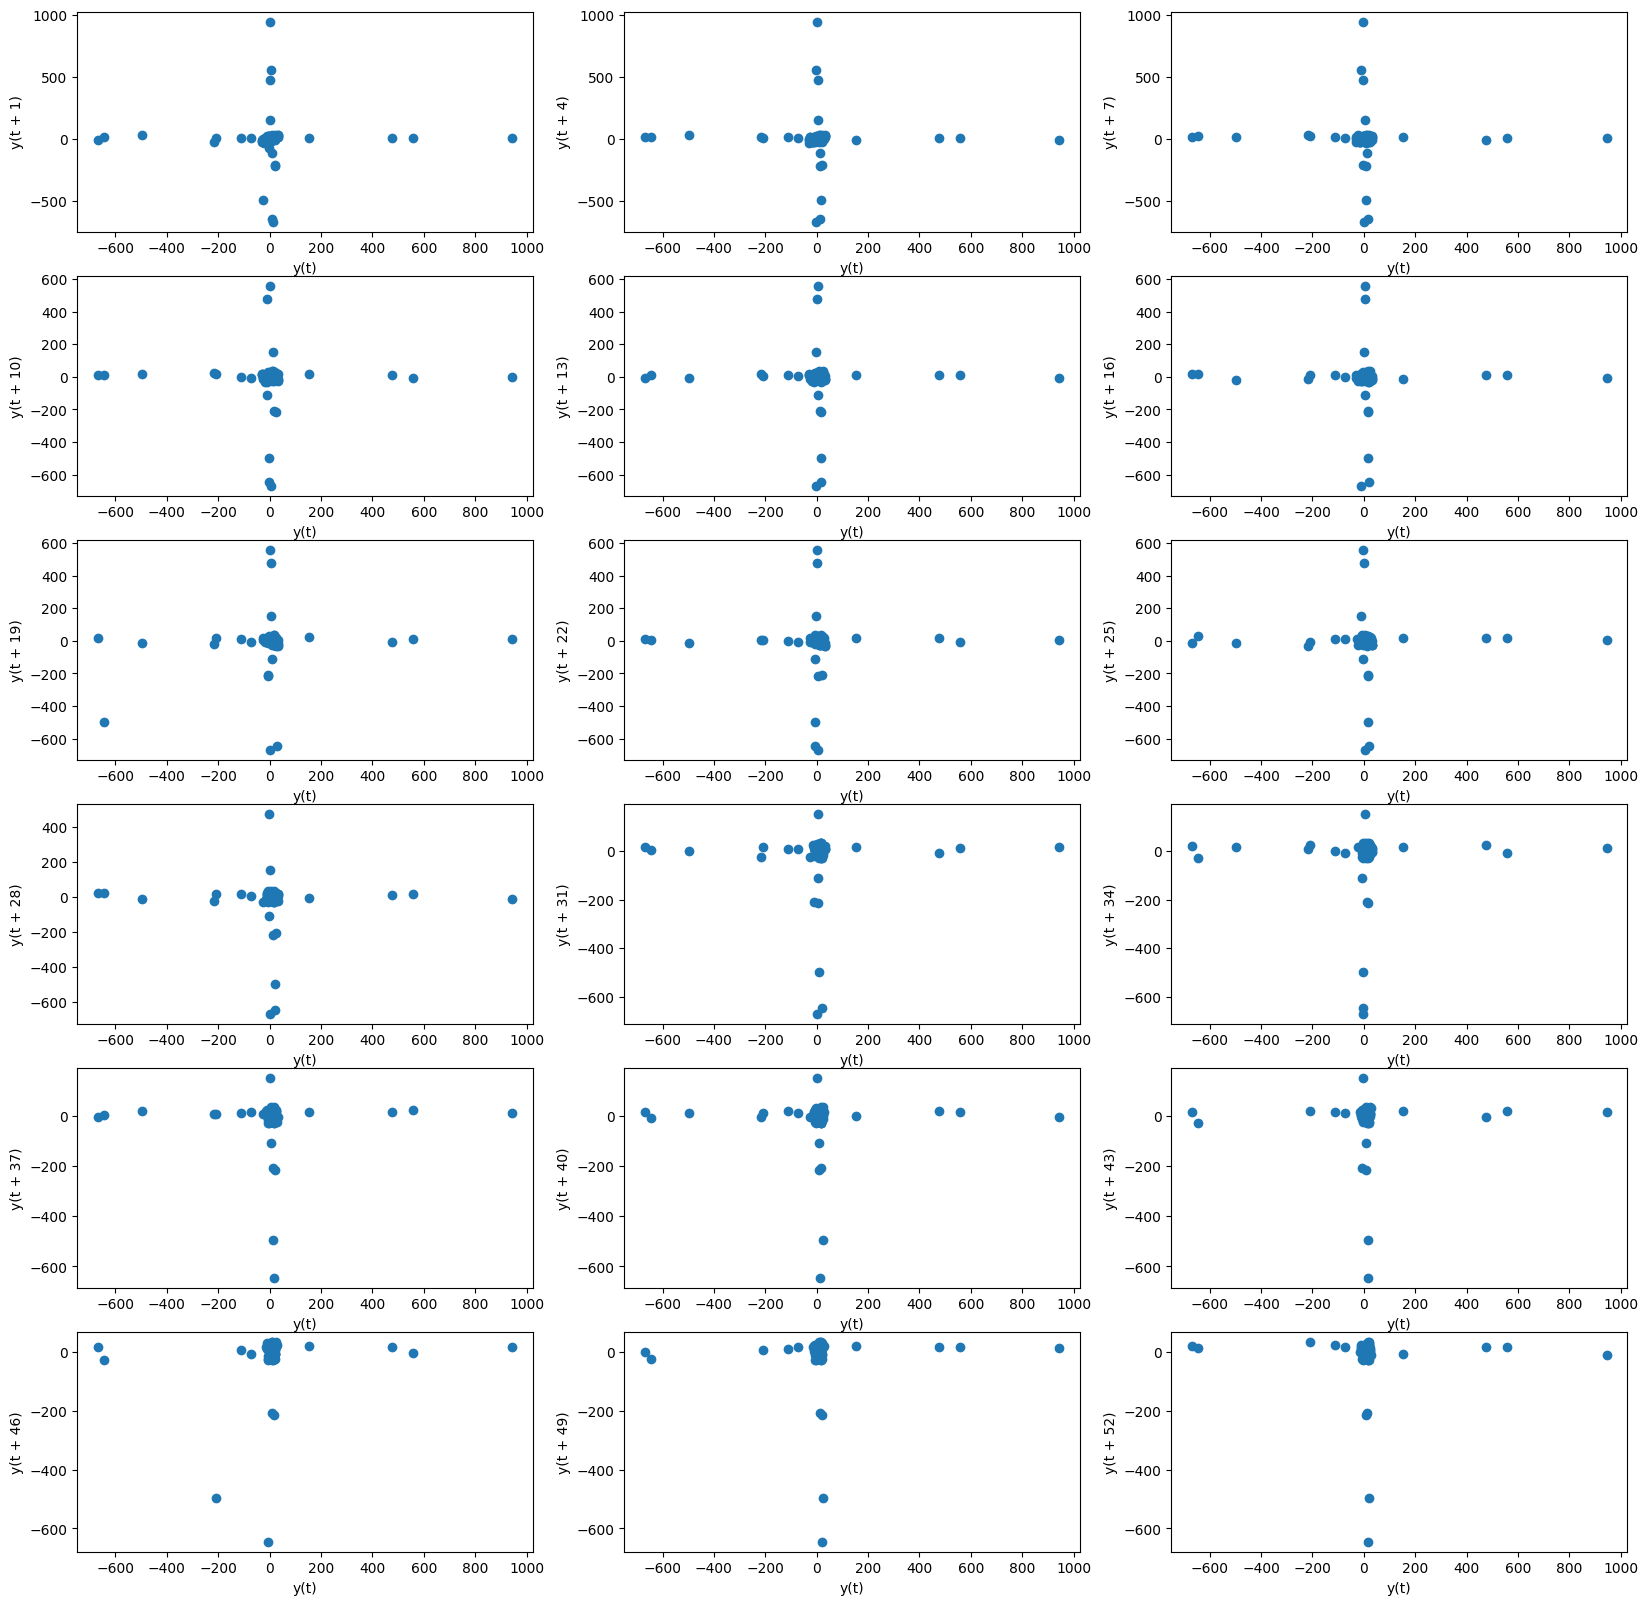

In [70]:
plot_pd_lag_plots(df, "bilance", max_lag=60, lag_step=3)

- strong outliers in bilance -> see time plots

<Figure size 2000x2000 with 0 Axes>

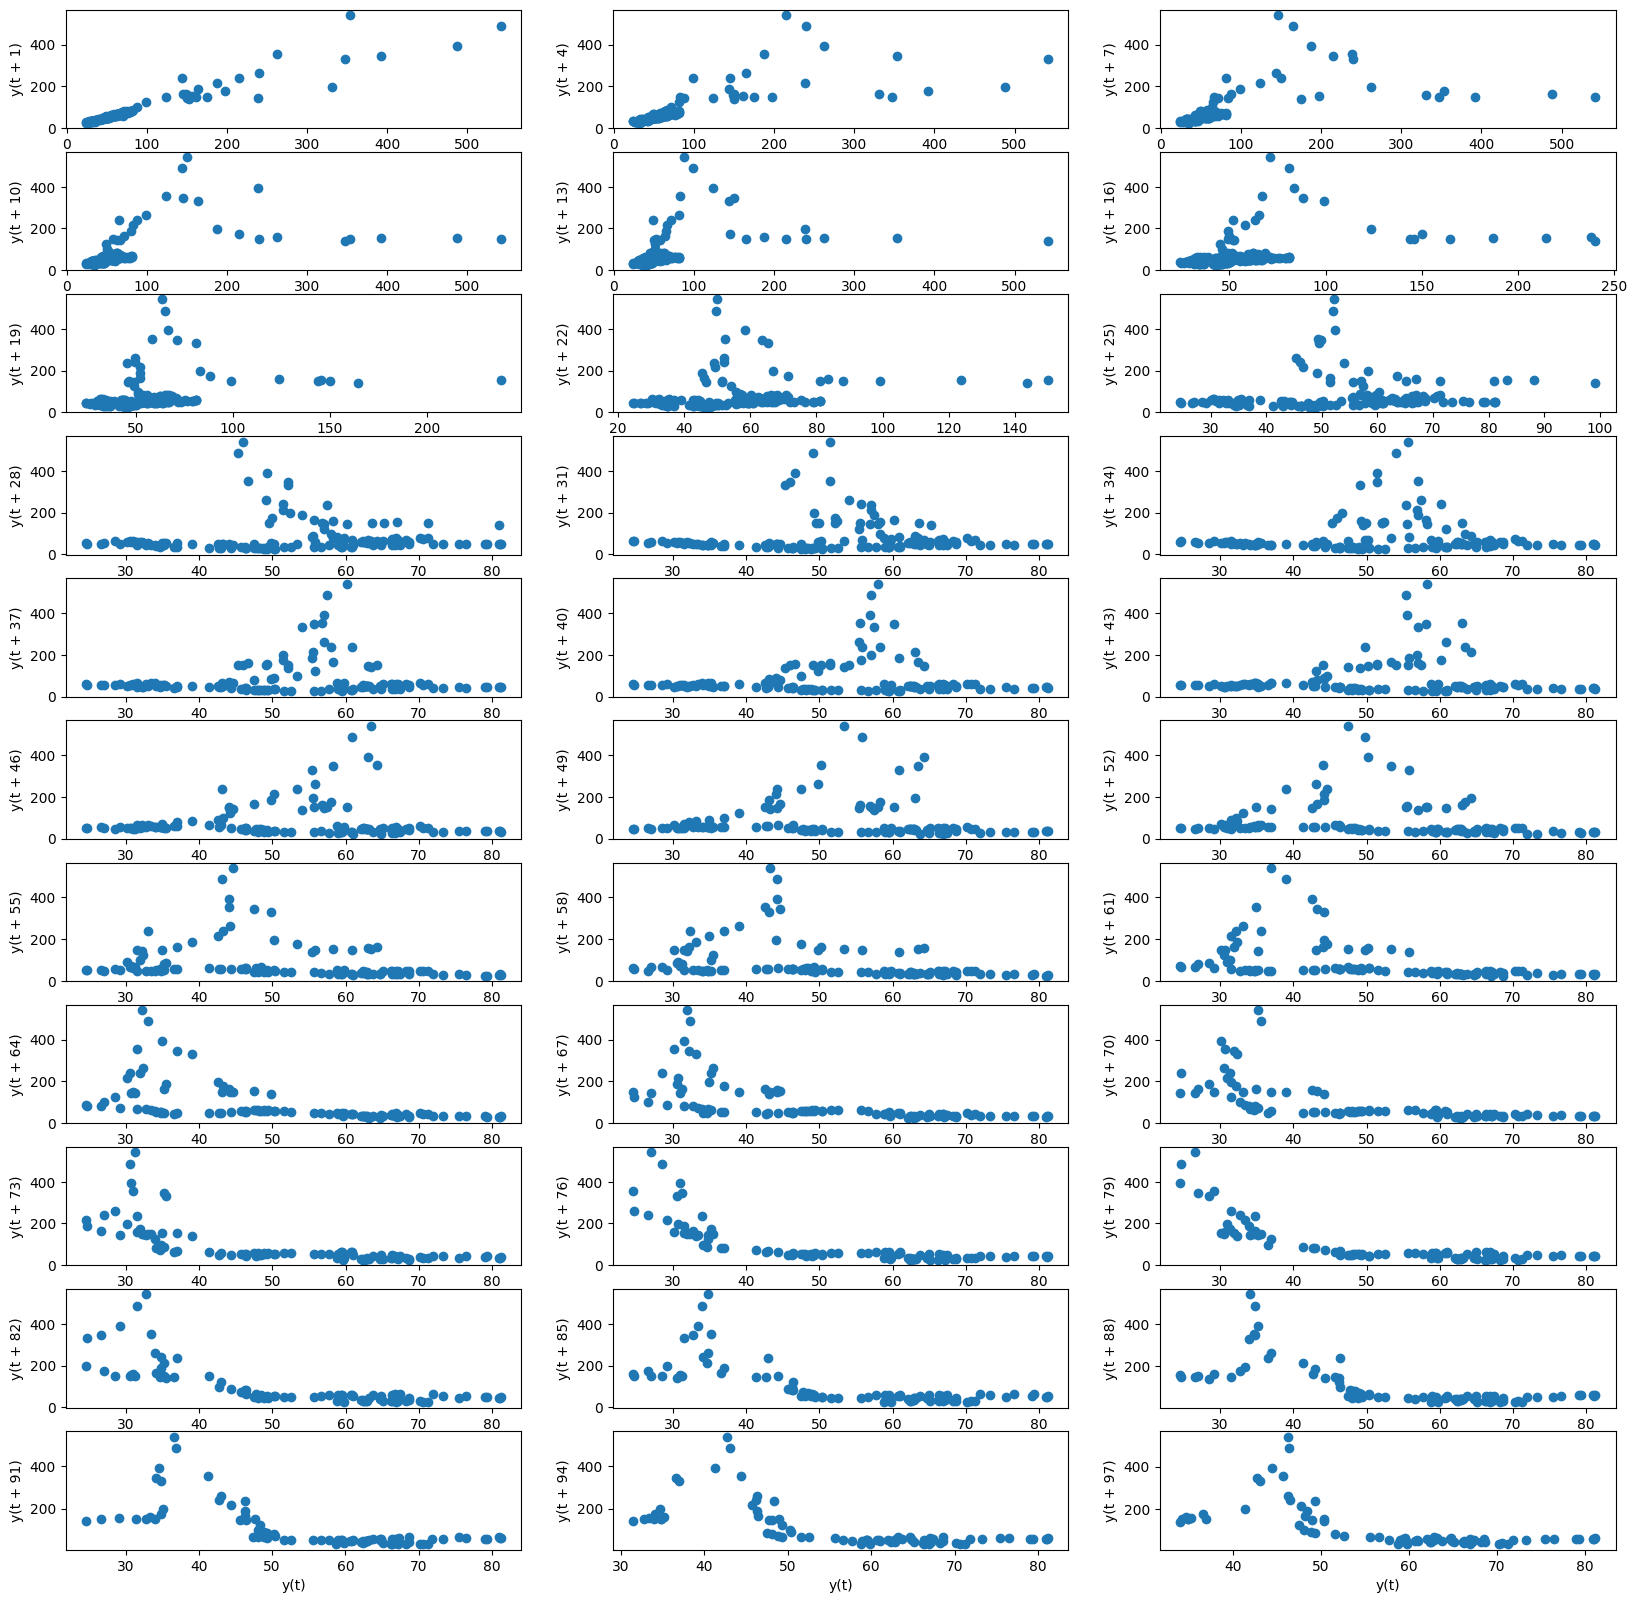

In [71]:
plot_pd_lag_plots(df, "avg_energy_price", max_lag=100, lag_step=3)

<Figure size 2000x2000 with 0 Axes>

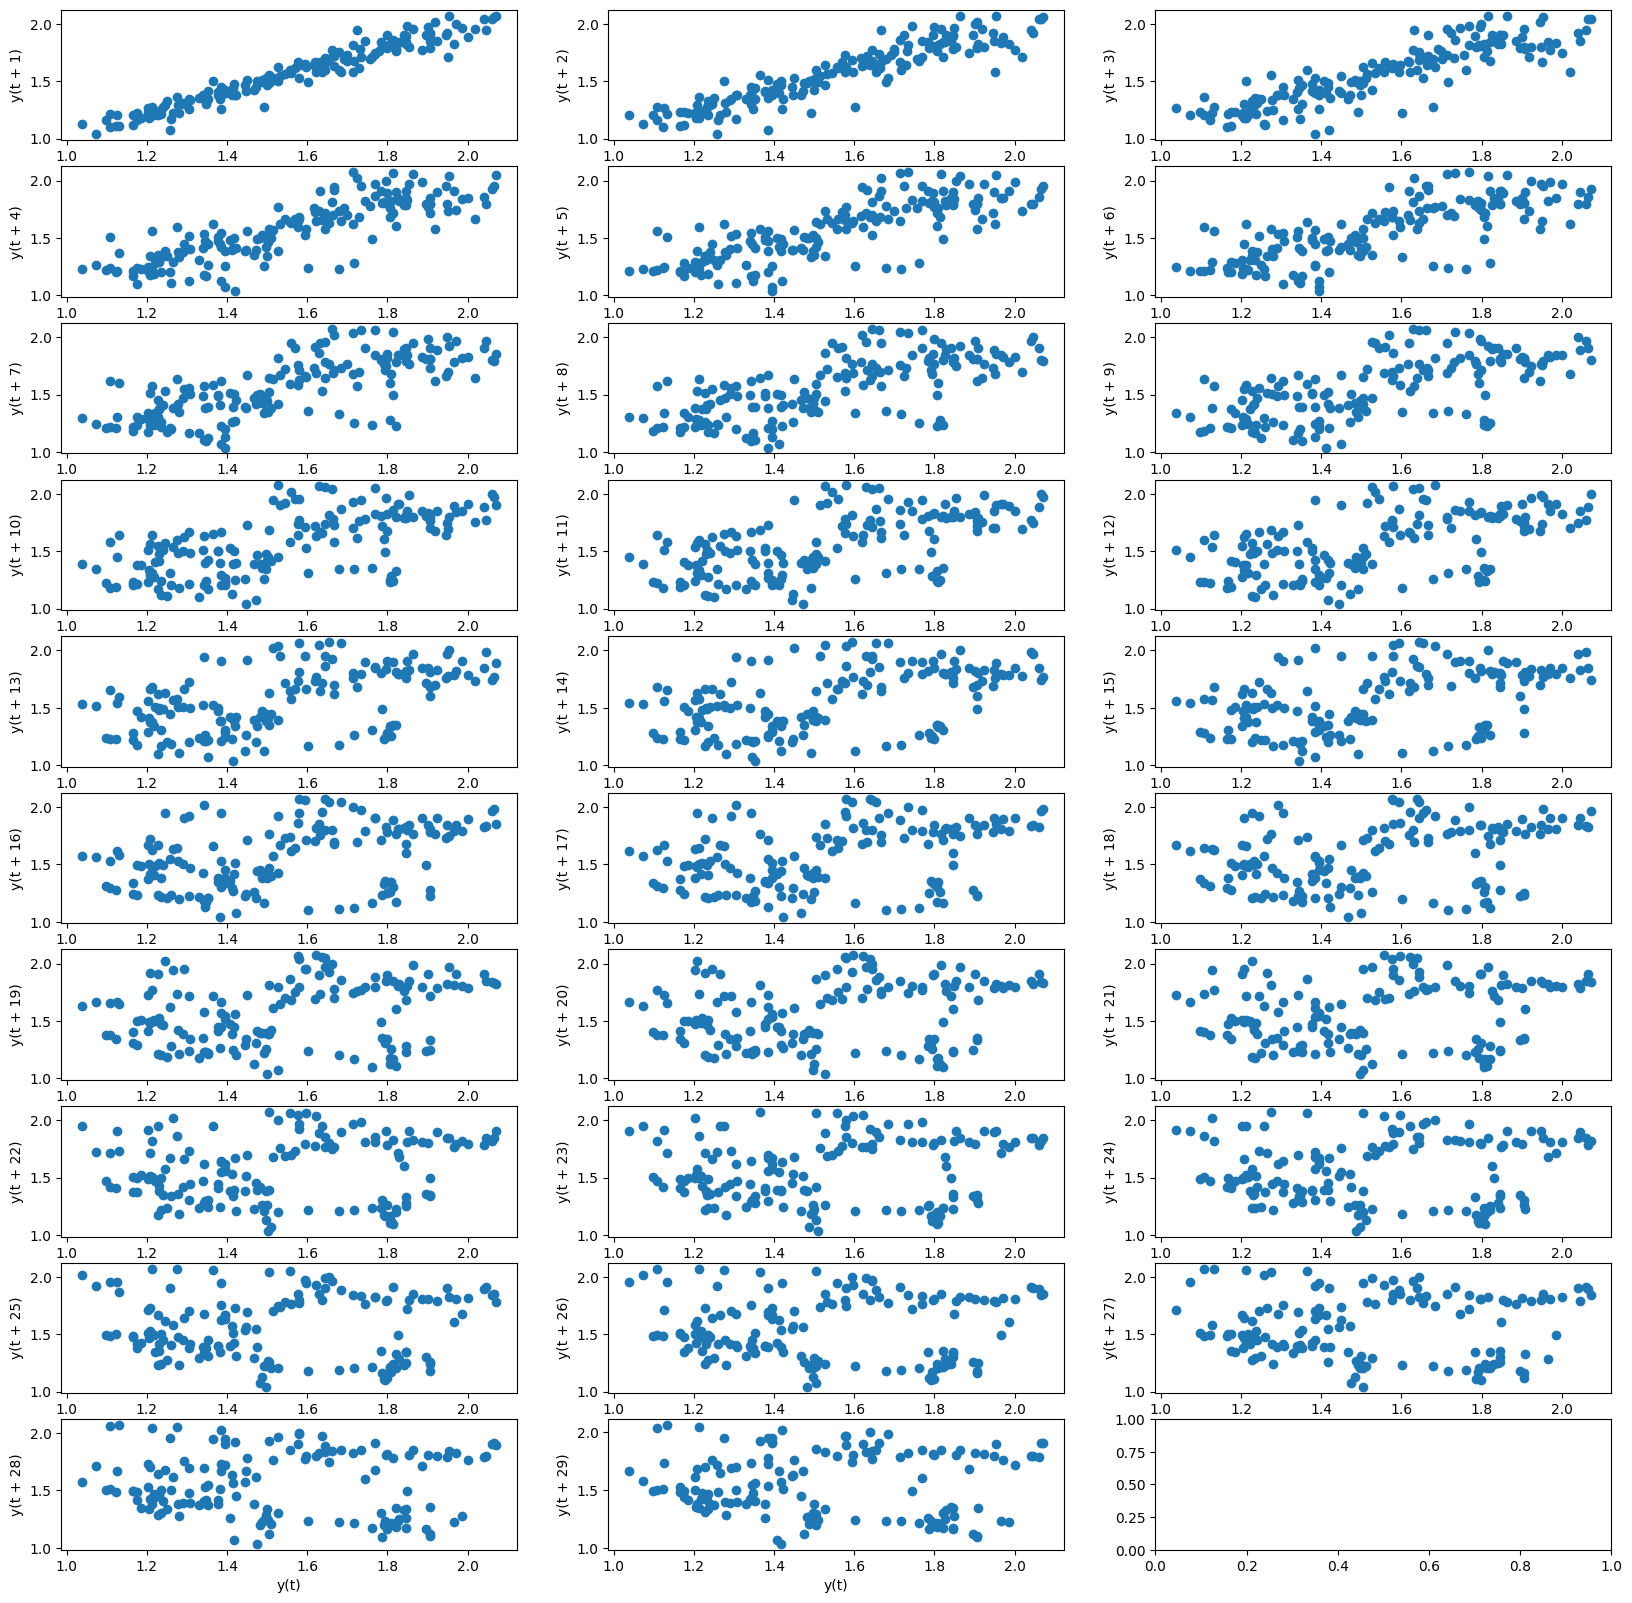

In [72]:
plot_pd_lag_plots(df, "avg_gasoline_price", max_lag=30, lag_step=1)

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 2000x2000 with 0 Axes>

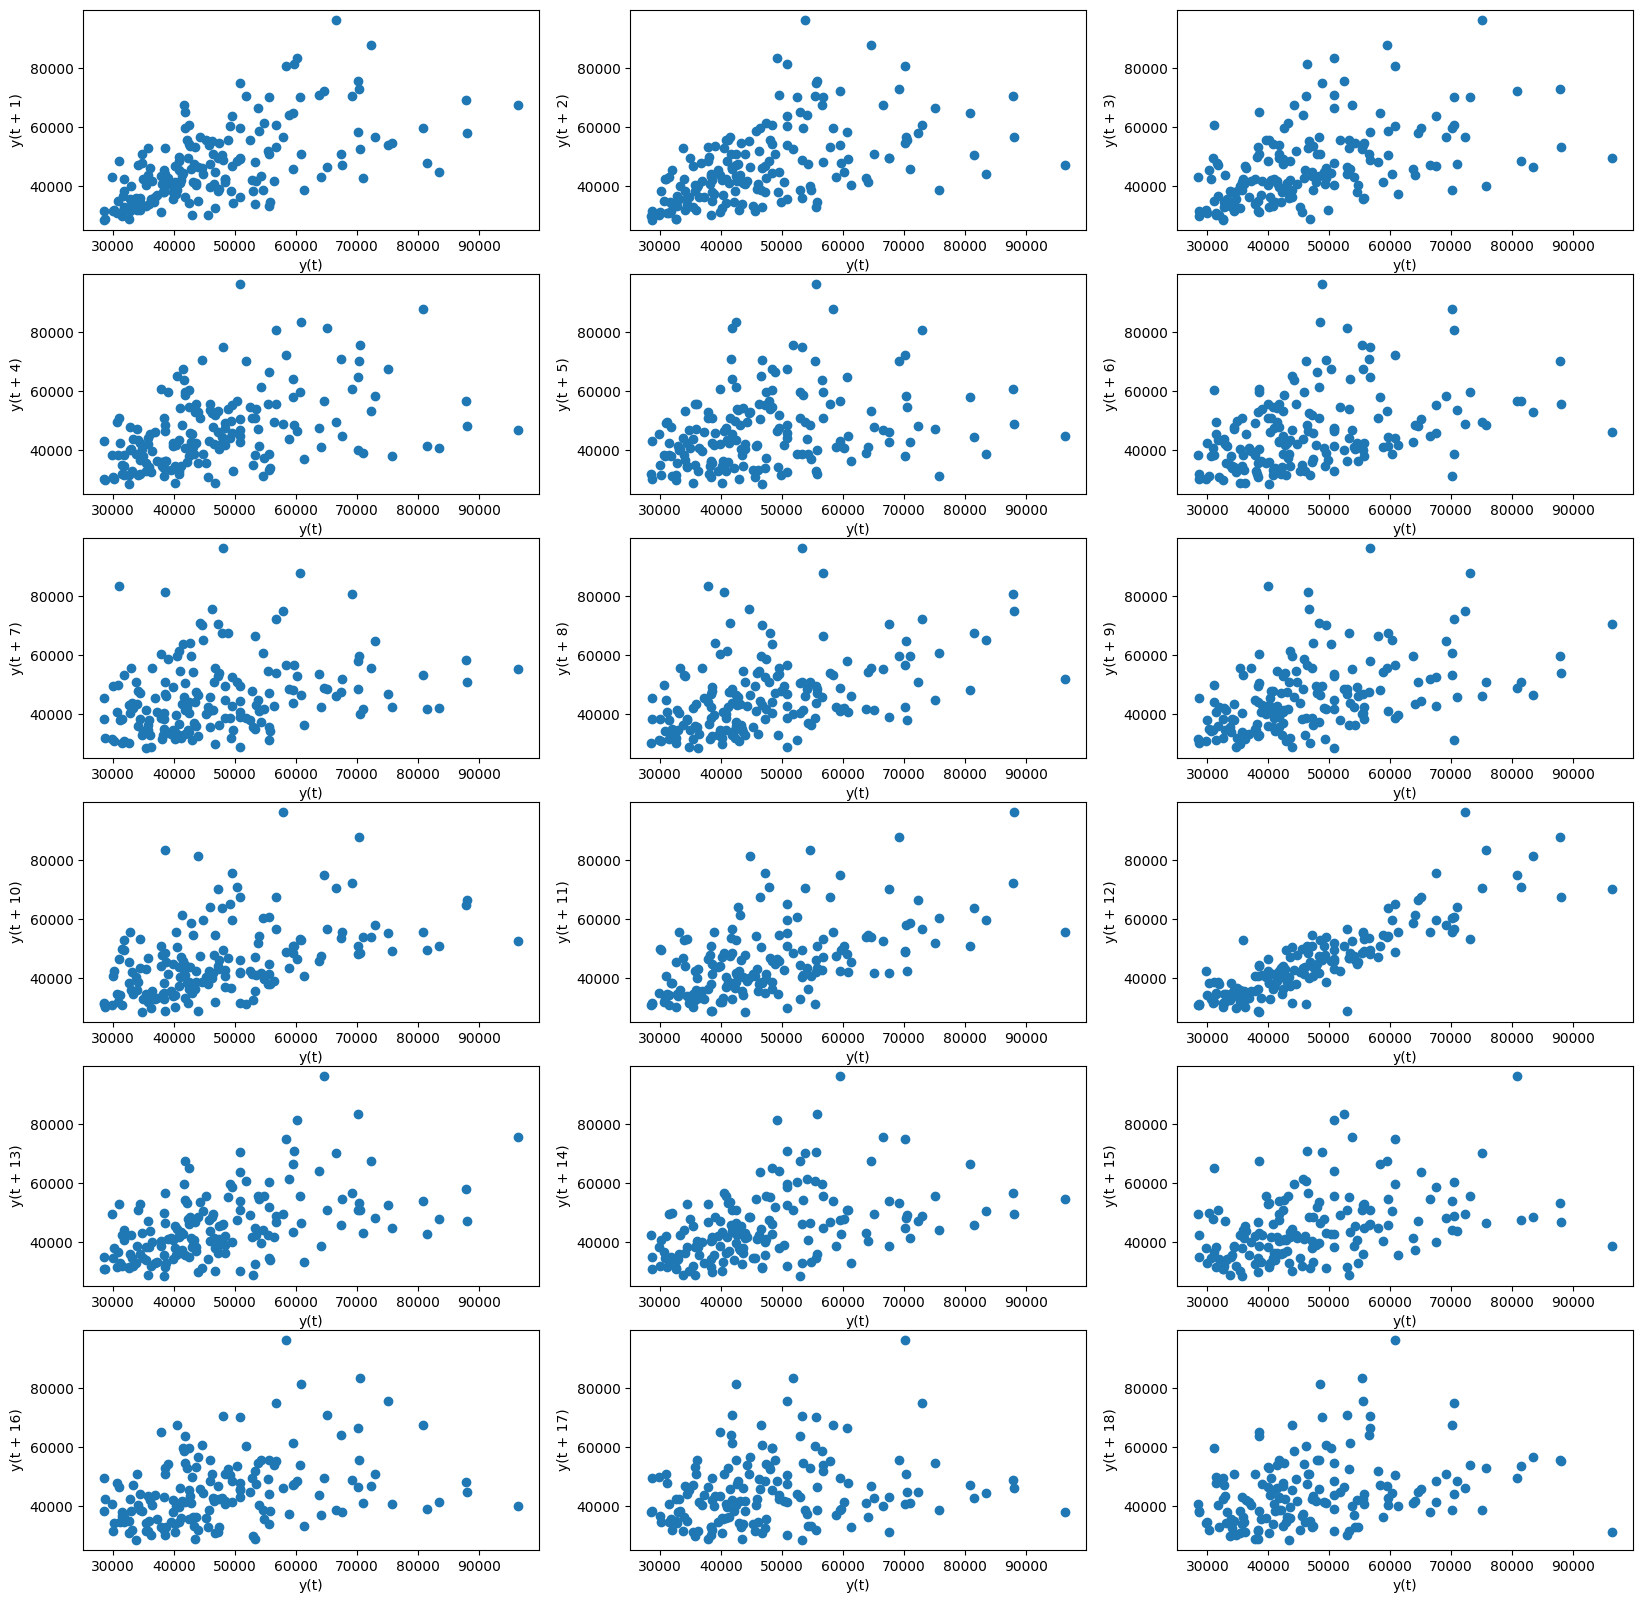

In [27]:
plot_pd_lag_plots(df, "noveHlaseniUchazeci", max_lag=20, lag_step=1)

- strong year seasonality!

<Figure size 2000x2000 with 0 Axes>

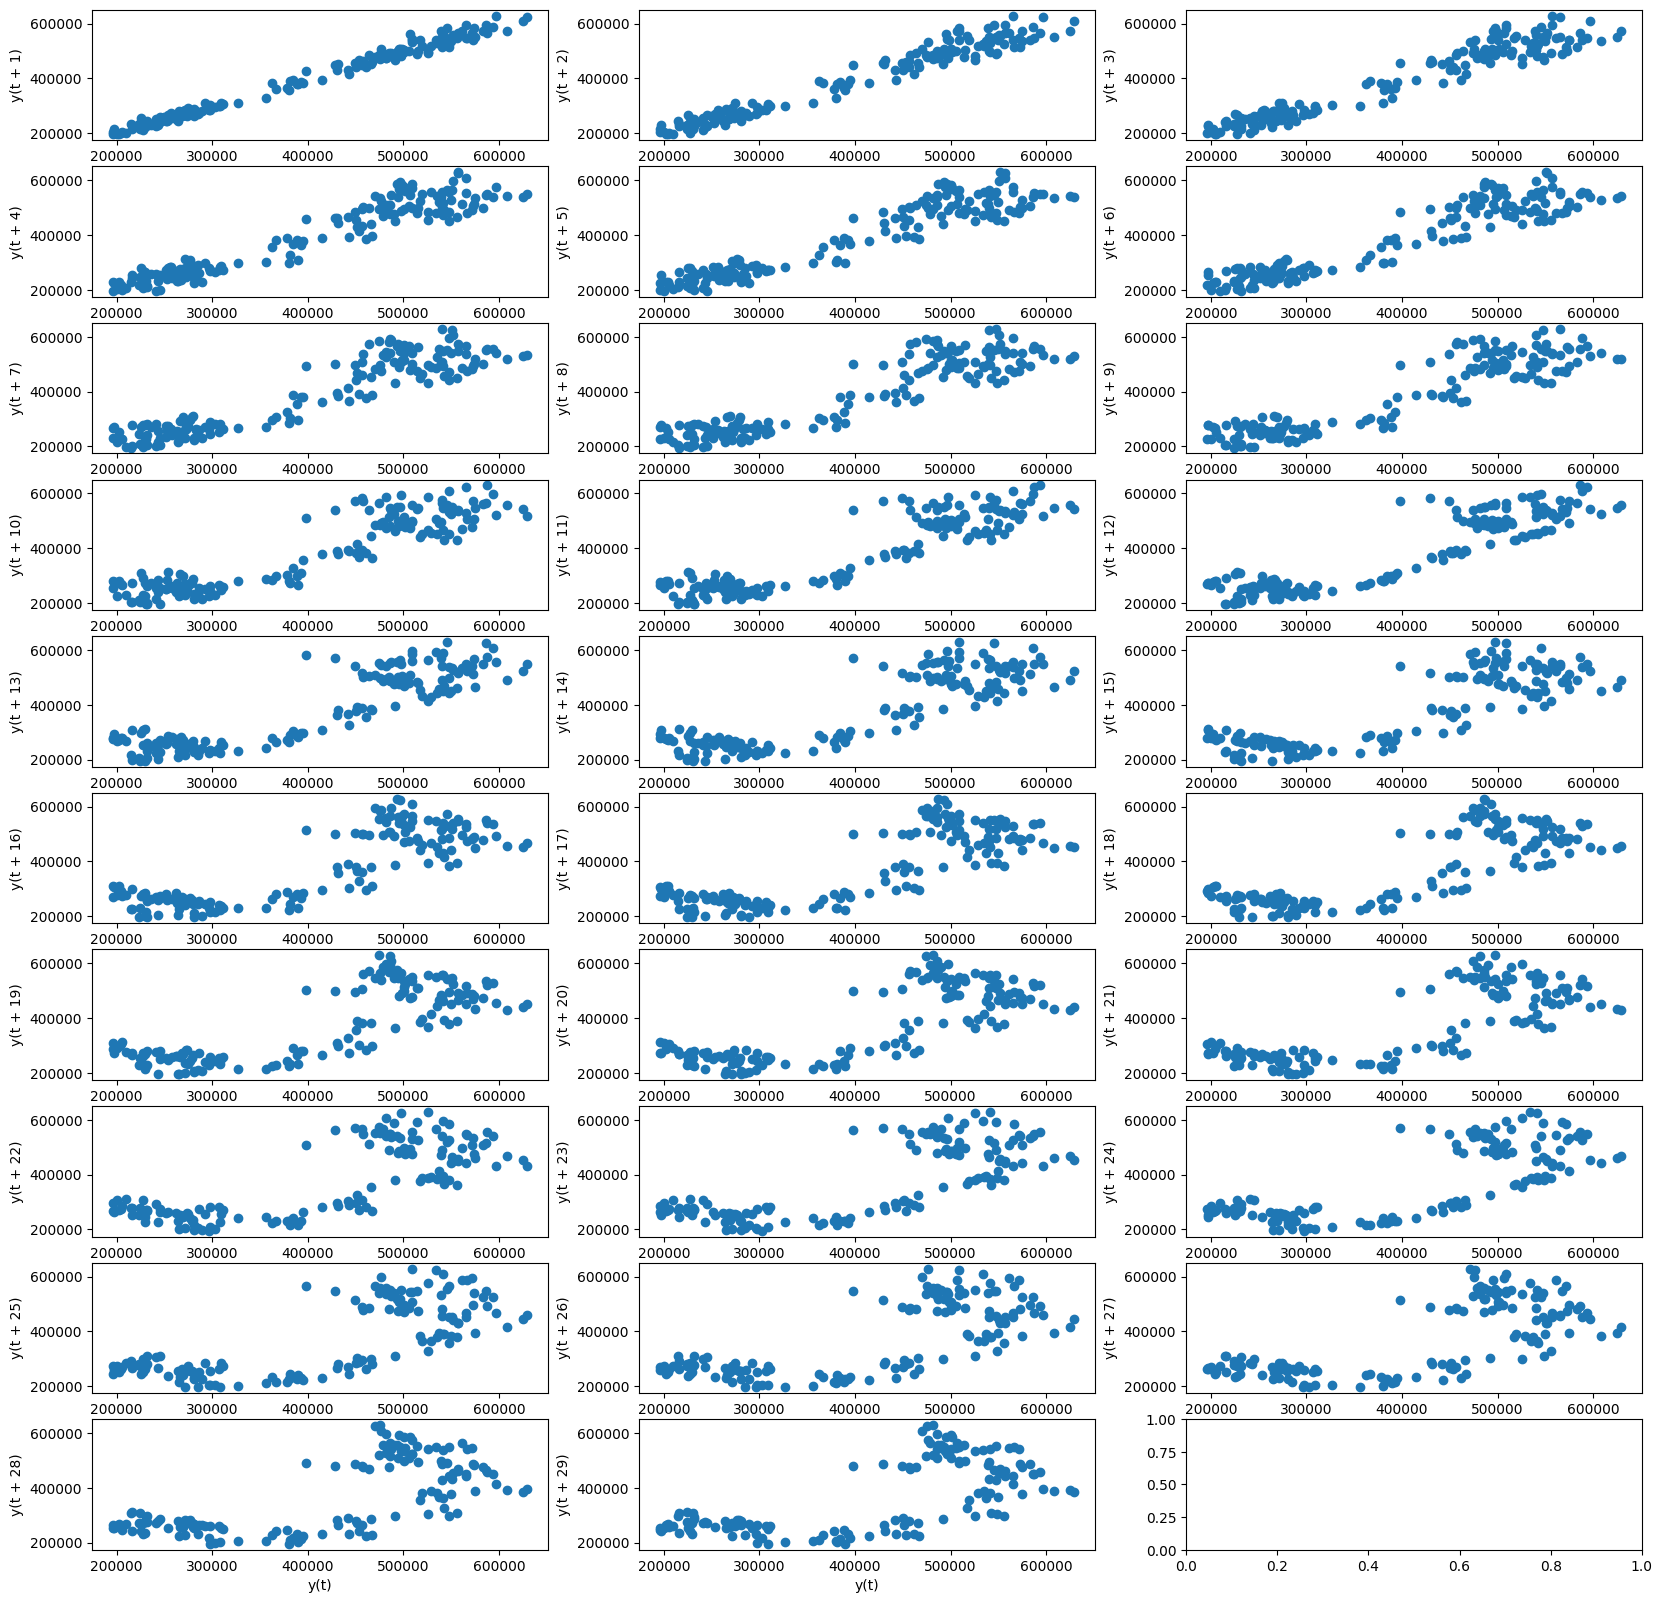

In [30]:
plot_pd_lag_plots(df, "uchazeciOZamestnaniUoZ", max_lag=30, lag_step=1)

In [ ]:
df.columns

Index(['month', 'year', 'avg_monthly_salary', 'monthly_min_wage',
       'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
       'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price',
       'z_do_65_w8', 'z_do_65_w4', 'celkem_w13', 'celkem_w18', 'm_do_65_w11',
       'celkem_w7', 'm_do_65_w5', 'celkem_w17', 'celkem_w12',
       'noveHlaseniUchazeci', 'celkem_w19', 'uchazeciOZamestnaniUoZ',
       'celkem_w16', 'z_do_65_w15', 'z_do_65_w5', 'celkem_w3', 'm_do_65_w10',
       'z_do_65_w2', 'z_do_65_w17', 'obsazenaAZrusenaVPM', 'celkem_w4',
       'celkem_w14', 'z_do_65_w6', 'z_do_65_w11', 'z_do_65_w12',
       'absolventiSkolAMladistvi', 'noveHlasenaAUvolnenaVPM', 'm_do_65_w18',
       'z_do_65_w10', 'm_do_65_w12', 'celkem_w9', 'celkem_w11', 'm_do_65_w2',
       'm_do_65', 'break_in_thefts', 'celkem_w5', 'm_do_65_w4', 'm_do_65_w19',
       'celkem_w10', 'm_do_65_w15', 'z_do_65_w9', 'm_do_65_w7',
       'general_thefts', 'z_do_65', 'm_do_65_w6', 'z_do_65_w19', 'celke

<Figure size 2000x2000 with 0 Axes>

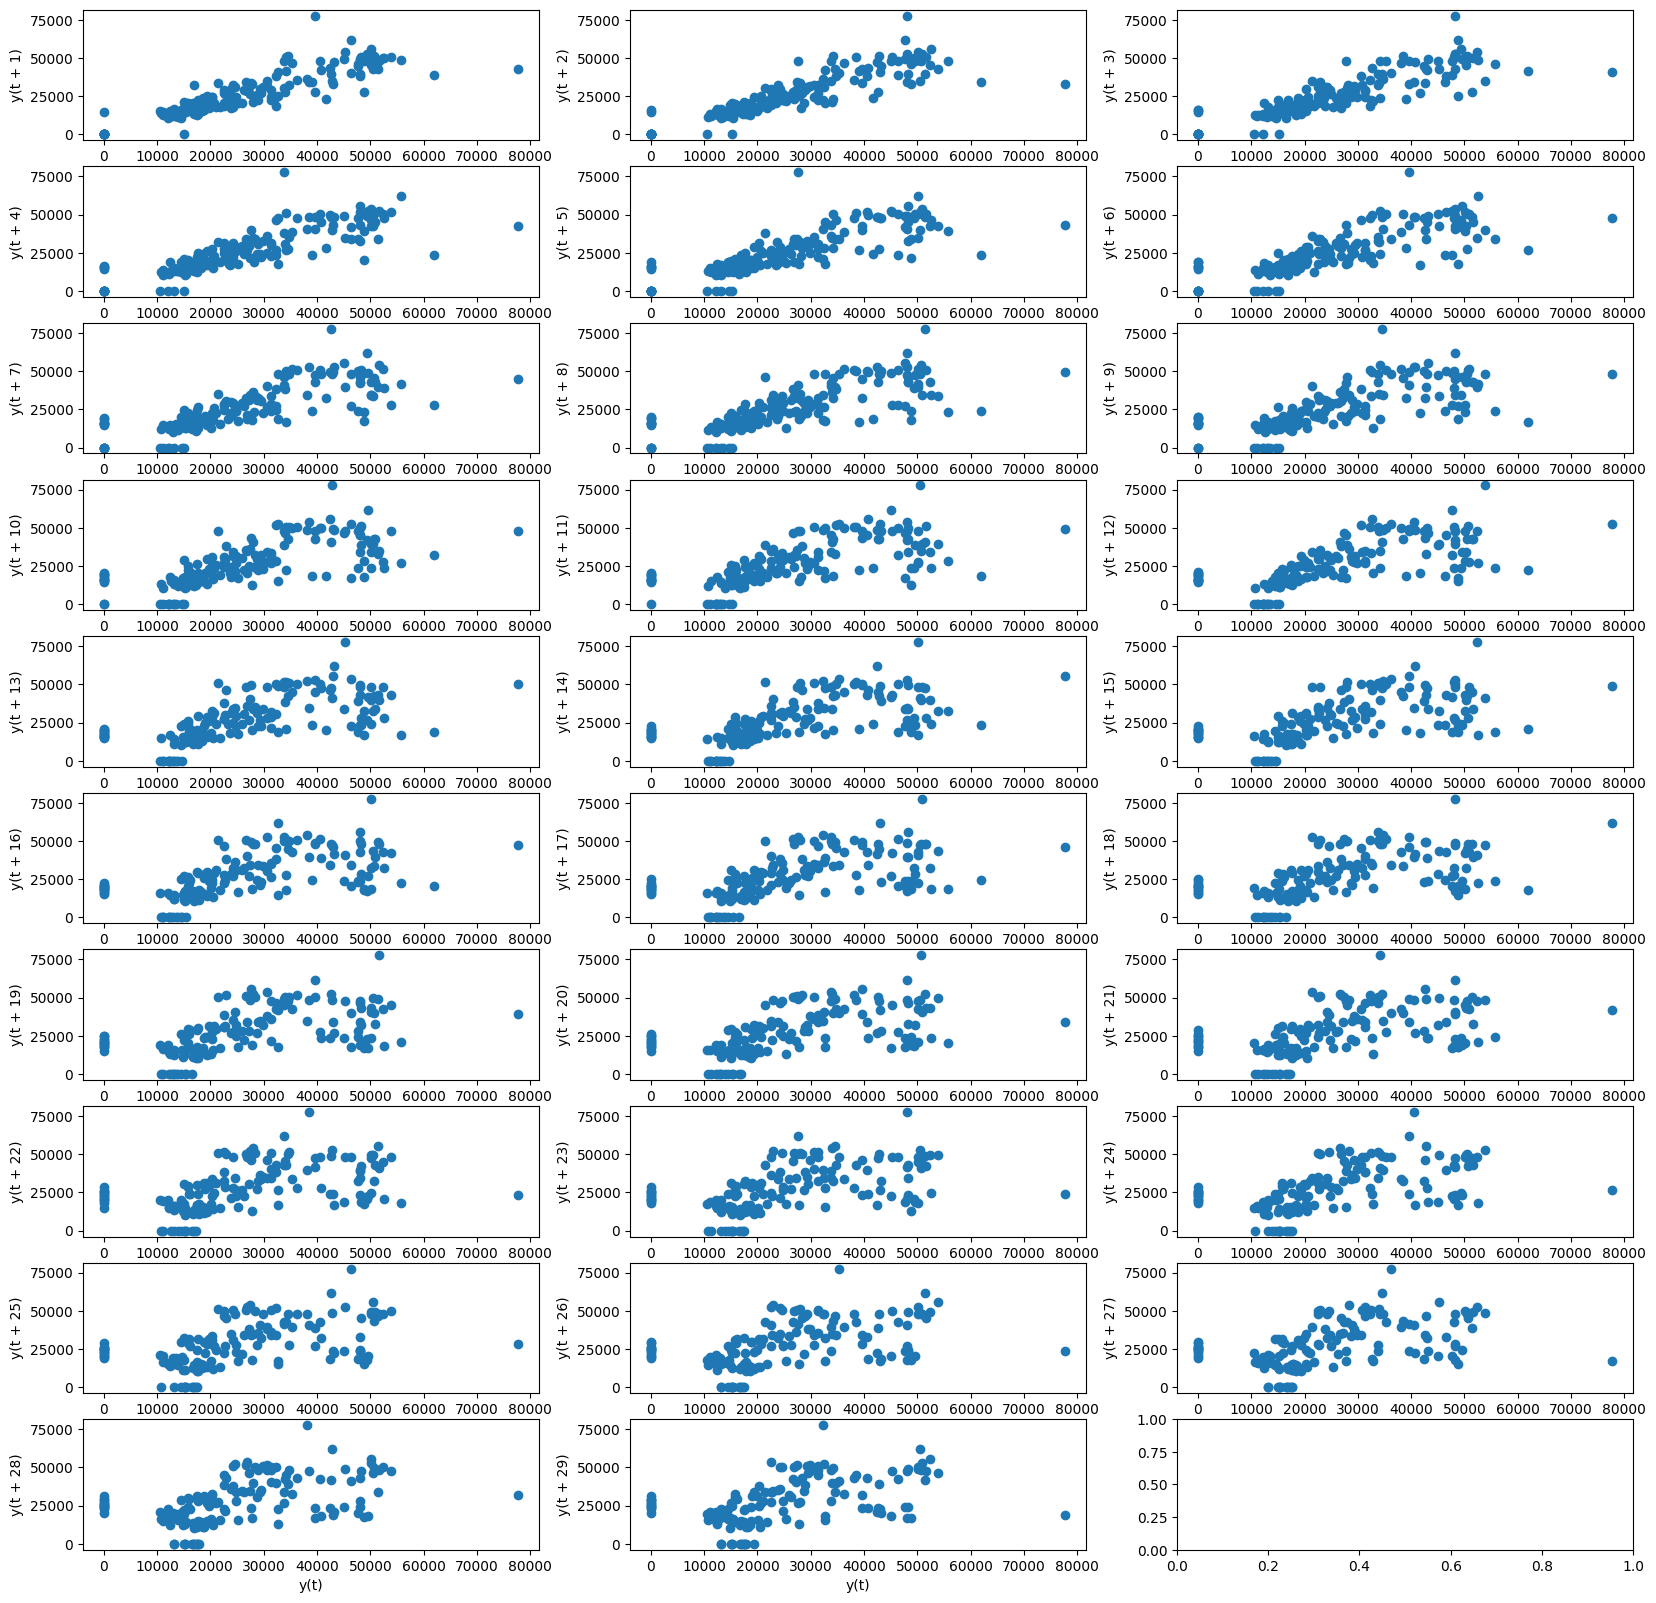

In [75]:
plot_pd_lag_plots(df, "obsazenaAZrusenaVPM", max_lag=30, lag_step=1)

<Figure size 2000x2000 with 0 Axes>

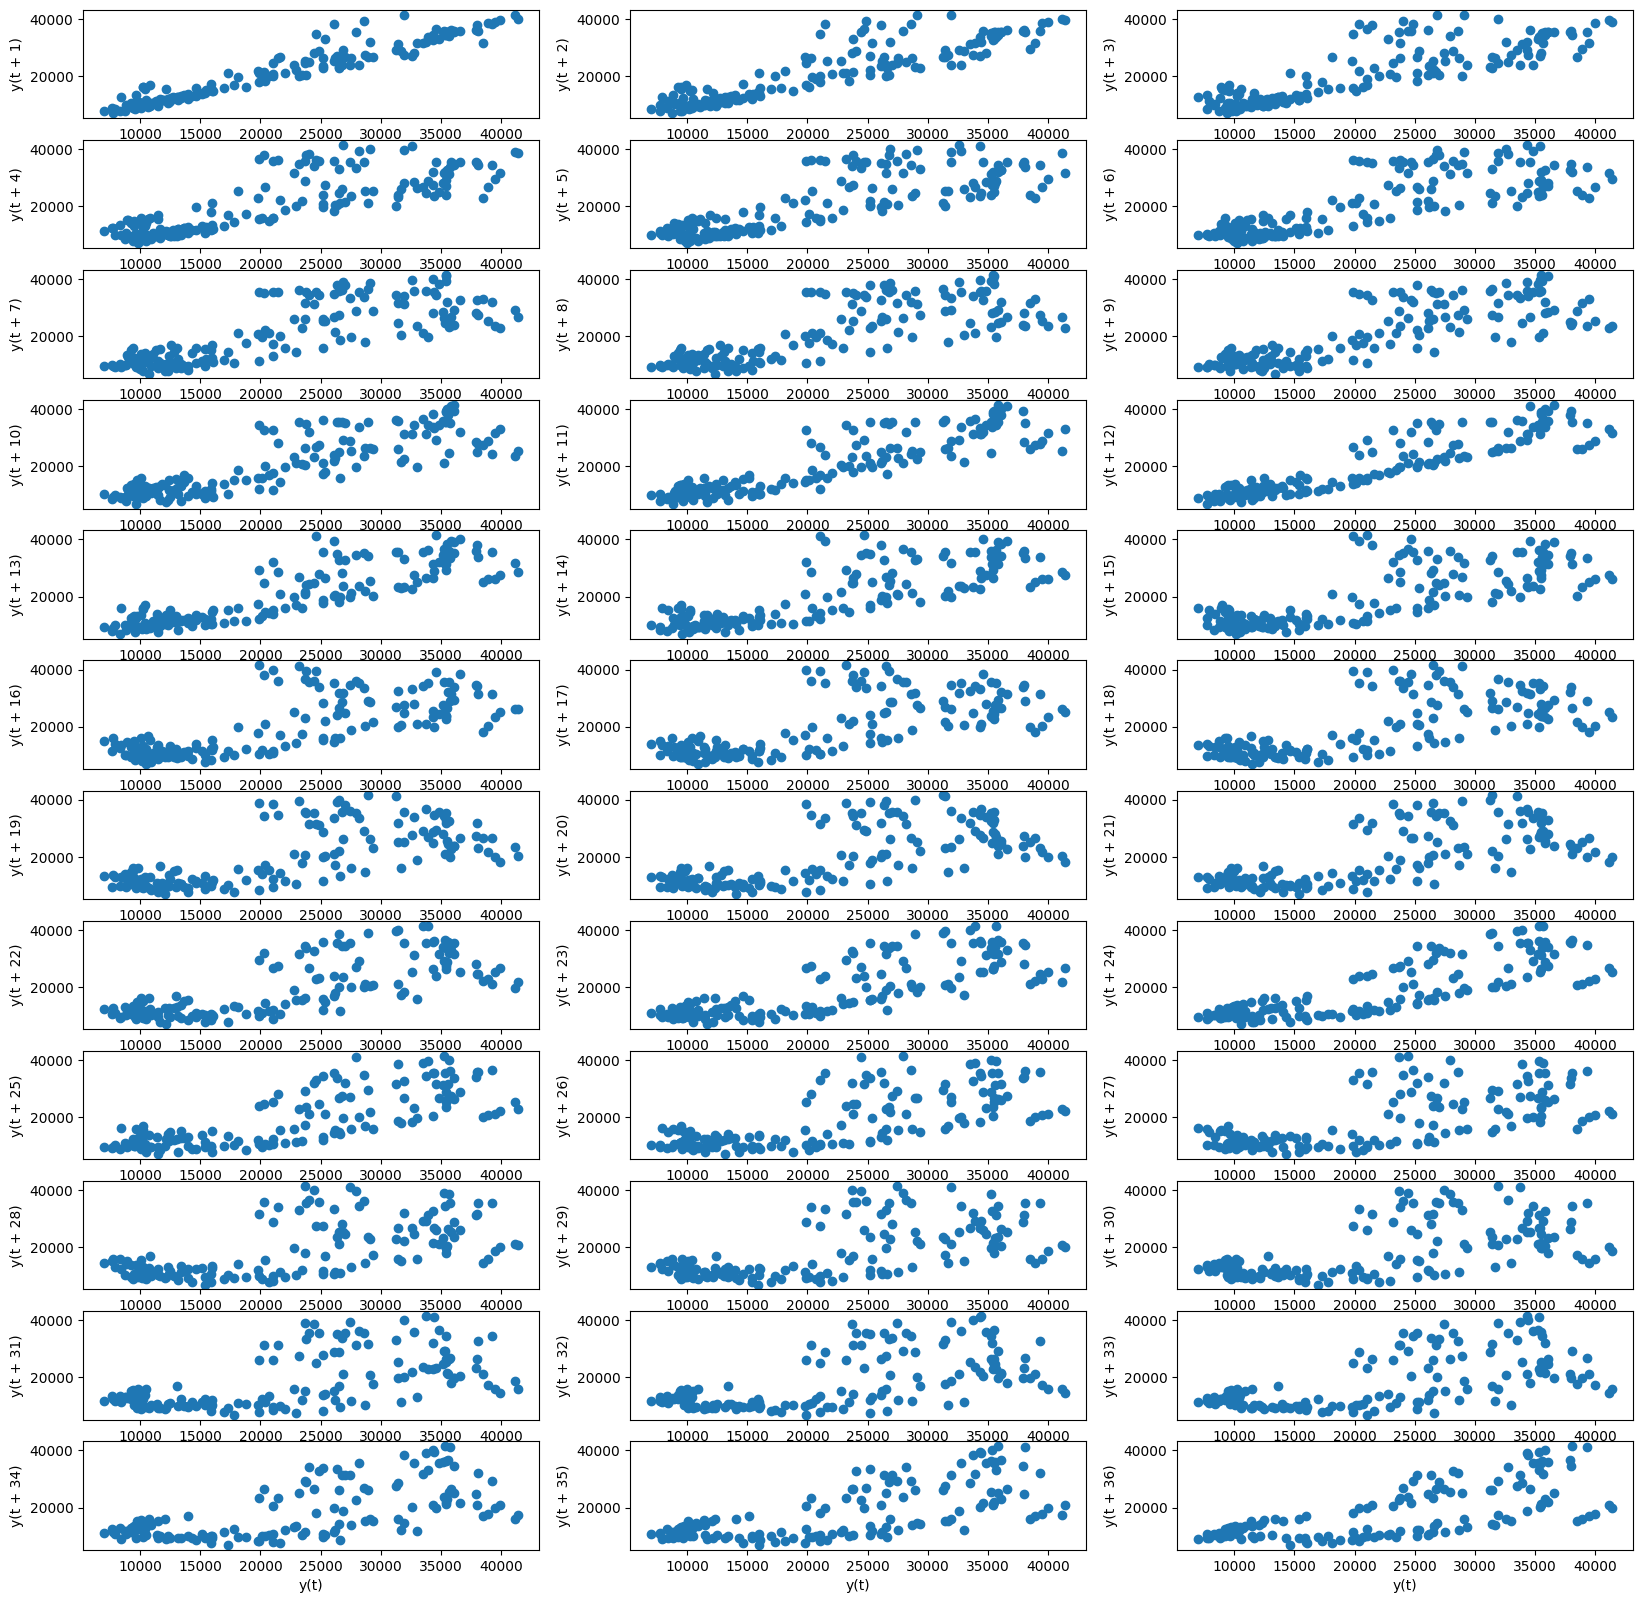

In [76]:
plot_pd_lag_plots(df, "absolventiSkolAMladistvi", max_lag=37, lag_step=1)

- weak seasonality - see time plots

<Figure size 2000x2000 with 0 Axes>

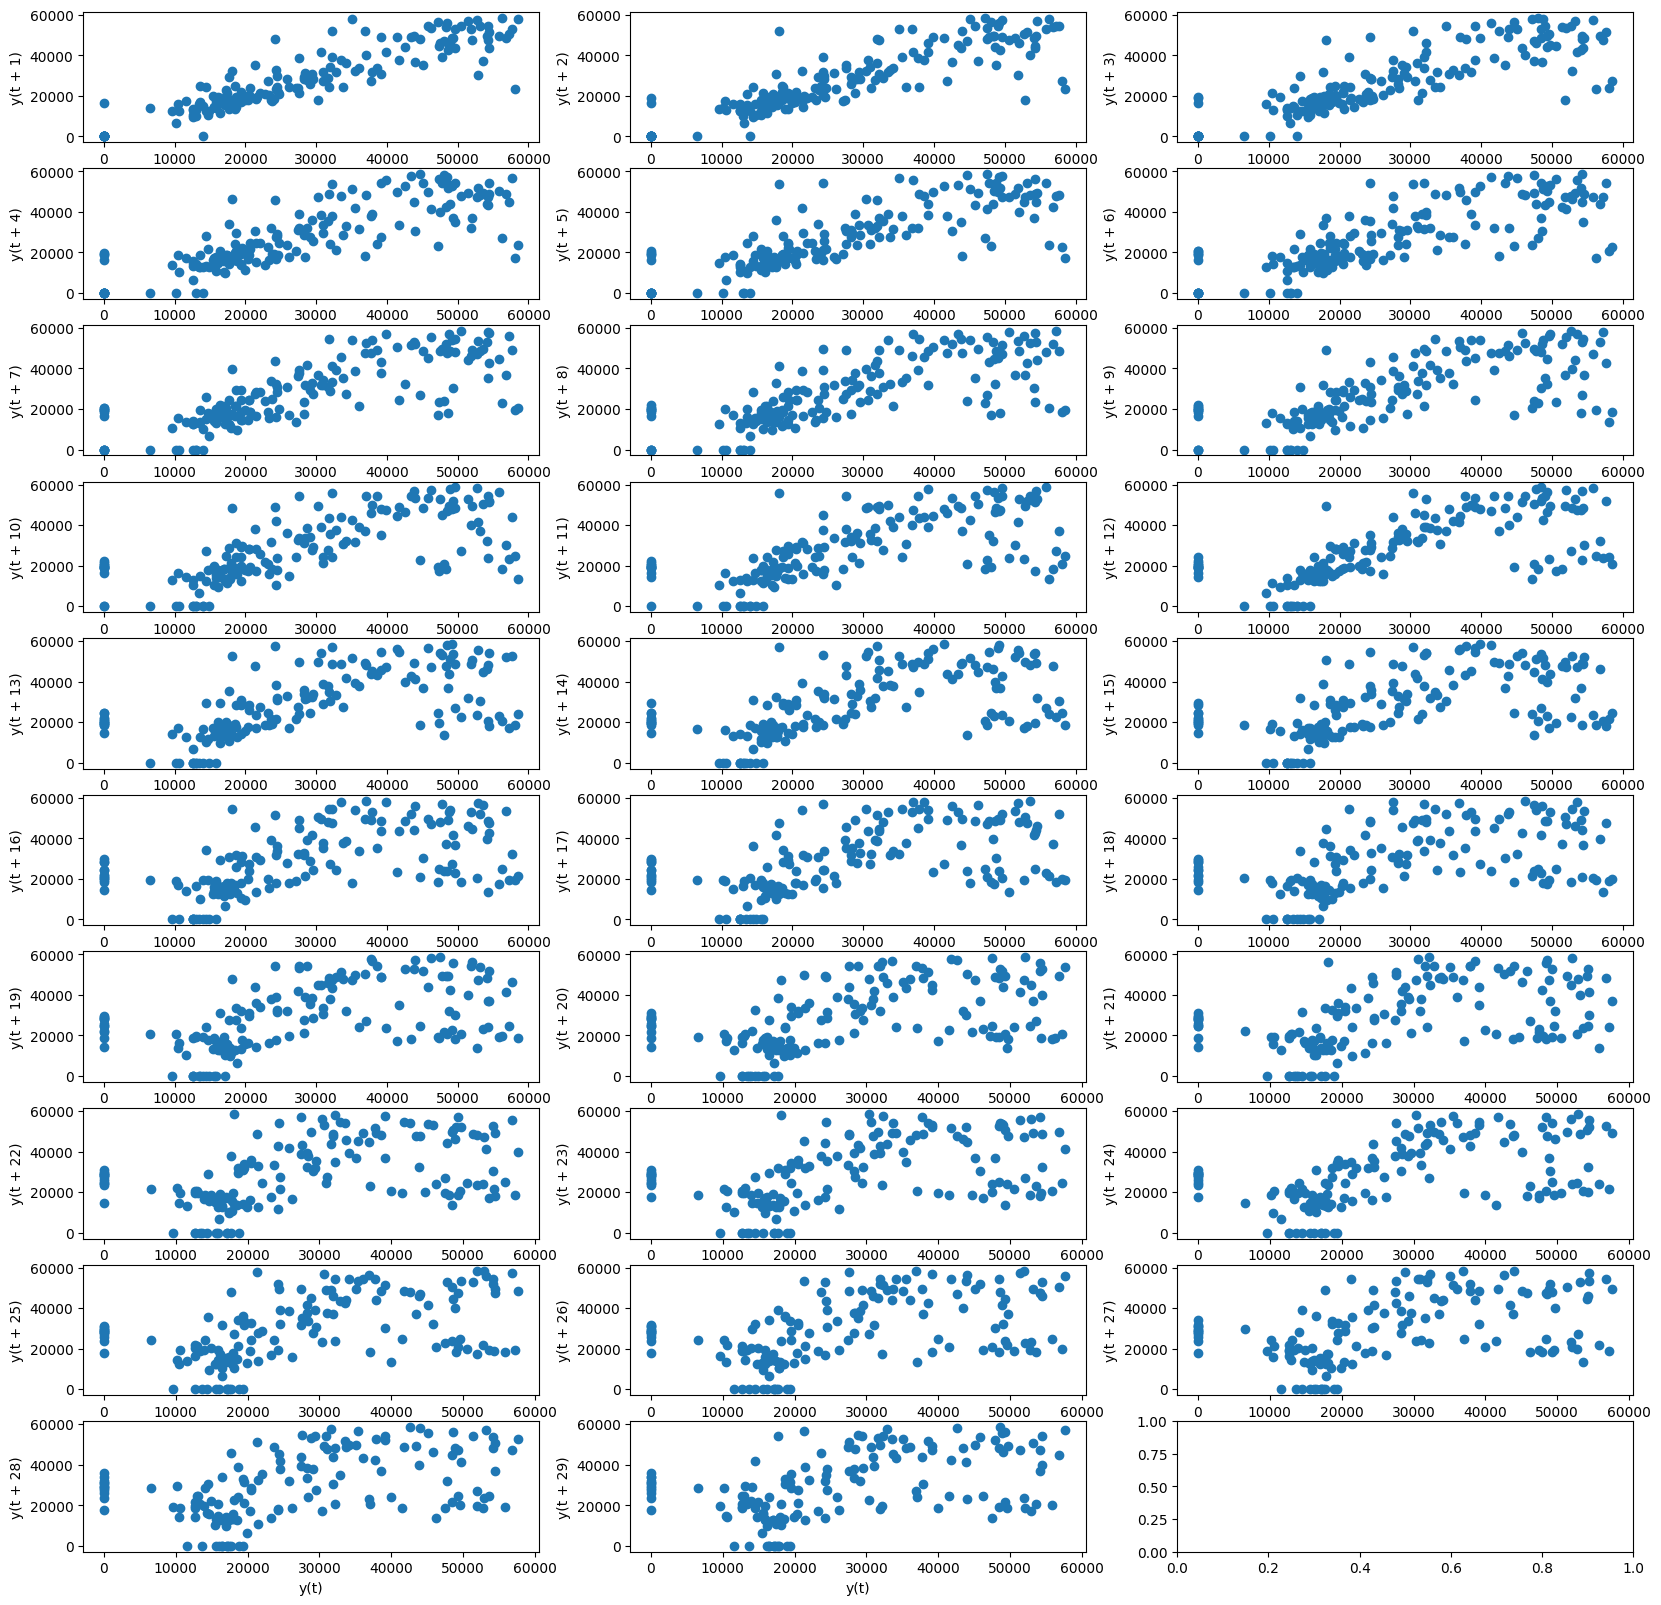

In [77]:
plot_pd_lag_plots(df, "noveHlasenaAUvolnenaVPM", max_lag=30, lag_step=1)

<Figure size 2000x2000 with 0 Axes>

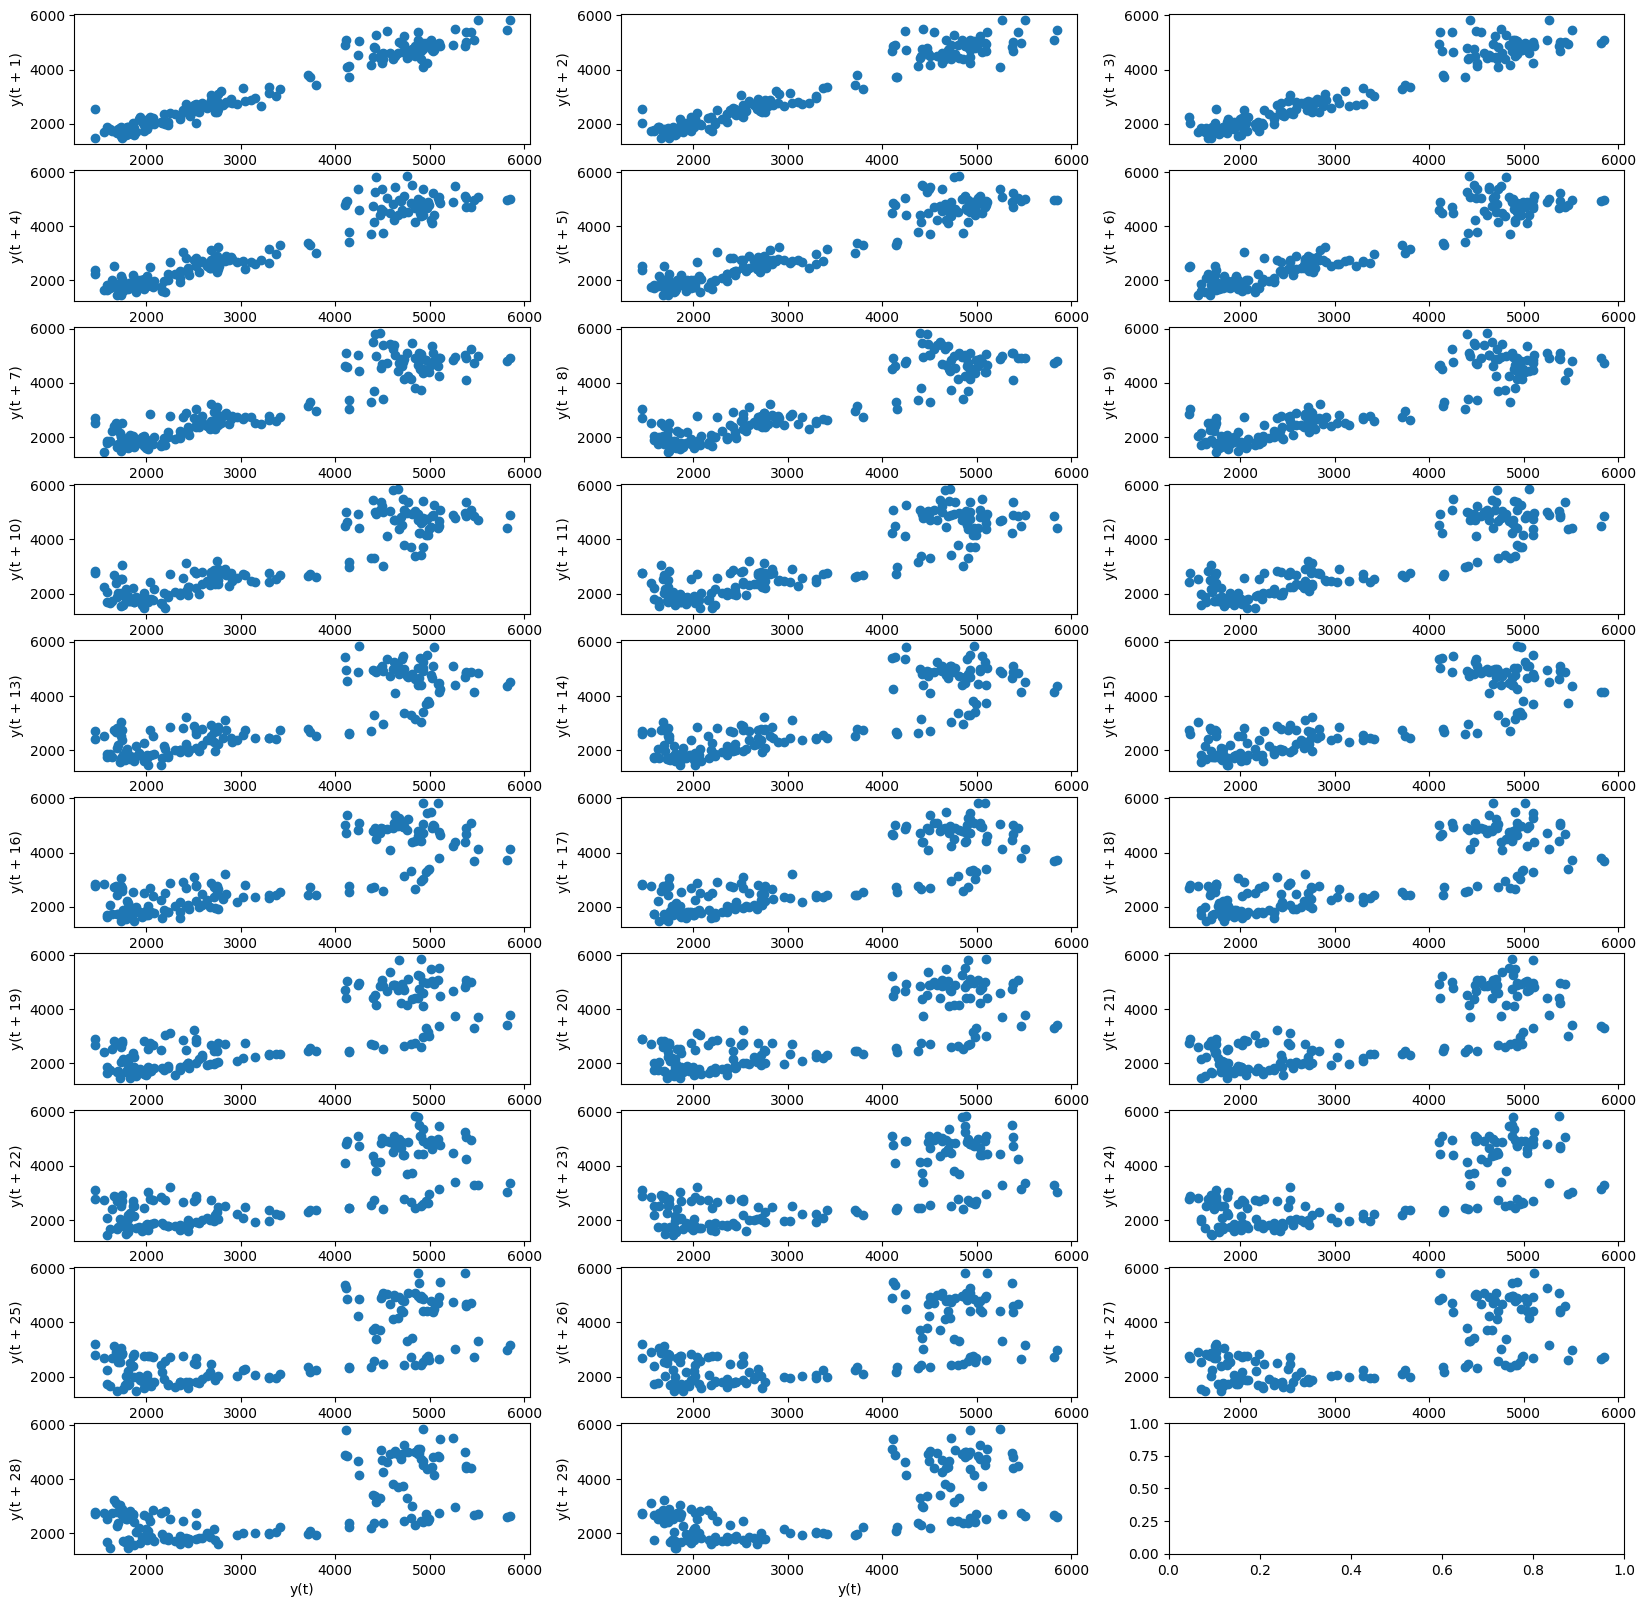

In [78]:
plot_pd_lag_plots(df, "break_in_thefts", max_lag=30, lag_step=1)

<Figure size 2000x2000 with 0 Axes>

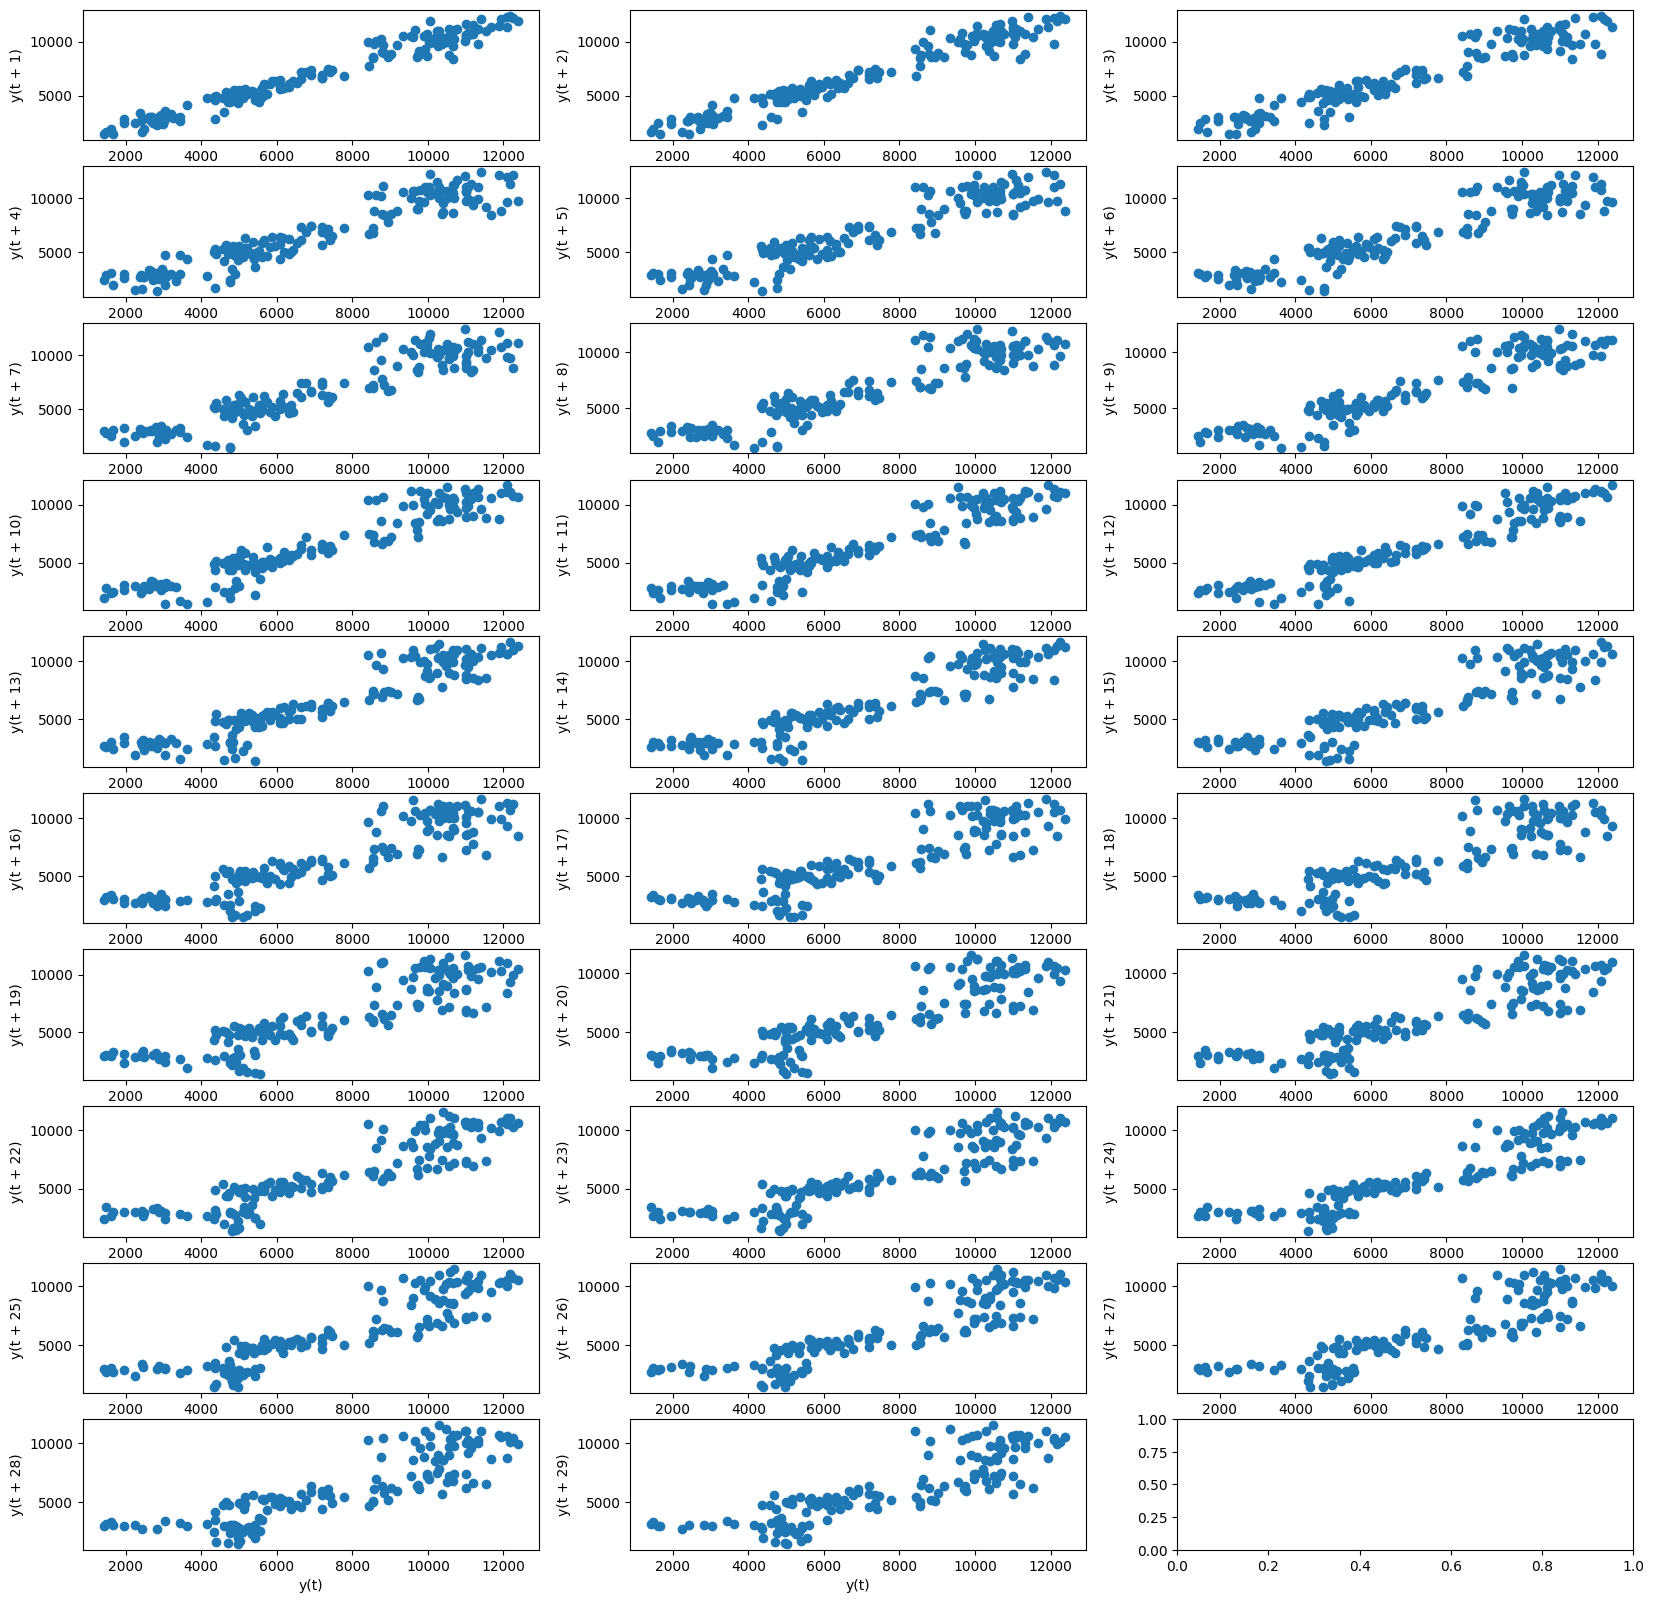

In [79]:
plot_pd_lag_plots(df, "general_thefts", max_lag=30, lag_step=1)

<Axes: xlabel='date'>

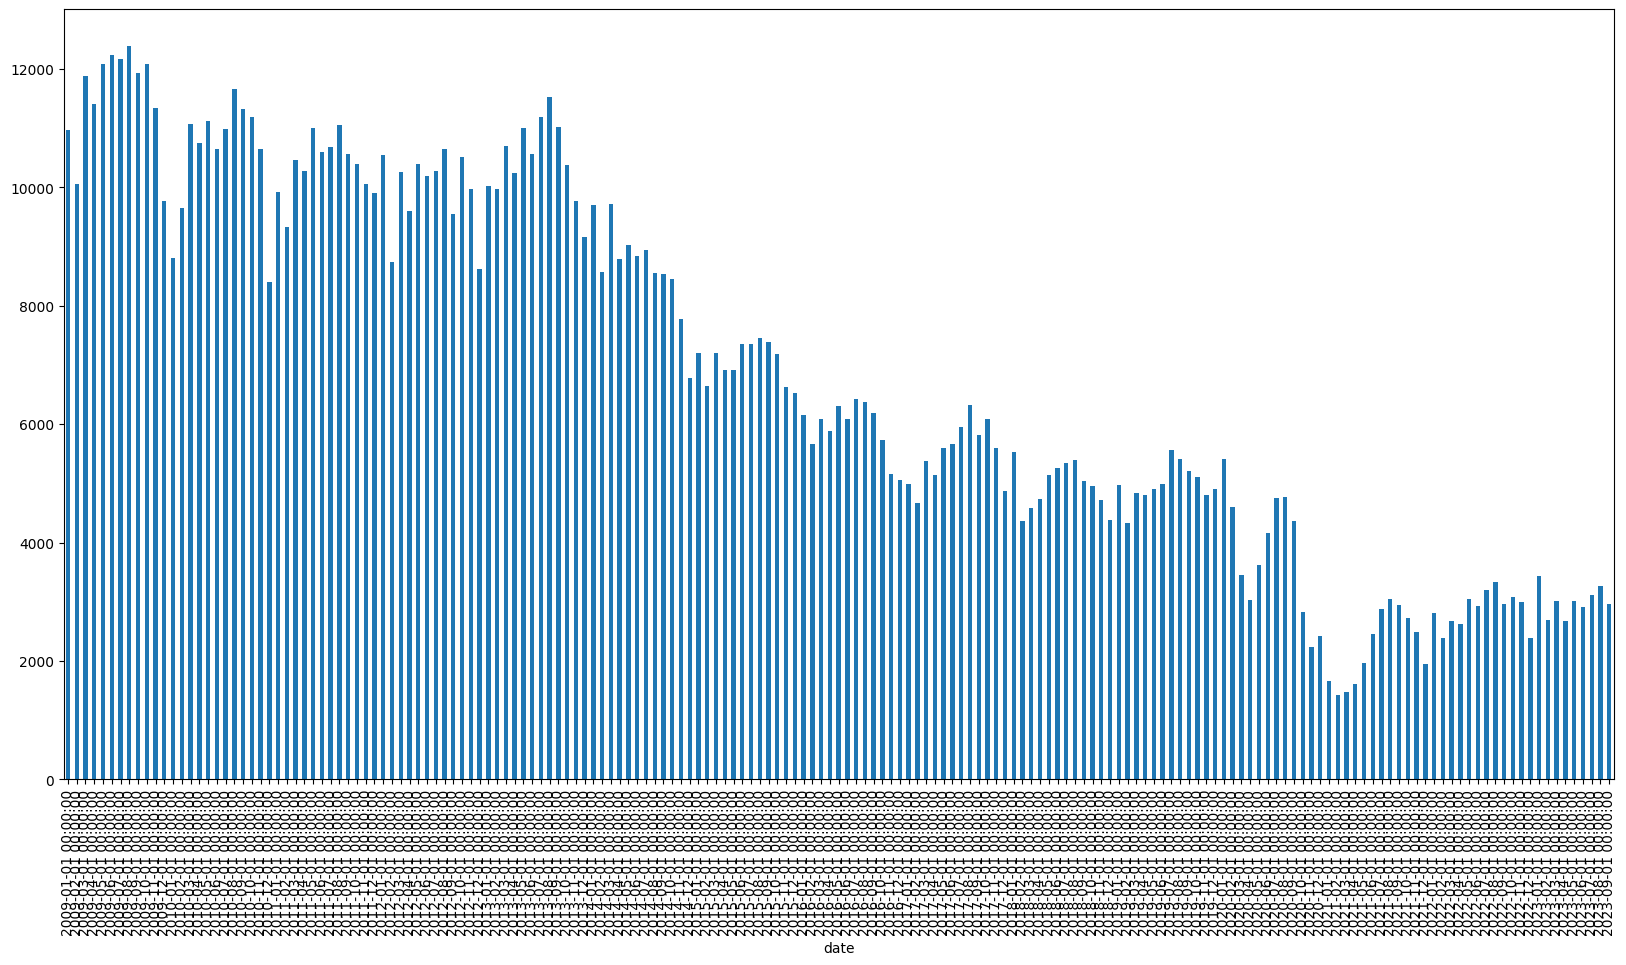

In [ ]:
df.general_thefts.plot(kind="bar", figsize=(20,10))

In [27]:
df.columns

Index(['month', 'year', 'avg_monthly_salary', 'monthly_min_wage',
       'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
       'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price',
       ...
       'z_do_65_w18_ratio', 'celkem_w18', 'm_do_65_w4_ratio', 'm_do_65_w17',
       'm_do_65_w18_ratio', 'm_do_65_w12', 'uchazeciOZamestnaniUoZMuzi',
       'm_do_65_w8_ratio', 'z_do_65_w19_ratio', 'z_do_65_w5'],
      dtype='object', length=116)

<Figure size 2000x2000 with 0 Axes>

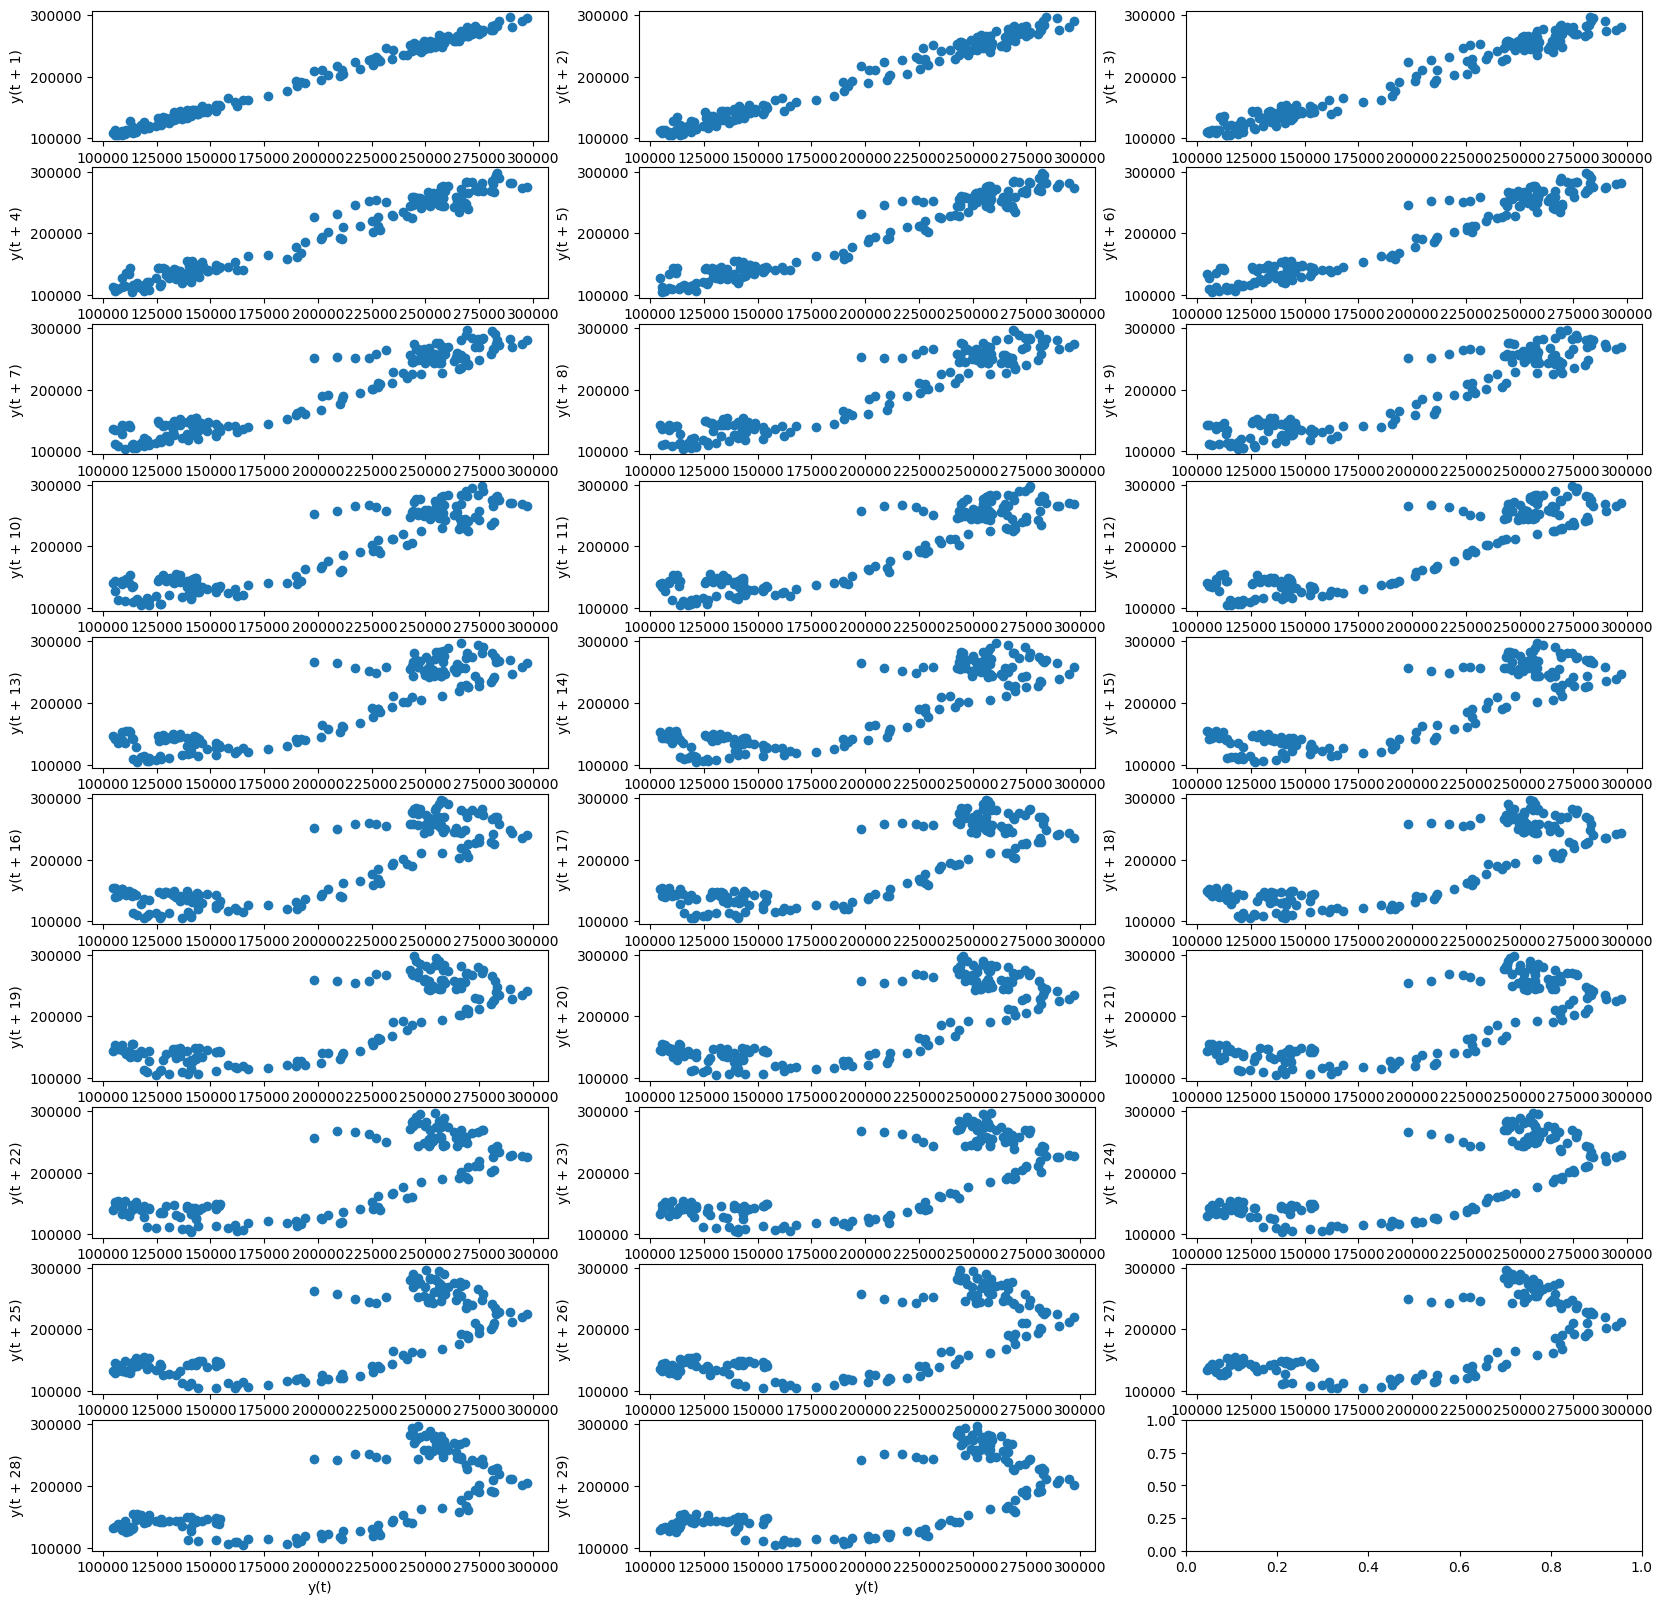

In [29]:
plot_pd_lag_plots(df, "uchazeciOZamestnaniUoZZeny", max_lag=30, lag_step=1)

<Figure size 2000x2000 with 0 Axes>

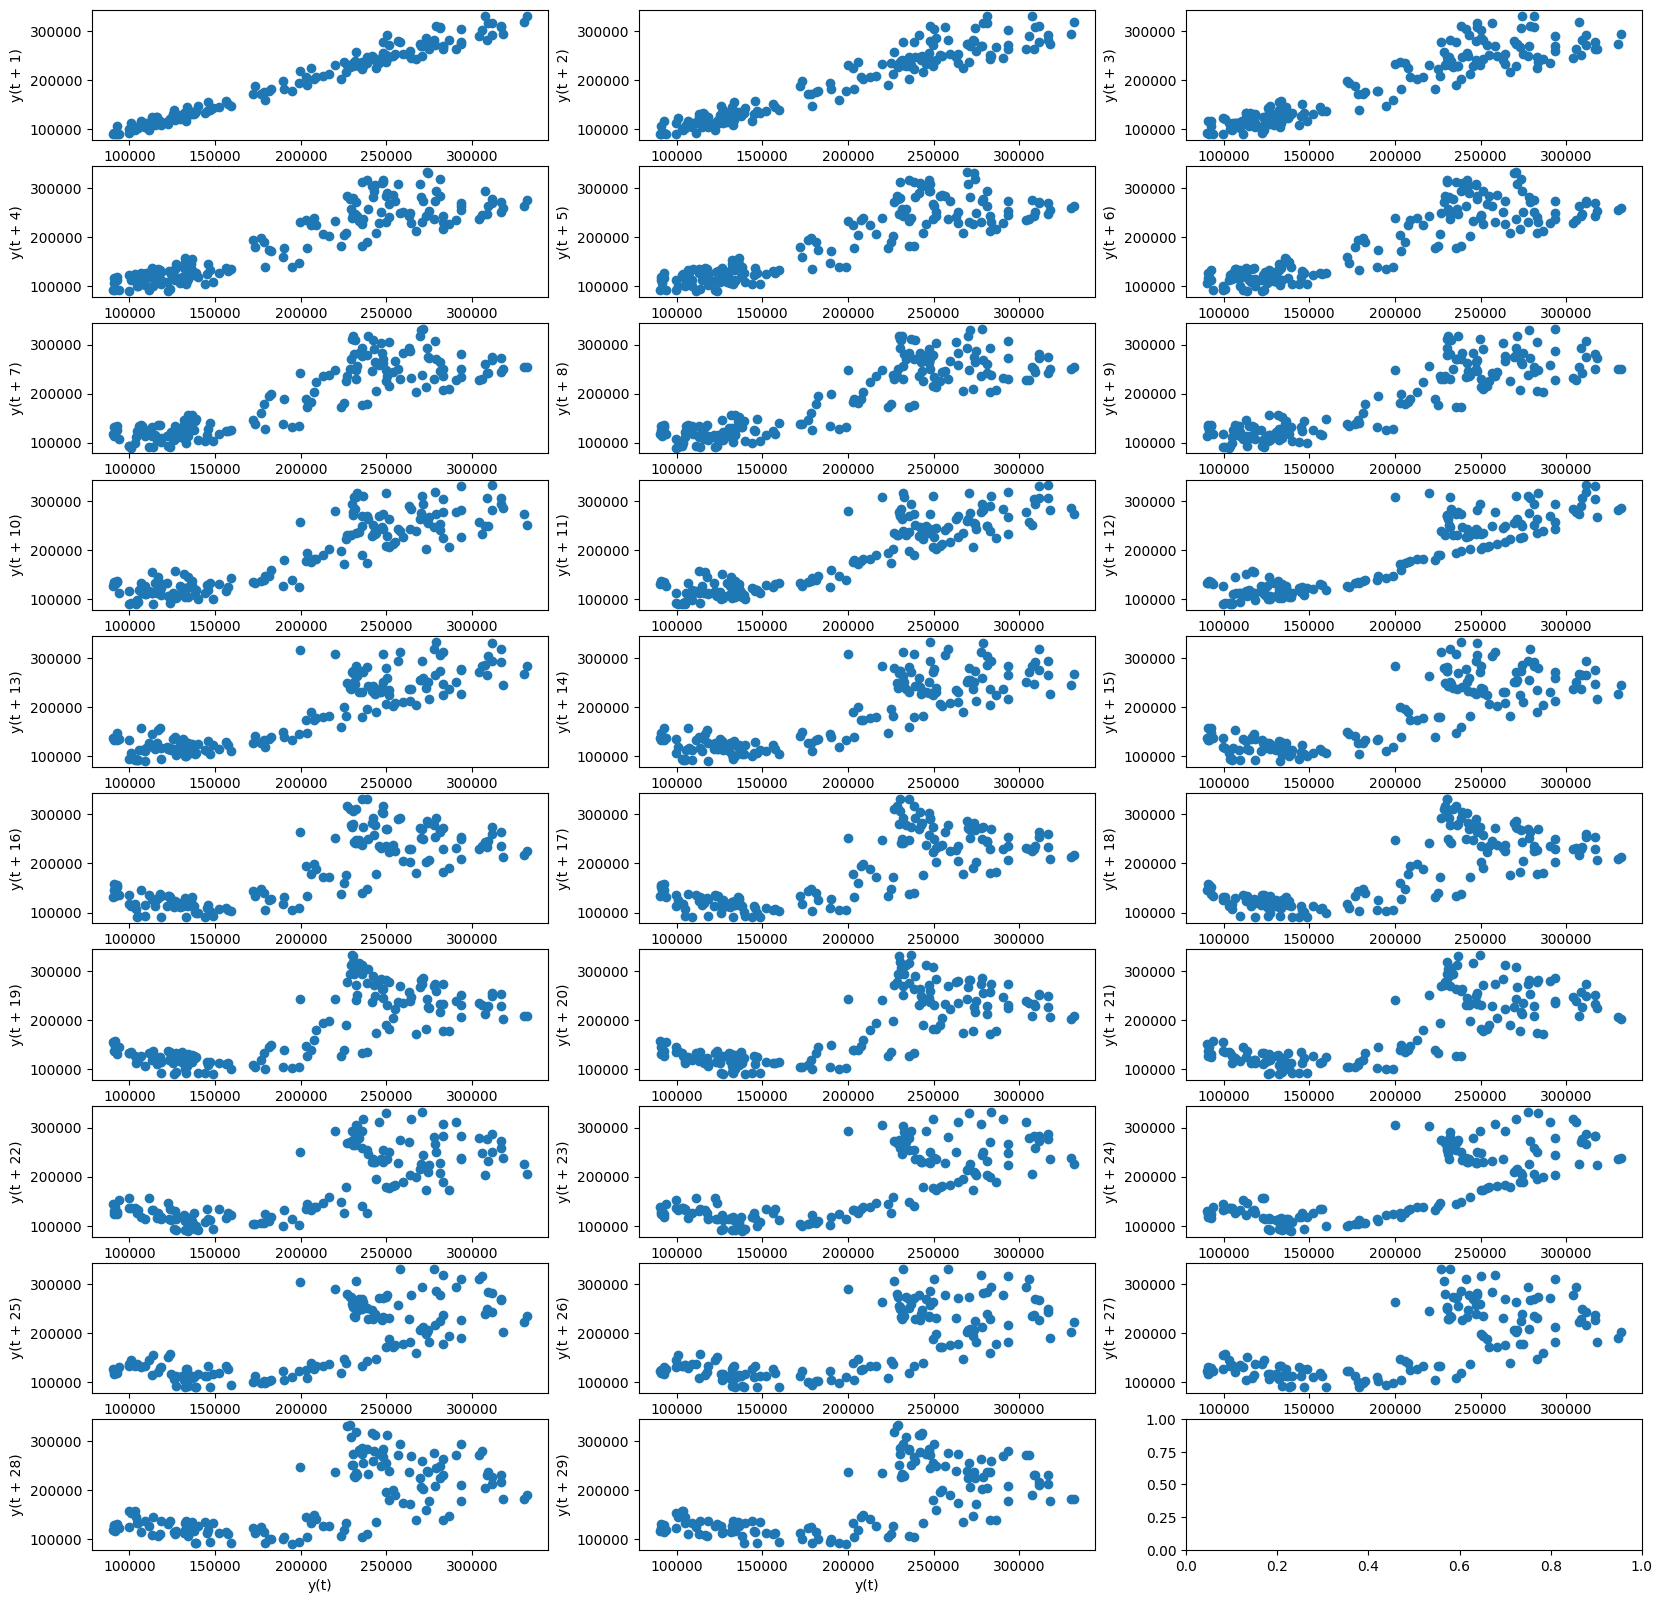

In [28]:
plot_pd_lag_plots(df, "uchazeciOZamestnaniUoZMuzi", max_lag=30, lag_step=1)